In [1]:
!pip install catboost

In [2]:
!pip install imblearn

In [3]:
!pip install xgboost

In [4]:
!pip install lightgbm

In [5]:
# import packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# set the aesthetic style of the plots
sns.set_style()

# filter warning messages
import warnings
warnings.filterwarnings('ignore')

In [6]:
# set default matplotlib parameters
COLOR = '#ababab'
mpl.rcParams['figure.titlesize'] = 16
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['grid.color'] = COLOR
mpl.rcParams['grid.alpha'] = 0.1

In [7]:
# import data set and create a data frame
df_credit = pd.read_csv('D:/acquisition_train.csv')

In [8]:
# show first 5 rows
df_credit.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [9]:
# data frame shape
print('Number of rows: ', df_credit.shape[0])
print('Number of columns: ', df_credit.shape[1])

Number of rows:  45000
Number of columns:  43


In [10]:
df_credit.columns

Index(['ids', 'target_default', 'score_1', 'score_2', 'score_3', 'score_4',
       'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed',
       'last_borrowed_in_months', 'credit_limit', 'reason', 'income',
       'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state',
       'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts',
       'n_issues', 'application_time_applied', 'application_time_in_funnel',
       'email', 'external_data_provider_credit_checks_last_2_year',
       'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_first_name',
       'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel',
       'profile_phone_number', 'reported_income', 'shipping_state',
       'shipping_zip_code', 'profile_tags', 'user_agent', 'target_fraud'],
      dtype='object')

In [11]:
# data frame summary
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               45000 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           44438 non-null  object 
 3   score_2                                           44438 non-null  object 
 4   score_3                                           44438 non-null  float64
 5   score_4                                           45000 non-null  float64
 6   score_5                                           45000 non-null  float64
 7   score_6                                           45000 non-null  float64
 8   risk_rate                                         44438 non-null  float64
 9   last_amount_borro

In [12]:
# percentage of missing values per feature
print((df_credit.isnull().sum() * 100 / df_credit.shape[0]).sort_values(ascending=False))

target_fraud                                        96.617778
last_amount_borrowed                                66.568889
last_borrowed_in_months                             66.568889
ok_since                                            58.988889
external_data_provider_credit_checks_last_2_year    50.284444
external_data_provider_credit_checks_last_year      33.608889
credit_limit                                        30.666667
n_issues                                            25.653333
facebook_profile                                     9.906667
marketing_channel                                    7.951111
job_name                                             7.413333
target_default                                       7.242222
external_data_provider_email_seen_before             4.962222
lat_lon                                              3.028889
user_agent                                           1.604444
n_bankruptcies                                       1.548889
n_defaul

In [13]:
df_credit.dropna(subset=['target_default'], inplace=True)

In [14]:
# drop the column "target_fraud"
df_credit.drop('target_fraud', axis=1, inplace=True)

In [15]:
# number of unique observations per column
df_credit.nunique().sort_values()

channel                                                 1
external_data_provider_credit_checks_last_2_year        1
last_borrowed_in_months                                 2
target_default                                          2
facebook_profile                                        2
external_data_provider_credit_checks_last_year          2
external_data_provider_credit_checks_last_month         4
real_state                                              5
n_defaulted_loans                                       5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               44
n_accounts                                             44
state         

In [16]:
# drop the columns "channel" and "external_data_provider_credit_checks_last_2_year"
df_credit.drop(labels=['channel', 'external_data_provider_credit_checks_last_2_year'], axis=1, inplace=True)

In [17]:
df_credit.drop(labels=['email', 'reason', 'zip', 'job_name', 'external_data_provider_first_name', 'lat_lon',
                       'shipping_zip_code', 'user_agent', 'profile_tags', 'marketing_channel',
                       'profile_phone_number', 'application_time_applied', 'ids'], axis=1, inplace=True)

In [18]:
# show descriptive statistics
df_credit.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
count,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,14133.000000,14133.000000,28632.000000,4.174100e+04,17276.000000,41606.000000,41729.000000,41741.000000,30818.000000,41741.000000,41741.000000,27720.000000,39656.000000,41741.000000,41741.0
mean,346.459836,100.006820,0.499416,99.919399,0.294451,13328.104095,40.588410,33877.220453,7.108012e+04,35.192174,0.076696,0.004625,10.639108,11.023882,247.748545,1.504396,0.504185,12.731188,500.491771,inf
std,110.102271,3.183821,0.288085,10.022703,0.101561,7918.698433,9.437936,36141.985884,5.225978e+04,21.629577,0.274820,0.080157,4.588175,4.596036,146.326172,1.114207,0.499992,125.711218,287.993121,NaN
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,0.000000,403.0
25%,270.000000,97.862546,0.251595,93.182517,0.220000,7210.280000,36.000000,9975.000000,4.401958e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,1.000000,0.000000,11.000000,252.000000,50910.0
50%,340.000000,100.017950,0.500174,99.977774,0.290000,12011.050000,36.000000,25213.000000,6.004409e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,2.000000,1.000000,27.000000,502.000000,101623.0
75%,420.000000,102.143100,0.747630,106.630991,0.360000,18030.160000,36.000000,46492.500000,8.503289e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,2.000000,1.000000,43.000000,747.000000,151248.0
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,3.000000,1.000000,59.000000,1000.000000,inf


In [19]:
df_credit

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,...,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_state
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,...,0.0,18.0,18.0,444,2,0.0,51.0,645,57849.0,BR-MT
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,...,0.0,14.0,14.0,346,1,0.0,17.0,243,4902.0,BR-RS
2,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,...,0.0,10.0,NaN,6,2,NaN,9.0,65,163679.0,BR-RR
3,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,...,0.0,19.0,19.0,406,3,NaN,38.0,815,1086.0,BR-RN
4,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,...,0.0,11.0,NaN,240,2,1.0,46.0,320,198618.0,BR-MT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,280.0,96.379531,0.416693,103.667082,0.17,14766.42,36.0,...,0.0,7.0,7.0,72,2,1.0,7.0,730,73417.0,BR-GO
44996,False,smzX0nxh5QlePvtVf6EAeg==,vJyc9xom9v7hwFMPTIpmKw==,370.0,96.124977,0.692196,97.977973,0.27,NaN,NaN,...,0.0,16.0,16.0,51,1,NaN,1.0,28,26246.0,BR-RO
44997,False,e4NYDor1NOw6XKGE60AWFw==,ky19q4V1ZqgL3jnHX0wKDw==,280.0,102.377780,0.530938,93.687747,0.30,NaN,NaN,...,0.0,6.0,6.0,476,2,1.0,27.0,940,101252.0,BR-SP
44998,True,smzX0nxh5QlePvtVf6EAeg==,6J1ZMTzN5GKHXnhM4J1JbA==,240.0,100.476090,0.214697,86.759074,0.37,NaN,NaN,...,0.0,10.0,10.0,35,0,1.0,2.0,459,129844.0,BR-SP


In [20]:
# count of "inf" values in "reported_income"
np.isinf(df_credit['reported_income']).sum()

66

In [21]:
# count of values = -999 in "external_data_provider_email_seen_before"
df_credit.loc[df_credit['external_data_provider_email_seen_before'] == -999, 'external_data_provider_email_seen_before'].value_counts()

-999.0    591
Name: external_data_provider_email_seen_before, dtype: int64

In [22]:
# replace "inf" values with "nan"
df_credit['reported_income'] = df_credit['reported_income'].replace(np.inf, np.nan)

# replace "-999" values with "nan"
df_credit.loc[df_credit['external_data_provider_email_seen_before'] == -999, 'external_data_provider_email_seen_before'] = np.nan

In [23]:
# data frame containing numerical features
df_credit_numerical = df_credit[['score_3', 'risk_rate', 'last_amount_borrowed', 
                                 'last_borrowed_in_months', 'credit_limit', 'income', 'ok_since', 
                                 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 
                                 'external_data_provider_email_seen_before']]

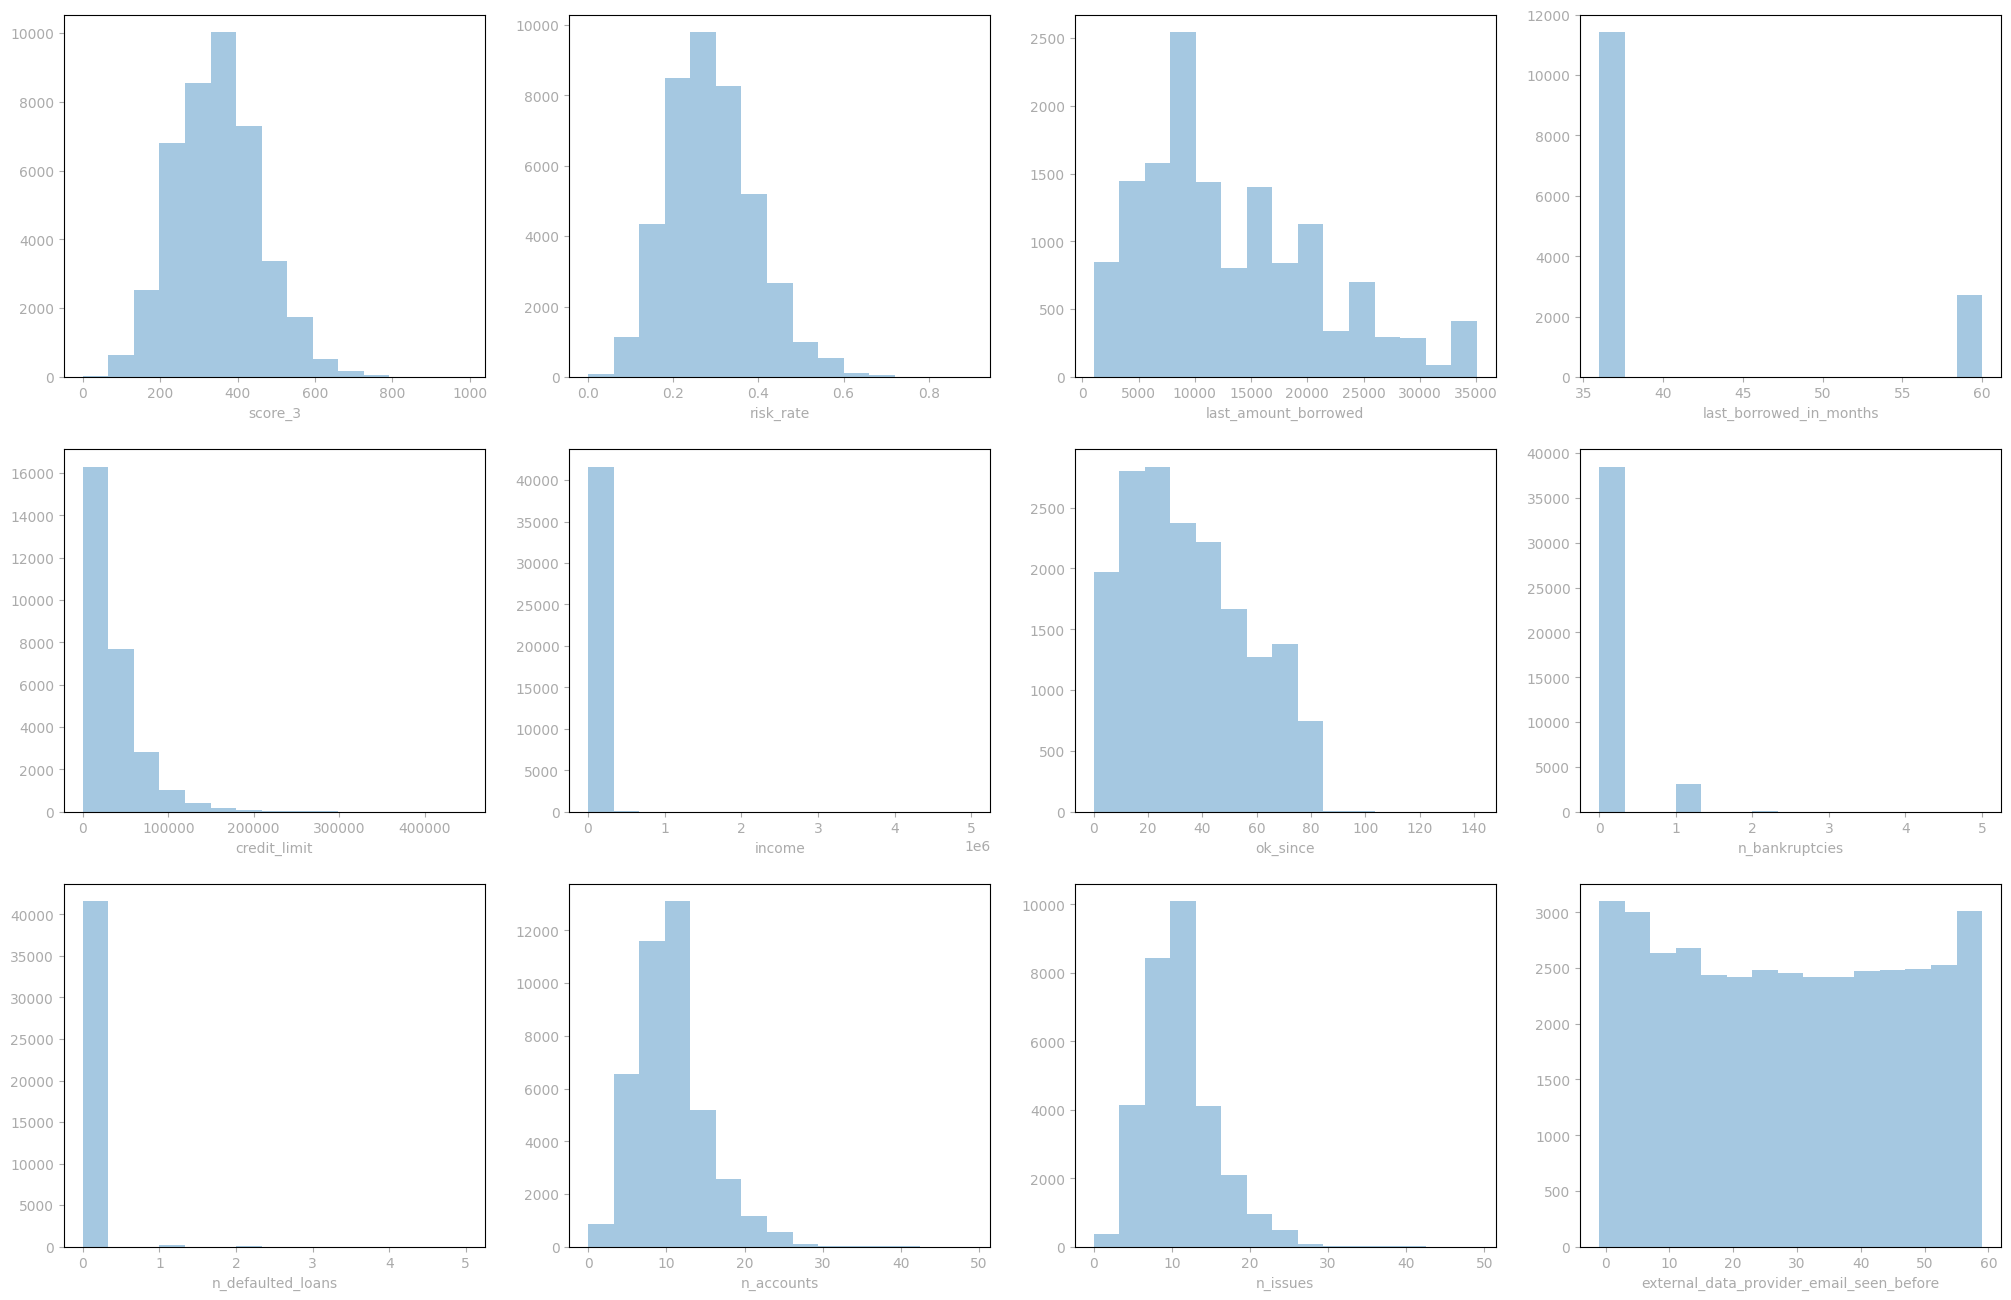

In [24]:
# plot a histogram for each of the features above 

nrows = 3
ncols = 4

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 16))

r = 0
c = 0

for i in df_credit_numerical:
  sns.distplot(df_credit_numerical[i], bins=15,kde=False, ax=ax[r][c])
  if c == ncols - 1:
    r += 1
    c = 0
  else:
    c += 1

plt.show()

In [25]:
df_credit_num = df_credit.select_dtypes(exclude='object').columns
df_credit_cat = df_credit.select_dtypes(include='object').columns

# fill missing values for "last_amount_borrowed", "last_borrowed_in_months" and "n_issues"
df_credit['last_amount_borrowed'].fillna(value=0, inplace=True)
df_credit['last_borrowed_in_months'].fillna(value=0, inplace=True)
df_credit['n_issues'].fillna(value=0, inplace=True)

# fill missing values for numerical variables
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_credit.loc[:, df_credit_num])
df_credit.loc[:, df_credit_num] = imputer.transform(df_credit.loc[:, df_credit_num])

# fill missing values for categorical variables
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_credit.loc[:, df_credit_cat])
df_credit.loc[:, df_credit_cat] = imputer.transform(df_credit.loc[:, df_credit_cat])

In [26]:
df_credit.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
facebook_profile                                   0
state                                              0
real_state                                         0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                    

In [27]:
bin_var = df_credit.nunique()[df_credit.nunique() == 2].keys().tolist()
num_var = [col for col in df_credit.select_dtypes(['int', 'float']).columns.tolist() if col not in bin_var]
cat_var = [col for col in df_credit.select_dtypes(['object']).columns.tolist() if col not in bin_var]

df_credit_encoded = df_credit.copy()

# label encoding for the binary variables
le = LabelEncoder()
for col in bin_var:
  df_credit_encoded[col] = le.fit_transform(df_credit_encoded[col])

# encoding with get_dummies for the categorical variables
df_credit_encoded = pd.get_dummies(df_credit_encoded, columns=cat_var)

df_credit_encoded.head()

,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,...,shipping_state_BR-PE,shipping_state_BR-PR,shipping_state_BR-RN,shipping_state_BR-RO,shipping_state_BR-RR,shipping_state_BR-RS,shipping_state_BR-SC,shipping_state_BR-SE,shipping_state_BR-SP,shipping_state_BR-TO
0,0,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,65014.12,...,0,0,0,0,0,0,0,0,0,0
1,0,370.0,97.062615,0.942655,92.002546,0.24,0.00,0.0,39726.0,100018.91,...,0,0,0,0,0,1,0,0,0,0
2,1,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,25213.0,65023.65,...,0,0,0,0,1,0,0,0,0,0
3,0,510.0,101.599485,0.987673,94.902491,0.32,0.00,0.0,54591.0,68830.01,...,0,0,1,0,0,0,0,0,0,0
4,0,500.0,98.474289,0.532539,118.126207,0.18,0.00,0.0,25213.0,60011.29,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df_credit_encoded.shape

(41741, 144)

In [29]:
# feature matrix
X = df_credit_encoded.drop('target_default', axis=1)

# target vector
y = df_credit_encoded['target_default']

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=15000 ,shuffle=True, stratify=y)

In [30]:
X_train.shape

(15000, 143)

In [31]:
# standardize numerical variables
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# resample
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [32]:
X_train_rus.shape

(4788, 143)

In [33]:
# define the function val_model
def val_model(X, y, clf, show=True):
    """
    Apply cross-validation on the training set.

    # Arguments
        X: DataFrame containing the independent variables.
        y: Series containing the target vector.
        clf: Scikit-learn estimator instance.
        
    # Returns
        float, mean value of the cross-validation scores.
    """
    
    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    if show == True:
        print(f'Recall: {scores.mean()}, {scores.std()}')
    
    return scores.mean()

In [34]:
#evaluate the models
xgb = XGBClassifier()
lgb = LGBMClassifier()
cb = CatBoostClassifier()
ada = AdaBoostClassifier()

model = []
recall = []

for clf in (xgb, lgb, cb, ada):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_train_rus, y_train_rus, clf, show=False))

pd.DataFrame(data=recall, index=model, columns=['recall'])

Learning rate set to 0.018279
0:	learn: 0.6910762	total: 148ms	remaining: 2m 28s
1:	learn: 0.6892526	total: 153ms	remaining: 1m 16s
2:	learn: 0.6875666	total: 157ms	remaining: 52.3s
3:	learn: 0.6854915	total: 162ms	remaining: 40.3s
4:	learn: 0.6840986	total: 166ms	remaining: 33.1s
5:	learn: 0.6823527	total: 171ms	remaining: 28.3s
6:	learn: 0.6805234	total: 176ms	remaining: 25s
7:	learn: 0.6790523	total: 181ms	remaining: 22.5s
8:	learn: 0.6776781	total: 186ms	remaining: 20.5s
9:	learn: 0.6760086	total: 193ms	remaining: 19.1s
10:	learn: 0.6742658	total: 198ms	remaining: 17.8s
11:	learn: 0.6728684	total: 204ms	remaining: 16.8s
12:	learn: 0.6714810	total: 211ms	remaining: 16s
13:	learn: 0.6702616	total: 217ms	remaining: 15.3s
14:	learn: 0.6688674	total: 223ms	remaining: 14.7s
15:	learn: 0.6675254	total: 229ms	remaining: 14.1s
16:	learn: 0.6662194	total: 237ms	remaining: 13.7s
17:	learn: 0.6649655	total: 244ms	remaining: 13.3s
18:	learn: 0.6636866	total: 254ms	remaining: 13.1s
19:	learn: 0.

167:	learn: 0.5932040	total: 1.22s	remaining: 6.07s
168:	learn: 0.5930590	total: 1.23s	remaining: 6.05s
169:	learn: 0.5926940	total: 1.24s	remaining: 6.05s
170:	learn: 0.5924324	total: 1.25s	remaining: 6.04s
171:	learn: 0.5921496	total: 1.25s	remaining: 6.03s
172:	learn: 0.5919430	total: 1.26s	remaining: 6.02s
173:	learn: 0.5915993	total: 1.27s	remaining: 6.01s
174:	learn: 0.5913556	total: 1.27s	remaining: 6s
175:	learn: 0.5910641	total: 1.28s	remaining: 5.99s
176:	learn: 0.5907573	total: 1.28s	remaining: 5.98s
177:	learn: 0.5905210	total: 1.29s	remaining: 5.97s
178:	learn: 0.5903428	total: 1.3s	remaining: 5.96s
179:	learn: 0.5898293	total: 1.31s	remaining: 5.95s
180:	learn: 0.5894945	total: 1.31s	remaining: 5.94s
181:	learn: 0.5893743	total: 1.32s	remaining: 5.93s
182:	learn: 0.5890433	total: 1.33s	remaining: 5.92s
183:	learn: 0.5888061	total: 1.33s	remaining: 5.91s
184:	learn: 0.5884963	total: 1.34s	remaining: 5.9s
185:	learn: 0.5882825	total: 1.34s	remaining: 5.89s
186:	learn: 0.588

358:	learn: 0.5476984	total: 2.45s	remaining: 4.37s
359:	learn: 0.5475488	total: 2.46s	remaining: 4.37s
360:	learn: 0.5473136	total: 2.46s	remaining: 4.36s
361:	learn: 0.5471366	total: 2.47s	remaining: 4.35s
362:	learn: 0.5468589	total: 2.48s	remaining: 4.34s
363:	learn: 0.5465546	total: 2.48s	remaining: 4.34s
364:	learn: 0.5464203	total: 2.49s	remaining: 4.33s
365:	learn: 0.5462004	total: 2.49s	remaining: 4.32s
366:	learn: 0.5459801	total: 2.5s	remaining: 4.31s
367:	learn: 0.5457762	total: 2.51s	remaining: 4.31s
368:	learn: 0.5455878	total: 2.51s	remaining: 4.3s
369:	learn: 0.5454882	total: 2.52s	remaining: 4.29s
370:	learn: 0.5452722	total: 2.52s	remaining: 4.28s
371:	learn: 0.5450806	total: 2.53s	remaining: 4.27s
372:	learn: 0.5449857	total: 2.54s	remaining: 4.27s
373:	learn: 0.5447892	total: 2.54s	remaining: 4.26s
374:	learn: 0.5445487	total: 2.55s	remaining: 4.25s
375:	learn: 0.5443550	total: 2.56s	remaining: 4.24s
376:	learn: 0.5442255	total: 2.56s	remaining: 4.24s
377:	learn: 0.

522:	learn: 0.5105031	total: 3.49s	remaining: 3.18s
523:	learn: 0.5102493	total: 3.49s	remaining: 3.17s
524:	learn: 0.5099834	total: 3.5s	remaining: 3.17s
525:	learn: 0.5097731	total: 3.51s	remaining: 3.16s
526:	learn: 0.5095096	total: 3.51s	remaining: 3.15s
527:	learn: 0.5093299	total: 3.52s	remaining: 3.15s
528:	learn: 0.5091193	total: 3.53s	remaining: 3.14s
529:	learn: 0.5089457	total: 3.53s	remaining: 3.13s
530:	learn: 0.5087160	total: 3.54s	remaining: 3.13s
531:	learn: 0.5084265	total: 3.54s	remaining: 3.12s
532:	learn: 0.5082554	total: 3.55s	remaining: 3.11s
533:	learn: 0.5080110	total: 3.56s	remaining: 3.1s
534:	learn: 0.5078047	total: 3.56s	remaining: 3.1s
535:	learn: 0.5074486	total: 3.57s	remaining: 3.09s
536:	learn: 0.5071604	total: 3.58s	remaining: 3.08s
537:	learn: 0.5069196	total: 3.58s	remaining: 3.08s
538:	learn: 0.5065868	total: 3.59s	remaining: 3.07s
539:	learn: 0.5063007	total: 3.59s	remaining: 3.06s
540:	learn: 0.5060330	total: 3.6s	remaining: 3.05s
541:	learn: 0.50

697:	learn: 0.4659287	total: 4.69s	remaining: 2.03s
698:	learn: 0.4656356	total: 4.7s	remaining: 2.02s
699:	learn: 0.4654183	total: 4.71s	remaining: 2.02s
700:	learn: 0.4651902	total: 4.71s	remaining: 2.01s
701:	learn: 0.4649340	total: 4.72s	remaining: 2s
702:	learn: 0.4646180	total: 4.73s	remaining: 2s
703:	learn: 0.4643072	total: 4.74s	remaining: 1.99s
704:	learn: 0.4640564	total: 4.74s	remaining: 1.99s
705:	learn: 0.4638284	total: 4.75s	remaining: 1.98s
706:	learn: 0.4635857	total: 4.76s	remaining: 1.97s
707:	learn: 0.4633714	total: 4.76s	remaining: 1.97s
708:	learn: 0.4631697	total: 4.77s	remaining: 1.96s
709:	learn: 0.4628735	total: 4.78s	remaining: 1.95s
710:	learn: 0.4626658	total: 4.79s	remaining: 1.95s
711:	learn: 0.4625123	total: 4.79s	remaining: 1.94s
712:	learn: 0.4623016	total: 4.8s	remaining: 1.93s
713:	learn: 0.4620809	total: 4.81s	remaining: 1.93s
714:	learn: 0.4618122	total: 4.81s	remaining: 1.92s
715:	learn: 0.4614936	total: 4.82s	remaining: 1.91s
716:	learn: 0.461291

884:	learn: 0.4235530	total: 5.92s	remaining: 770ms
885:	learn: 0.4232728	total: 5.93s	remaining: 763ms
886:	learn: 0.4230771	total: 5.94s	remaining: 757ms
887:	learn: 0.4229007	total: 5.95s	remaining: 750ms
888:	learn: 0.4227415	total: 5.95s	remaining: 743ms
889:	learn: 0.4225793	total: 5.96s	remaining: 736ms
890:	learn: 0.4224259	total: 5.96s	remaining: 730ms
891:	learn: 0.4221498	total: 5.97s	remaining: 723ms
892:	learn: 0.4220048	total: 5.98s	remaining: 716ms
893:	learn: 0.4217379	total: 5.98s	remaining: 710ms
894:	learn: 0.4214786	total: 5.99s	remaining: 703ms
895:	learn: 0.4212924	total: 6s	remaining: 696ms
896:	learn: 0.4210870	total: 6s	remaining: 689ms
897:	learn: 0.4208932	total: 6.01s	remaining: 683ms
898:	learn: 0.4207118	total: 6.02s	remaining: 676ms
899:	learn: 0.4206147	total: 6.02s	remaining: 669ms
900:	learn: 0.4204142	total: 6.03s	remaining: 662ms
901:	learn: 0.4201904	total: 6.04s	remaining: 656ms
902:	learn: 0.4199828	total: 6.04s	remaining: 649ms
903:	learn: 0.4197

66:	learn: 0.6320293	total: 408ms	remaining: 5.68s
67:	learn: 0.6316025	total: 415ms	remaining: 5.69s
68:	learn: 0.6310162	total: 422ms	remaining: 5.69s
69:	learn: 0.6305963	total: 429ms	remaining: 5.7s
70:	learn: 0.6300189	total: 436ms	remaining: 5.71s
71:	learn: 0.6295375	total: 442ms	remaining: 5.7s
72:	learn: 0.6289830	total: 448ms	remaining: 5.69s
73:	learn: 0.6285504	total: 454ms	remaining: 5.68s
74:	learn: 0.6281334	total: 460ms	remaining: 5.68s
75:	learn: 0.6275759	total: 467ms	remaining: 5.68s
76:	learn: 0.6272325	total: 473ms	remaining: 5.67s
77:	learn: 0.6269353	total: 480ms	remaining: 5.67s
78:	learn: 0.6263888	total: 486ms	remaining: 5.67s
79:	learn: 0.6260375	total: 493ms	remaining: 5.66s
80:	learn: 0.6256412	total: 499ms	remaining: 5.66s
81:	learn: 0.6253203	total: 506ms	remaining: 5.66s
82:	learn: 0.6250029	total: 513ms	remaining: 5.67s
83:	learn: 0.6245578	total: 520ms	remaining: 5.67s
84:	learn: 0.6241436	total: 527ms	remaining: 5.67s
85:	learn: 0.6237488	total: 533ms

253:	learn: 0.5761608	total: 1.62s	remaining: 4.76s
254:	learn: 0.5759633	total: 1.63s	remaining: 4.76s
255:	learn: 0.5755808	total: 1.64s	remaining: 4.75s
256:	learn: 0.5751811	total: 1.65s	remaining: 4.76s
257:	learn: 0.5748952	total: 1.65s	remaining: 4.75s
258:	learn: 0.5745802	total: 1.66s	remaining: 4.75s
259:	learn: 0.5741923	total: 1.66s	remaining: 4.74s
260:	learn: 0.5737434	total: 1.67s	remaining: 4.73s
261:	learn: 0.5734898	total: 1.68s	remaining: 4.73s
262:	learn: 0.5733694	total: 1.68s	remaining: 4.72s
263:	learn: 0.5729646	total: 1.69s	remaining: 4.71s
264:	learn: 0.5728059	total: 1.7s	remaining: 4.71s
265:	learn: 0.5725678	total: 1.7s	remaining: 4.7s
266:	learn: 0.5722149	total: 1.71s	remaining: 4.7s
267:	learn: 0.5719791	total: 1.72s	remaining: 4.69s
268:	learn: 0.5717244	total: 1.72s	remaining: 4.68s
269:	learn: 0.5714277	total: 1.73s	remaining: 4.68s
270:	learn: 0.5712244	total: 1.74s	remaining: 4.67s
271:	learn: 0.5709072	total: 1.74s	remaining: 4.67s
272:	learn: 0.57

440:	learn: 0.5342470	total: 2.86s	remaining: 3.63s
441:	learn: 0.5341192	total: 2.87s	remaining: 3.63s
442:	learn: 0.5338916	total: 2.88s	remaining: 3.62s
443:	learn: 0.5335234	total: 2.89s	remaining: 3.61s
444:	learn: 0.5333634	total: 2.89s	remaining: 3.61s
445:	learn: 0.5331551	total: 2.92s	remaining: 3.62s
446:	learn: 0.5329413	total: 2.92s	remaining: 3.62s
447:	learn: 0.5327120	total: 2.93s	remaining: 3.61s
448:	learn: 0.5324621	total: 2.94s	remaining: 3.61s
449:	learn: 0.5322365	total: 2.95s	remaining: 3.6s
450:	learn: 0.5319127	total: 2.95s	remaining: 3.6s
451:	learn: 0.5316625	total: 2.96s	remaining: 3.59s
452:	learn: 0.5314051	total: 2.97s	remaining: 3.58s
453:	learn: 0.5312243	total: 2.97s	remaining: 3.58s
454:	learn: 0.5310685	total: 2.98s	remaining: 3.57s
455:	learn: 0.5308673	total: 2.99s	remaining: 3.56s
456:	learn: 0.5306734	total: 2.99s	remaining: 3.56s
457:	learn: 0.5304437	total: 3s	remaining: 3.55s
458:	learn: 0.5302267	total: 3.01s	remaining: 3.54s
459:	learn: 0.530

625:	learn: 0.4909248	total: 4.08s	remaining: 2.44s
626:	learn: 0.4906069	total: 4.09s	remaining: 2.43s
627:	learn: 0.4903504	total: 4.1s	remaining: 2.43s
628:	learn: 0.4901585	total: 4.11s	remaining: 2.42s
629:	learn: 0.4899190	total: 4.11s	remaining: 2.42s
630:	learn: 0.4896952	total: 4.12s	remaining: 2.41s
631:	learn: 0.4895208	total: 4.13s	remaining: 2.4s
632:	learn: 0.4892728	total: 4.13s	remaining: 2.4s
633:	learn: 0.4890598	total: 4.14s	remaining: 2.39s
634:	learn: 0.4887549	total: 4.14s	remaining: 2.38s
635:	learn: 0.4885812	total: 4.15s	remaining: 2.38s
636:	learn: 0.4882916	total: 4.16s	remaining: 2.37s
637:	learn: 0.4880139	total: 4.16s	remaining: 2.36s
638:	learn: 0.4877221	total: 4.17s	remaining: 2.35s
639:	learn: 0.4875971	total: 4.18s	remaining: 2.35s
640:	learn: 0.4872581	total: 4.18s	remaining: 2.34s
641:	learn: 0.4870196	total: 4.19s	remaining: 2.33s
642:	learn: 0.4867821	total: 4.2s	remaining: 2.33s
643:	learn: 0.4864567	total: 4.2s	remaining: 2.32s
644:	learn: 0.486

786:	learn: 0.4549433	total: 5.12s	remaining: 1.39s
787:	learn: 0.4547891	total: 5.12s	remaining: 1.38s
788:	learn: 0.4545530	total: 5.13s	remaining: 1.37s
789:	learn: 0.4543919	total: 5.14s	remaining: 1.36s
790:	learn: 0.4542347	total: 5.14s	remaining: 1.36s
791:	learn: 0.4539259	total: 5.15s	remaining: 1.35s
792:	learn: 0.4537241	total: 5.16s	remaining: 1.35s
793:	learn: 0.4535449	total: 5.16s	remaining: 1.34s
794:	learn: 0.4534276	total: 5.17s	remaining: 1.33s
795:	learn: 0.4531793	total: 5.18s	remaining: 1.33s
796:	learn: 0.4529218	total: 5.18s	remaining: 1.32s
797:	learn: 0.4527475	total: 5.19s	remaining: 1.31s
798:	learn: 0.4525111	total: 5.2s	remaining: 1.31s
799:	learn: 0.4522829	total: 5.2s	remaining: 1.3s
800:	learn: 0.4520159	total: 5.21s	remaining: 1.29s
801:	learn: 0.4518141	total: 5.21s	remaining: 1.29s
802:	learn: 0.4515187	total: 5.22s	remaining: 1.28s
803:	learn: 0.4512535	total: 5.23s	remaining: 1.27s
804:	learn: 0.4510286	total: 5.23s	remaining: 1.27s
805:	learn: 0.4

974:	learn: 0.4161192	total: 6.35s	remaining: 163ms
975:	learn: 0.4159590	total: 6.36s	remaining: 156ms
976:	learn: 0.4157755	total: 6.36s	remaining: 150ms
977:	learn: 0.4155178	total: 6.37s	remaining: 143ms
978:	learn: 0.4152413	total: 6.38s	remaining: 137ms
979:	learn: 0.4150087	total: 6.38s	remaining: 130ms
980:	learn: 0.4147887	total: 6.39s	remaining: 124ms
981:	learn: 0.4145191	total: 6.4s	remaining: 117ms
982:	learn: 0.4143598	total: 6.41s	remaining: 111ms
983:	learn: 0.4142371	total: 6.41s	remaining: 104ms
984:	learn: 0.4141339	total: 6.42s	remaining: 97.7ms
985:	learn: 0.4139003	total: 6.42s	remaining: 91.2ms
986:	learn: 0.4137183	total: 6.43s	remaining: 84.7ms
987:	learn: 0.4135833	total: 6.44s	remaining: 78.2ms
988:	learn: 0.4134227	total: 6.44s	remaining: 71.7ms
989:	learn: 0.4131871	total: 6.45s	remaining: 65.2ms
990:	learn: 0.4129833	total: 6.46s	remaining: 58.6ms
991:	learn: 0.4127060	total: 6.46s	remaining: 52.1ms
992:	learn: 0.4125472	total: 6.47s	remaining: 45.6ms
993:

155:	learn: 0.5943070	total: 1.02s	remaining: 5.52s
156:	learn: 0.5938988	total: 1.03s	remaining: 5.51s
157:	learn: 0.5935925	total: 1.03s	remaining: 5.51s
158:	learn: 0.5933764	total: 1.04s	remaining: 5.5s
159:	learn: 0.5931334	total: 1.05s	remaining: 5.5s
160:	learn: 0.5928299	total: 1.05s	remaining: 5.5s
161:	learn: 0.5924819	total: 1.06s	remaining: 5.49s
162:	learn: 0.5921856	total: 1.07s	remaining: 5.48s
163:	learn: 0.5920019	total: 1.07s	remaining: 5.48s
164:	learn: 0.5918315	total: 1.08s	remaining: 5.47s
165:	learn: 0.5916055	total: 1.09s	remaining: 5.46s
166:	learn: 0.5913882	total: 1.09s	remaining: 5.46s
167:	learn: 0.5909810	total: 1.1s	remaining: 5.45s
168:	learn: 0.5908011	total: 1.11s	remaining: 5.45s
169:	learn: 0.5904621	total: 1.11s	remaining: 5.45s
170:	learn: 0.5902151	total: 1.12s	remaining: 5.44s
171:	learn: 0.5899753	total: 1.13s	remaining: 5.44s
172:	learn: 0.5897829	total: 1.14s	remaining: 5.43s
173:	learn: 0.5896309	total: 1.14s	remaining: 5.43s
174:	learn: 0.58

336:	learn: 0.5501059	total: 2.22s	remaining: 4.36s
337:	learn: 0.5498518	total: 2.22s	remaining: 4.35s
338:	learn: 0.5496339	total: 2.23s	remaining: 4.35s
339:	learn: 0.5493112	total: 2.24s	remaining: 4.34s
340:	learn: 0.5492083	total: 2.24s	remaining: 4.34s
341:	learn: 0.5489812	total: 2.25s	remaining: 4.33s
342:	learn: 0.5488079	total: 2.26s	remaining: 4.32s
343:	learn: 0.5485791	total: 2.26s	remaining: 4.32s
344:	learn: 0.5482830	total: 2.27s	remaining: 4.31s
345:	learn: 0.5481715	total: 2.28s	remaining: 4.31s
346:	learn: 0.5479118	total: 2.28s	remaining: 4.3s
347:	learn: 0.5477834	total: 2.29s	remaining: 4.29s
348:	learn: 0.5476518	total: 2.3s	remaining: 4.29s
349:	learn: 0.5473387	total: 2.3s	remaining: 4.28s
350:	learn: 0.5470649	total: 2.31s	remaining: 4.27s
351:	learn: 0.5467828	total: 2.32s	remaining: 4.27s
352:	learn: 0.5465408	total: 2.32s	remaining: 4.26s
353:	learn: 0.5463444	total: 2.33s	remaining: 4.25s
354:	learn: 0.5461523	total: 2.34s	remaining: 4.25s
355:	learn: 0.5

523:	learn: 0.5070563	total: 3.44s	remaining: 3.13s
524:	learn: 0.5068653	total: 3.45s	remaining: 3.12s
525:	learn: 0.5065241	total: 3.46s	remaining: 3.11s
526:	learn: 0.5062789	total: 3.46s	remaining: 3.11s
527:	learn: 0.5061621	total: 3.47s	remaining: 3.1s
528:	learn: 0.5060274	total: 3.48s	remaining: 3.1s
529:	learn: 0.5057194	total: 3.48s	remaining: 3.09s
530:	learn: 0.5054361	total: 3.49s	remaining: 3.08s
531:	learn: 0.5051636	total: 3.5s	remaining: 3.08s
532:	learn: 0.5049429	total: 3.5s	remaining: 3.07s
533:	learn: 0.5047198	total: 3.51s	remaining: 3.06s
534:	learn: 0.5045670	total: 3.52s	remaining: 3.06s
535:	learn: 0.5043124	total: 3.52s	remaining: 3.05s
536:	learn: 0.5039409	total: 3.53s	remaining: 3.04s
537:	learn: 0.5037553	total: 3.54s	remaining: 3.04s
538:	learn: 0.5035713	total: 3.54s	remaining: 3.03s
539:	learn: 0.5032749	total: 3.55s	remaining: 3.02s
540:	learn: 0.5030318	total: 3.56s	remaining: 3.02s
541:	learn: 0.5027879	total: 3.56s	remaining: 3.01s
542:	learn: 0.50

709:	learn: 0.4616362	total: 4.66s	remaining: 1.9s
710:	learn: 0.4614298	total: 4.67s	remaining: 1.9s
711:	learn: 0.4611577	total: 4.67s	remaining: 1.89s
712:	learn: 0.4609262	total: 4.68s	remaining: 1.89s
713:	learn: 0.4607235	total: 4.69s	remaining: 1.88s
714:	learn: 0.4605428	total: 4.7s	remaining: 1.87s
715:	learn: 0.4602508	total: 4.7s	remaining: 1.86s
716:	learn: 0.4600739	total: 4.71s	remaining: 1.86s
717:	learn: 0.4598013	total: 4.72s	remaining: 1.85s
718:	learn: 0.4595923	total: 4.72s	remaining: 1.84s
719:	learn: 0.4594499	total: 4.73s	remaining: 1.84s
720:	learn: 0.4591205	total: 4.74s	remaining: 1.83s
721:	learn: 0.4588392	total: 4.74s	remaining: 1.82s
722:	learn: 0.4586447	total: 4.75s	remaining: 1.82s
723:	learn: 0.4582911	total: 4.76s	remaining: 1.81s
724:	learn: 0.4580342	total: 4.77s	remaining: 1.81s
725:	learn: 0.4578345	total: 4.78s	remaining: 1.8s
726:	learn: 0.4576100	total: 4.78s	remaining: 1.8s
727:	learn: 0.4574190	total: 4.79s	remaining: 1.79s
728:	learn: 0.4571

891:	learn: 0.4218382	total: 5.89s	remaining: 713ms
892:	learn: 0.4216463	total: 5.9s	remaining: 707ms
893:	learn: 0.4213866	total: 5.91s	remaining: 700ms
894:	learn: 0.4211422	total: 5.91s	remaining: 694ms
895:	learn: 0.4208717	total: 5.92s	remaining: 687ms
896:	learn: 0.4206346	total: 5.93s	remaining: 681ms
897:	learn: 0.4204132	total: 5.93s	remaining: 674ms
898:	learn: 0.4201899	total: 5.94s	remaining: 668ms
899:	learn: 0.4198804	total: 5.95s	remaining: 661ms
900:	learn: 0.4196884	total: 5.96s	remaining: 655ms
901:	learn: 0.4194640	total: 5.96s	remaining: 648ms
902:	learn: 0.4193248	total: 5.97s	remaining: 641ms
903:	learn: 0.4190762	total: 5.98s	remaining: 635ms
904:	learn: 0.4188728	total: 5.98s	remaining: 628ms
905:	learn: 0.4187445	total: 5.99s	remaining: 622ms
906:	learn: 0.4185795	total: 6s	remaining: 615ms
907:	learn: 0.4184269	total: 6s	remaining: 608ms
908:	learn: 0.4181898	total: 6.01s	remaining: 602ms
909:	learn: 0.4178900	total: 6.02s	remaining: 595ms
910:	learn: 0.41773

68:	learn: 0.6262237	total: 419ms	remaining: 5.66s
69:	learn: 0.6258308	total: 426ms	remaining: 5.66s
70:	learn: 0.6254360	total: 433ms	remaining: 5.66s
71:	learn: 0.6249143	total: 439ms	remaining: 5.66s
72:	learn: 0.6245568	total: 446ms	remaining: 5.66s
73:	learn: 0.6240527	total: 452ms	remaining: 5.66s
74:	learn: 0.6237609	total: 459ms	remaining: 5.66s
75:	learn: 0.6233017	total: 465ms	remaining: 5.66s
76:	learn: 0.6227043	total: 472ms	remaining: 5.66s
77:	learn: 0.6222828	total: 479ms	remaining: 5.66s
78:	learn: 0.6219565	total: 485ms	remaining: 5.65s
79:	learn: 0.6216115	total: 491ms	remaining: 5.65s
80:	learn: 0.6210888	total: 497ms	remaining: 5.64s
81:	learn: 0.6207173	total: 503ms	remaining: 5.63s
82:	learn: 0.6203733	total: 510ms	remaining: 5.63s
83:	learn: 0.6199605	total: 517ms	remaining: 5.63s
84:	learn: 0.6196564	total: 523ms	remaining: 5.63s
85:	learn: 0.6191757	total: 529ms	remaining: 5.62s
86:	learn: 0.6188193	total: 535ms	remaining: 5.61s
87:	learn: 0.6184776	total: 541

258:	learn: 0.5705050	total: 1.65s	remaining: 4.72s
259:	learn: 0.5703430	total: 1.66s	remaining: 4.71s
260:	learn: 0.5701122	total: 1.66s	remaining: 4.71s
261:	learn: 0.5698171	total: 1.67s	remaining: 4.7s
262:	learn: 0.5696380	total: 1.68s	remaining: 4.7s
263:	learn: 0.5695066	total: 1.68s	remaining: 4.7s
264:	learn: 0.5693274	total: 1.69s	remaining: 4.69s
265:	learn: 0.5690319	total: 1.7s	remaining: 4.68s
266:	learn: 0.5688787	total: 1.7s	remaining: 4.68s
267:	learn: 0.5686934	total: 1.71s	remaining: 4.67s
268:	learn: 0.5685143	total: 1.72s	remaining: 4.67s
269:	learn: 0.5683519	total: 1.72s	remaining: 4.66s
270:	learn: 0.5680795	total: 1.73s	remaining: 4.65s
271:	learn: 0.5679264	total: 1.74s	remaining: 4.65s
272:	learn: 0.5676768	total: 1.74s	remaining: 4.64s
273:	learn: 0.5676075	total: 1.75s	remaining: 4.63s
274:	learn: 0.5673943	total: 1.75s	remaining: 4.63s
275:	learn: 0.5670843	total: 1.76s	remaining: 4.62s
276:	learn: 0.5668956	total: 1.77s	remaining: 4.62s
277:	learn: 0.566

439:	learn: 0.5323759	total: 2.86s	remaining: 3.64s
440:	learn: 0.5320710	total: 2.87s	remaining: 3.64s
441:	learn: 0.5318700	total: 2.88s	remaining: 3.63s
442:	learn: 0.5315589	total: 2.88s	remaining: 3.63s
443:	learn: 0.5312153	total: 2.89s	remaining: 3.62s
444:	learn: 0.5310552	total: 2.9s	remaining: 3.62s
445:	learn: 0.5308513	total: 2.9s	remaining: 3.61s
446:	learn: 0.5305574	total: 2.91s	remaining: 3.6s
447:	learn: 0.5303638	total: 2.92s	remaining: 3.6s
448:	learn: 0.5301630	total: 2.93s	remaining: 3.59s
449:	learn: 0.5299746	total: 2.93s	remaining: 3.59s
450:	learn: 0.5296892	total: 2.94s	remaining: 3.58s
451:	learn: 0.5294994	total: 2.95s	remaining: 3.57s
452:	learn: 0.5292676	total: 2.96s	remaining: 3.57s
453:	learn: 0.5290474	total: 2.96s	remaining: 3.57s
454:	learn: 0.5287969	total: 2.97s	remaining: 3.56s
455:	learn: 0.5286147	total: 2.98s	remaining: 3.55s
456:	learn: 0.5283035	total: 2.99s	remaining: 3.55s
457:	learn: 0.5280164	total: 2.99s	remaining: 3.54s
458:	learn: 0.52

618:	learn: 0.4880523	total: 4.07s	remaining: 2.51s
619:	learn: 0.4877573	total: 4.08s	remaining: 2.5s
620:	learn: 0.4874395	total: 4.09s	remaining: 2.49s
621:	learn: 0.4871563	total: 4.09s	remaining: 2.49s
622:	learn: 0.4869962	total: 4.1s	remaining: 2.48s
623:	learn: 0.4867412	total: 4.11s	remaining: 2.48s
624:	learn: 0.4865417	total: 4.12s	remaining: 2.47s
625:	learn: 0.4861994	total: 4.12s	remaining: 2.46s
626:	learn: 0.4859674	total: 4.13s	remaining: 2.46s
627:	learn: 0.4858301	total: 4.13s	remaining: 2.45s
628:	learn: 0.4855747	total: 4.14s	remaining: 2.44s
629:	learn: 0.4852915	total: 4.15s	remaining: 2.44s
630:	learn: 0.4849595	total: 4.16s	remaining: 2.43s
631:	learn: 0.4847699	total: 4.16s	remaining: 2.42s
632:	learn: 0.4846275	total: 4.17s	remaining: 2.42s
633:	learn: 0.4843650	total: 4.17s	remaining: 2.41s
634:	learn: 0.4841405	total: 4.18s	remaining: 2.4s
635:	learn: 0.4838775	total: 4.19s	remaining: 2.4s
636:	learn: 0.4837028	total: 4.2s	remaining: 2.39s
637:	learn: 0.483

800:	learn: 0.4462540	total: 5.28s	remaining: 1.31s
801:	learn: 0.4460106	total: 5.29s	remaining: 1.31s
802:	learn: 0.4458829	total: 5.3s	remaining: 1.3s
803:	learn: 0.4456540	total: 5.3s	remaining: 1.29s
804:	learn: 0.4453433	total: 5.31s	remaining: 1.29s
805:	learn: 0.4450602	total: 5.32s	remaining: 1.28s
806:	learn: 0.4448809	total: 5.33s	remaining: 1.27s
807:	learn: 0.4446244	total: 5.33s	remaining: 1.27s
808:	learn: 0.4444691	total: 5.34s	remaining: 1.26s
809:	learn: 0.4443210	total: 5.34s	remaining: 1.25s
810:	learn: 0.4442141	total: 5.35s	remaining: 1.25s
811:	learn: 0.4440416	total: 5.36s	remaining: 1.24s
812:	learn: 0.4437786	total: 5.36s	remaining: 1.23s
813:	learn: 0.4434417	total: 5.37s	remaining: 1.23s
814:	learn: 0.4432060	total: 5.38s	remaining: 1.22s
815:	learn: 0.4428752	total: 5.38s	remaining: 1.21s
816:	learn: 0.4426005	total: 5.39s	remaining: 1.21s
817:	learn: 0.4423143	total: 5.39s	remaining: 1.2s
818:	learn: 0.4421077	total: 5.4s	remaining: 1.19s
819:	learn: 0.441

959:	learn: 0.4117547	total: 6.3s	remaining: 263ms
960:	learn: 0.4115200	total: 6.31s	remaining: 256ms
961:	learn: 0.4112629	total: 6.32s	remaining: 250ms
962:	learn: 0.4110803	total: 6.33s	remaining: 243ms
963:	learn: 0.4109417	total: 6.33s	remaining: 236ms
964:	learn: 0.4107918	total: 6.34s	remaining: 230ms
965:	learn: 0.4106097	total: 6.35s	remaining: 223ms
966:	learn: 0.4104219	total: 6.35s	remaining: 217ms
967:	learn: 0.4101542	total: 6.36s	remaining: 210ms
968:	learn: 0.4098927	total: 6.37s	remaining: 204ms
969:	learn: 0.4096820	total: 6.37s	remaining: 197ms
970:	learn: 0.4095378	total: 6.38s	remaining: 191ms
971:	learn: 0.4093674	total: 6.39s	remaining: 184ms
972:	learn: 0.4092281	total: 6.39s	remaining: 177ms
973:	learn: 0.4090806	total: 6.4s	remaining: 171ms
974:	learn: 0.4089012	total: 6.41s	remaining: 164ms
975:	learn: 0.4086259	total: 6.41s	remaining: 158ms
976:	learn: 0.4085126	total: 6.42s	remaining: 151ms
977:	learn: 0.4082949	total: 6.43s	remaining: 145ms
978:	learn: 0.

124:	learn: 0.5998882	total: 820ms	remaining: 5.74s
125:	learn: 0.5995649	total: 827ms	remaining: 5.74s
126:	learn: 0.5992105	total: 834ms	remaining: 5.73s
127:	learn: 0.5989285	total: 841ms	remaining: 5.73s
128:	learn: 0.5985490	total: 848ms	remaining: 5.73s
129:	learn: 0.5983182	total: 855ms	remaining: 5.72s
130:	learn: 0.5980237	total: 862ms	remaining: 5.72s
131:	learn: 0.5976950	total: 868ms	remaining: 5.71s
132:	learn: 0.5973369	total: 876ms	remaining: 5.71s
133:	learn: 0.5970642	total: 882ms	remaining: 5.7s
134:	learn: 0.5966632	total: 889ms	remaining: 5.7s
135:	learn: 0.5962474	total: 896ms	remaining: 5.69s
136:	learn: 0.5960258	total: 902ms	remaining: 5.68s
137:	learn: 0.5957051	total: 909ms	remaining: 5.68s
138:	learn: 0.5954120	total: 915ms	remaining: 5.67s
139:	learn: 0.5951942	total: 922ms	remaining: 5.67s
140:	learn: 0.5948200	total: 929ms	remaining: 5.66s
141:	learn: 0.5945259	total: 936ms	remaining: 5.66s
142:	learn: 0.5941190	total: 943ms	remaining: 5.65s
143:	learn: 0.

311:	learn: 0.5511824	total: 2.08s	remaining: 4.58s
312:	learn: 0.5509745	total: 2.08s	remaining: 4.57s
313:	learn: 0.5507990	total: 2.09s	remaining: 4.57s
314:	learn: 0.5506981	total: 2.1s	remaining: 4.56s
315:	learn: 0.5504934	total: 2.1s	remaining: 4.55s
316:	learn: 0.5502686	total: 2.11s	remaining: 4.55s
317:	learn: 0.5499345	total: 2.12s	remaining: 4.54s
318:	learn: 0.5497859	total: 2.12s	remaining: 4.53s
319:	learn: 0.5495149	total: 2.13s	remaining: 4.53s
320:	learn: 0.5492235	total: 2.14s	remaining: 4.52s
321:	learn: 0.5490347	total: 2.14s	remaining: 4.51s
322:	learn: 0.5487814	total: 2.15s	remaining: 4.51s
323:	learn: 0.5485134	total: 2.16s	remaining: 4.5s
324:	learn: 0.5482761	total: 2.16s	remaining: 4.49s
325:	learn: 0.5480806	total: 2.17s	remaining: 4.49s
326:	learn: 0.5479540	total: 2.18s	remaining: 4.48s
327:	learn: 0.5478784	total: 2.18s	remaining: 4.47s
328:	learn: 0.5476302	total: 2.19s	remaining: 4.47s
329:	learn: 0.5474472	total: 2.2s	remaining: 4.46s
330:	learn: 0.54

499:	learn: 0.5080349	total: 3.31s	remaining: 3.31s
500:	learn: 0.5078148	total: 3.32s	remaining: 3.31s
501:	learn: 0.5075451	total: 3.33s	remaining: 3.3s
502:	learn: 0.5072867	total: 3.33s	remaining: 3.29s
503:	learn: 0.5069843	total: 3.34s	remaining: 3.29s
504:	learn: 0.5067991	total: 3.35s	remaining: 3.28s
505:	learn: 0.5065272	total: 3.35s	remaining: 3.27s
506:	learn: 0.5063096	total: 3.36s	remaining: 3.27s
507:	learn: 0.5060081	total: 3.37s	remaining: 3.26s
508:	learn: 0.5058692	total: 3.37s	remaining: 3.25s
509:	learn: 0.5055516	total: 3.38s	remaining: 3.25s
510:	learn: 0.5053272	total: 3.39s	remaining: 3.24s
511:	learn: 0.5050406	total: 3.39s	remaining: 3.23s
512:	learn: 0.5048421	total: 3.4s	remaining: 3.23s
513:	learn: 0.5046597	total: 3.41s	remaining: 3.22s
514:	learn: 0.5043664	total: 3.42s	remaining: 3.22s
515:	learn: 0.5042290	total: 3.42s	remaining: 3.21s
516:	learn: 0.5038719	total: 3.43s	remaining: 3.2s
517:	learn: 0.5036457	total: 3.43s	remaining: 3.19s
518:	learn: 0.5

682:	learn: 0.4630274	total: 4.52s	remaining: 2.1s
683:	learn: 0.4627027	total: 4.53s	remaining: 2.09s
684:	learn: 0.4624538	total: 4.54s	remaining: 2.09s
685:	learn: 0.4622124	total: 4.54s	remaining: 2.08s
686:	learn: 0.4618573	total: 4.55s	remaining: 2.07s
687:	learn: 0.4617176	total: 4.56s	remaining: 2.07s
688:	learn: 0.4614410	total: 4.57s	remaining: 2.06s
689:	learn: 0.4612190	total: 4.57s	remaining: 2.05s
690:	learn: 0.4609670	total: 4.58s	remaining: 2.05s
691:	learn: 0.4608185	total: 4.58s	remaining: 2.04s
692:	learn: 0.4606261	total: 4.59s	remaining: 2.03s
693:	learn: 0.4603821	total: 4.6s	remaining: 2.03s
694:	learn: 0.4600199	total: 4.6s	remaining: 2.02s
695:	learn: 0.4598257	total: 4.61s	remaining: 2.01s
696:	learn: 0.4595346	total: 4.62s	remaining: 2.01s
697:	learn: 0.4593710	total: 4.62s	remaining: 2s
698:	learn: 0.4591528	total: 4.63s	remaining: 1.99s
699:	learn: 0.4588864	total: 4.64s	remaining: 1.99s
700:	learn: 0.4586330	total: 4.64s	remaining: 1.98s
701:	learn: 0.4584

864:	learn: 0.4224181	total: 5.74s	remaining: 896ms
865:	learn: 0.4221683	total: 5.75s	remaining: 890ms
866:	learn: 0.4219303	total: 5.76s	remaining: 883ms
867:	learn: 0.4218027	total: 5.76s	remaining: 877ms
868:	learn: 0.4216328	total: 5.77s	remaining: 870ms
869:	learn: 0.4214355	total: 5.78s	remaining: 864ms
870:	learn: 0.4212851	total: 5.79s	remaining: 857ms
871:	learn: 0.4210356	total: 5.79s	remaining: 850ms
872:	learn: 0.4208527	total: 5.8s	remaining: 844ms
873:	learn: 0.4206201	total: 5.81s	remaining: 837ms
874:	learn: 0.4204175	total: 5.81s	remaining: 830ms
875:	learn: 0.4201798	total: 5.82s	remaining: 824ms
876:	learn: 0.4199865	total: 5.83s	remaining: 818ms
877:	learn: 0.4197918	total: 5.83s	remaining: 811ms
878:	learn: 0.4195764	total: 5.84s	remaining: 804ms
879:	learn: 0.4194332	total: 5.85s	remaining: 798ms
880:	learn: 0.4192224	total: 5.86s	remaining: 791ms
881:	learn: 0.4189320	total: 5.86s	remaining: 784ms
882:	learn: 0.4187531	total: 5.87s	remaining: 778ms
883:	learn: 0

,recall
XGBClassifier,0.613610
LGBMClassifier,0.628647
CatBoostClassifier,0.640758
AdaBoostClassifier,0.621132


In [35]:
# XGBoost
xgb = XGBClassifier()

# parameter to be searched
param_grid = {'n_estimators': range(0,1000,50)}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.6198830409356725 for {'n_estimators': 200}


In [36]:
# XGBoost
xgb = XGBClassifier(n_estimators=50)

# parameter to be searched
param_grid = {'max_depth': [1, 3, 5],
              'min_child_weight': [1, 3, 6]}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.6299081035923141 for {'max_depth': 1, 'min_child_weight': 6}


In [37]:
# XGBoost
xgb = XGBClassifier(n_estimators=50, max_depth=3, min_child_weight=6)

# parameter to be searched
param_grid = {'gamma': [0, 1, 5]}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.633249791144528 for {'gamma': 5}


In [38]:
# XGBoost
xgb = XGBClassifier(n_estimators=50, max_depth=3, min_child_weight=6, gamma=1)

# parameter to be searched
param_grid = {'learning_rate': [0.0001, 0.001, 0.01, 0.1]}

# find the best parameter
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.6612364243943191 for {'learning_rate': 0.0001}


In [39]:
# ADABOOST
ada = AdaBoostClassifier()

# parameter to be searched
param_grid = {'n_estimators': range(0,1000,50)}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(ada, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.6303258145363408 for {'n_estimators': 50}


In [40]:
# ADABOOST
ada = AdaBoostClassifier(n_estimators=50)

# parameter to be searched
param_grid = {'learning_rate': [0.0001, 0.001, 0.01, 0.1]}

# find the best parameter
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(ada, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.5969089390142022 for {'learning_rate': 0.1}


In [41]:
# LightGBM
lbg = LGBMClassifier(silent=False)

# parameter to be searched
param_grid = {"max_depth": np.arange(5, 75, 10),
              "learning_rate" : [0.001, 0.01, 0.1],
              "num_leaves": np.arange(20, 220, 50),
             }

# find the best parameter            
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(lbg, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

[LightGBM] [Info] Number of positive: 2394, number of negative: 2394
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003946 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2956
[LightGBM] [Info] Number of data points in the train set: 4788, number of used features: 121
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best result: 0.6954887218045113 for {'learning_rate': 0.001, 'max_depth': 5, 'num_leaves': 20}


In [42]:
lbg = LGBMClassifier(learning_rate=0.01, max_depth=5, num_leaves=50, silent=False)

# parameter to be searched
param_grid = {'min_data_in_leaf': np.arange(100, 1000, 100)}

# find the best parameter            
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(lbg, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Info] Number of positive: 2394, number of negative: 2394
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002777 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2731
[LightGBM] [Info] Number of data points in the train set: 4788, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [43]:
# CatBoost
cb = CatBoostClassifier()

# parameter to be searched
param_grid = {'depth': [6, 8, 10],
              'learning_rate': [0.03, 0.1],
              'l2_leaf_reg': [1, 5, 10],
             }

# find the best parameter            
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(cb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

0:	learn: 0.6897646	total: 6.72ms	remaining: 6.72s
1:	learn: 0.6861947	total: 12.7ms	remaining: 6.32s
2:	learn: 0.6834319	total: 18.2ms	remaining: 6.05s
3:	learn: 0.6804221	total: 23.8ms	remaining: 5.93s
4:	learn: 0.6777354	total: 30.2ms	remaining: 6s
5:	learn: 0.6755654	total: 36.4ms	remaining: 6.04s
6:	learn: 0.6730210	total: 42.8ms	remaining: 6.07s
7:	learn: 0.6704482	total: 49.5ms	remaining: 6.13s
8:	learn: 0.6680178	total: 55.6ms	remaining: 6.12s
9:	learn: 0.6658211	total: 62.3ms	remaining: 6.17s
10:	learn: 0.6641273	total: 68.5ms	remaining: 6.16s
11:	learn: 0.6623370	total: 75.2ms	remaining: 6.19s
12:	learn: 0.6607476	total: 81.6ms	remaining: 6.19s
13:	learn: 0.6591558	total: 88.3ms	remaining: 6.21s
14:	learn: 0.6572044	total: 94.7ms	remaining: 6.22s
15:	learn: 0.6556015	total: 101ms	remaining: 6.21s
16:	learn: 0.6541817	total: 107ms	remaining: 6.2s
17:	learn: 0.6528053	total: 113ms	remaining: 6.18s
18:	learn: 0.6514369	total: 119ms	remaining: 6.17s
19:	learn: 0.6498165	total: 12

172:	learn: 0.5825120	total: 1.21s	remaining: 5.77s
173:	learn: 0.5822596	total: 1.21s	remaining: 5.76s
174:	learn: 0.5819423	total: 1.22s	remaining: 5.76s
175:	learn: 0.5816780	total: 1.23s	remaining: 5.77s
176:	learn: 0.5814263	total: 1.24s	remaining: 5.77s
177:	learn: 0.5811994	total: 1.25s	remaining: 5.76s
178:	learn: 0.5809148	total: 1.26s	remaining: 5.76s
179:	learn: 0.5807245	total: 1.26s	remaining: 5.76s
180:	learn: 0.5803706	total: 1.27s	remaining: 5.76s
181:	learn: 0.5802635	total: 1.28s	remaining: 5.76s
182:	learn: 0.5799686	total: 1.29s	remaining: 5.76s
183:	learn: 0.5796808	total: 1.3s	remaining: 5.75s
184:	learn: 0.5792678	total: 1.3s	remaining: 5.75s
185:	learn: 0.5790067	total: 1.31s	remaining: 5.74s
186:	learn: 0.5785300	total: 1.32s	remaining: 5.73s
187:	learn: 0.5782070	total: 1.32s	remaining: 5.72s
188:	learn: 0.5778681	total: 1.33s	remaining: 5.72s
189:	learn: 0.5777465	total: 1.34s	remaining: 5.71s
190:	learn: 0.5775272	total: 1.35s	remaining: 5.71s
191:	learn: 0.

343:	learn: 0.5353393	total: 2.42s	remaining: 4.61s
344:	learn: 0.5349882	total: 2.42s	remaining: 4.6s
345:	learn: 0.5346678	total: 2.43s	remaining: 4.59s
346:	learn: 0.5342930	total: 2.44s	remaining: 4.59s
347:	learn: 0.5339257	total: 2.44s	remaining: 4.58s
348:	learn: 0.5334892	total: 2.45s	remaining: 4.58s
349:	learn: 0.5332978	total: 2.46s	remaining: 4.57s
350:	learn: 0.5330665	total: 2.47s	remaining: 4.56s
351:	learn: 0.5326599	total: 2.48s	remaining: 4.56s
352:	learn: 0.5323314	total: 2.48s	remaining: 4.55s
353:	learn: 0.5320534	total: 2.49s	remaining: 4.54s
354:	learn: 0.5319014	total: 2.5s	remaining: 4.54s
355:	learn: 0.5317057	total: 2.5s	remaining: 4.53s
356:	learn: 0.5312982	total: 2.51s	remaining: 4.52s
357:	learn: 0.5310265	total: 2.52s	remaining: 4.51s
358:	learn: 0.5304102	total: 2.52s	remaining: 4.51s
359:	learn: 0.5301372	total: 2.53s	remaining: 4.5s
360:	learn: 0.5297602	total: 2.54s	remaining: 4.49s
361:	learn: 0.5296144	total: 2.54s	remaining: 4.48s
362:	learn: 0.52

514:	learn: 0.4844797	total: 3.63s	remaining: 3.42s
515:	learn: 0.4841917	total: 3.64s	remaining: 3.41s
516:	learn: 0.4839441	total: 3.65s	remaining: 3.41s
517:	learn: 0.4836334	total: 3.65s	remaining: 3.4s
518:	learn: 0.4833455	total: 3.66s	remaining: 3.39s
519:	learn: 0.4830775	total: 3.67s	remaining: 3.39s
520:	learn: 0.4827899	total: 3.68s	remaining: 3.38s
521:	learn: 0.4824265	total: 3.68s	remaining: 3.37s
522:	learn: 0.4821839	total: 3.69s	remaining: 3.37s
523:	learn: 0.4819963	total: 3.7s	remaining: 3.36s
524:	learn: 0.4817991	total: 3.71s	remaining: 3.36s
525:	learn: 0.4815805	total: 3.72s	remaining: 3.35s
526:	learn: 0.4812977	total: 3.72s	remaining: 3.34s
527:	learn: 0.4811300	total: 3.73s	remaining: 3.33s
528:	learn: 0.4810869	total: 3.74s	remaining: 3.33s
529:	learn: 0.4807467	total: 3.74s	remaining: 3.32s
530:	learn: 0.4804069	total: 3.75s	remaining: 3.31s
531:	learn: 0.4800432	total: 3.75s	remaining: 3.3s
532:	learn: 0.4798000	total: 3.76s	remaining: 3.3s
533:	learn: 0.47

688:	learn: 0.4397396	total: 4.88s	remaining: 2.2s
689:	learn: 0.4395279	total: 4.89s	remaining: 2.19s
690:	learn: 0.4392217	total: 4.89s	remaining: 2.19s
691:	learn: 0.4389930	total: 4.9s	remaining: 2.18s
692:	learn: 0.4388013	total: 4.91s	remaining: 2.17s
693:	learn: 0.4385520	total: 4.92s	remaining: 2.17s
694:	learn: 0.4383413	total: 4.92s	remaining: 2.16s
695:	learn: 0.4381297	total: 4.93s	remaining: 2.15s
696:	learn: 0.4380403	total: 4.94s	remaining: 2.15s
697:	learn: 0.4377899	total: 4.95s	remaining: 2.14s
698:	learn: 0.4375614	total: 4.96s	remaining: 2.14s
699:	learn: 0.4373166	total: 4.97s	remaining: 2.13s
700:	learn: 0.4370896	total: 4.98s	remaining: 2.12s
701:	learn: 0.4368512	total: 4.99s	remaining: 2.12s
702:	learn: 0.4365382	total: 4.99s	remaining: 2.11s
703:	learn: 0.4363065	total: 5s	remaining: 2.1s
704:	learn: 0.4361280	total: 5.01s	remaining: 2.1s
705:	learn: 0.4358401	total: 5.02s	remaining: 2.09s
706:	learn: 0.4356396	total: 5.02s	remaining: 2.08s
707:	learn: 0.43536

849:	learn: 0.4035693	total: 6.12s	remaining: 1.08s
850:	learn: 0.4033993	total: 6.13s	remaining: 1.07s
851:	learn: 0.4031506	total: 6.14s	remaining: 1.07s
852:	learn: 0.4029720	total: 6.14s	remaining: 1.06s
853:	learn: 0.4027629	total: 6.15s	remaining: 1.05s
854:	learn: 0.4024257	total: 6.16s	remaining: 1.04s
855:	learn: 0.4022400	total: 6.17s	remaining: 1.04s
856:	learn: 0.4020429	total: 6.18s	remaining: 1.03s
857:	learn: 0.4018092	total: 6.18s	remaining: 1.02s
858:	learn: 0.4016578	total: 6.19s	remaining: 1.02s
859:	learn: 0.4013955	total: 6.2s	remaining: 1.01s
860:	learn: 0.4012303	total: 6.21s	remaining: 1s
861:	learn: 0.4010782	total: 6.21s	remaining: 995ms
862:	learn: 0.4008639	total: 6.22s	remaining: 988ms
863:	learn: 0.4007199	total: 6.23s	remaining: 981ms
864:	learn: 0.4005406	total: 6.24s	remaining: 974ms
865:	learn: 0.4003580	total: 6.25s	remaining: 966ms
866:	learn: 0.4001294	total: 6.25s	remaining: 959ms
867:	learn: 0.3998836	total: 6.26s	remaining: 952ms
868:	learn: 0.39

In [44]:
print(len(y_test))

26741


              precision    recall  f1-score   support

           0       0.93      0.44      0.59     22474
           1       0.22      0.82      0.34      4267

    accuracy                           0.50     26741
   macro avg       0.57      0.63      0.47     26741
weighted avg       0.81      0.50      0.55     26741



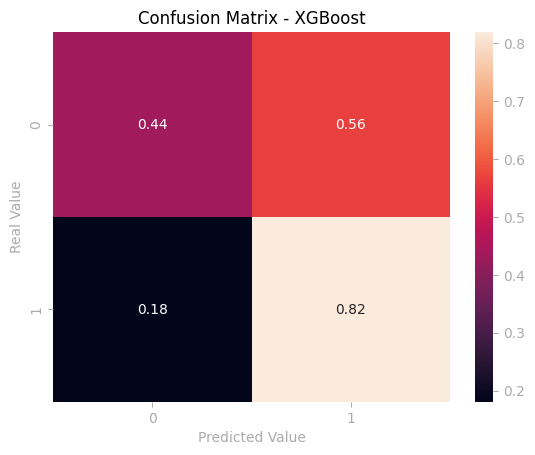

In [45]:
# final XGBoost model
xgb = XGBClassifier(max_depth=3, learning_rate=0.0001, n_estimators=50, gamma=5, min_child_weight=3)
xgb.fit(X_train_rus, y_train_rus)

# predictiona
X_test_xgb = scaler.transform(X_test)
y_pred_xgb = xgb.predict(X_test_xgb)

# classification report
print(classification_report(y_test, y_pred_xgb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_xgb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - XGBoost')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

In [46]:
y_pred_xgb.shape

(26741,)

              precision    recall  f1-score   support

           0       0.88      0.76      0.82     22474
           1       0.27      0.47      0.35      4267

    accuracy                           0.71     26741
   macro avg       0.58      0.62      0.58     26741
weighted avg       0.79      0.71      0.74     26741



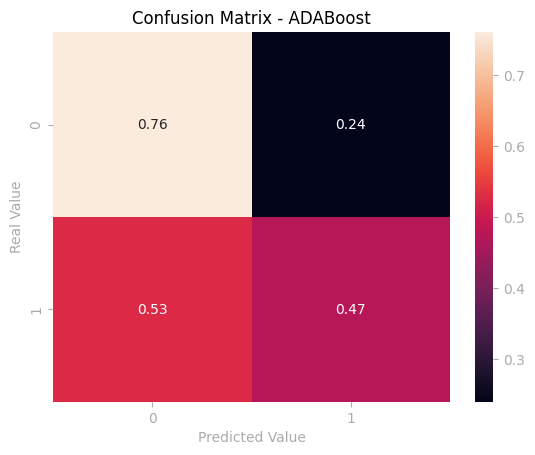

In [47]:
# final ADABOOST model
ada = AdaBoostClassifier(learning_rate=0.01, n_estimators=50)
ada.fit(X_train_rus, y_train_rus)

# prediction
X_test_ada = scaler.transform(X_test)
y_pred_ada = ada.predict(X_test_ada)

# classification report
print(classification_report(y_test, y_pred_ada))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_ada, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - ADABoost')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
              precision    recall  f1-score   support

           0       0.91      0.61      0.73     22474
           1       0.25      0.69      0.37      4267

    accuracy                           0.62     26741
   macro avg       0.58      0.65      0.55     26741
weighted avg       0.81      0.62      0.67     26741



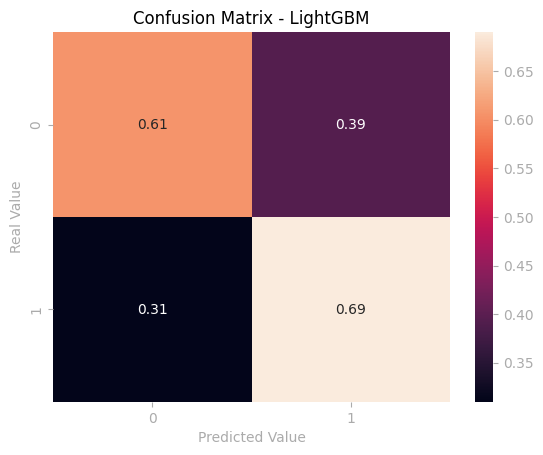

In [48]:
# final LightGBM model
lgb = LGBMClassifier(num_leaves=70, max_depth=5, learning_rate=0.01, min_data_in_leaf=400)
lgb.fit(X_train_rus, y_train_rus)

# prediction
X_test_lgb = scaler.transform(X_test)
y_pred_lgb = lgb.predict(X_test_lgb)

# classification report
print(classification_report(y_test, y_pred_lgb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_lgb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - LightGBM')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

              precision    recall  f1-score   support

           0       0.90      0.66      0.76     22474
           1       0.26      0.63      0.37      4267

    accuracy                           0.65     26741
   macro avg       0.58      0.65      0.57     26741
weighted avg       0.80      0.65      0.70     26741



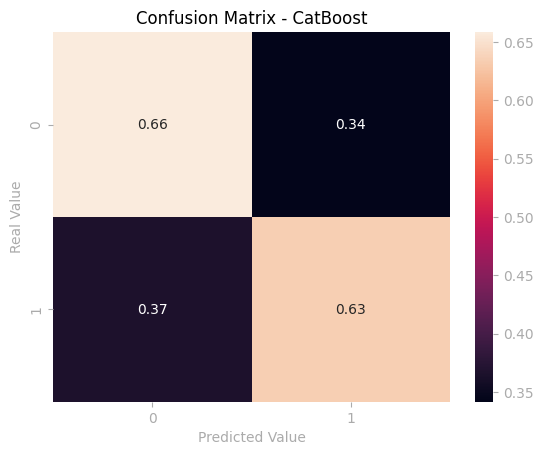

In [49]:
# final CatBoost model
cb = CatBoostClassifier(learning_rate=0.03, depth=6, l2_leaf_reg=5, logging_level='Silent')
cb.fit(X_train_rus, y_train_rus)

# prediction
X_test_cb = scaler.transform(X_test)
y_pred_cb = cb.predict(X_test_cb)

# classification report
print(classification_report(y_test, y_pred_cb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_cb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - CatBoost')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

# precision


In [50]:
# define the function val_model_1
def val_model_1(X, y, clf, show=True):
    """
    Apply cross-validation on the training set.

    # Arguments
        X: DataFrame containing the independent variables.
        y: Series containing the target vector.
        clf: Scikit-learn estimator instance.
        
    # Returns
        float, mean value of the cross-validation scores.
    """
    
    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='precision')

    if show == True:
        print(f'Precision: {scores.mean()}, {scores.std()}')
    
    return scores.mean()

In [51]:
#evaluate the models
xgb = XGBClassifier()
lgb = LGBMClassifier()
cb = CatBoostClassifier()
ada = AdaBoostClassifier()

model = []
precision=[]

for clf in (xgb, lgb, cb, ada):
    model.append(clf.__class__.__name__)
    precision.append(val_model_1(X_train_rus,y_train_rus,clf,show=False))

pd.DataFrame(data=precision, index=model, columns=['precision'])

Learning rate set to 0.018279
0:	learn: 0.6910762	total: 5.26ms	remaining: 5.25s
1:	learn: 0.6892526	total: 10.5ms	remaining: 5.22s
2:	learn: 0.6875666	total: 16ms	remaining: 5.32s
3:	learn: 0.6854915	total: 21.8ms	remaining: 5.43s
4:	learn: 0.6840986	total: 27.7ms	remaining: 5.52s
5:	learn: 0.6823527	total: 33.4ms	remaining: 5.54s
6:	learn: 0.6805234	total: 39.5ms	remaining: 5.6s
7:	learn: 0.6790523	total: 45.3ms	remaining: 5.62s
8:	learn: 0.6776781	total: 51.3ms	remaining: 5.65s
9:	learn: 0.6760086	total: 56.9ms	remaining: 5.63s
10:	learn: 0.6742658	total: 63.2ms	remaining: 5.68s
11:	learn: 0.6728684	total: 68.7ms	remaining: 5.66s
12:	learn: 0.6714810	total: 74.1ms	remaining: 5.63s
13:	learn: 0.6702616	total: 79.6ms	remaining: 5.6s
14:	learn: 0.6688674	total: 85.1ms	remaining: 5.59s
15:	learn: 0.6675254	total: 90.7ms	remaining: 5.57s
16:	learn: 0.6662194	total: 96.2ms	remaining: 5.57s
17:	learn: 0.6649655	total: 102ms	remaining: 5.55s
18:	learn: 0.6636866	total: 107ms	remaining: 5.54

190:	learn: 0.5870229	total: 1.22s	remaining: 5.16s
191:	learn: 0.5866656	total: 1.22s	remaining: 5.15s
192:	learn: 0.5864534	total: 1.23s	remaining: 5.15s
193:	learn: 0.5861914	total: 1.24s	remaining: 5.15s
194:	learn: 0.5858172	total: 1.25s	remaining: 5.14s
195:	learn: 0.5855061	total: 1.25s	remaining: 5.14s
196:	learn: 0.5852648	total: 1.26s	remaining: 5.13s
197:	learn: 0.5850607	total: 1.27s	remaining: 5.13s
198:	learn: 0.5846711	total: 1.27s	remaining: 5.12s
199:	learn: 0.5845096	total: 1.28s	remaining: 5.12s
200:	learn: 0.5841316	total: 1.29s	remaining: 5.11s
201:	learn: 0.5838814	total: 1.29s	remaining: 5.11s
202:	learn: 0.5837181	total: 1.3s	remaining: 5.1s
203:	learn: 0.5834602	total: 1.3s	remaining: 5.09s
204:	learn: 0.5831220	total: 1.31s	remaining: 5.09s
205:	learn: 0.5828107	total: 1.32s	remaining: 5.08s
206:	learn: 0.5824717	total: 1.32s	remaining: 5.07s
207:	learn: 0.5823324	total: 1.33s	remaining: 5.07s
208:	learn: 0.5820868	total: 1.34s	remaining: 5.06s
209:	learn: 0.5

380:	learn: 0.5433822	total: 2.43s	remaining: 3.94s
381:	learn: 0.5431380	total: 2.43s	remaining: 3.94s
382:	learn: 0.5427779	total: 2.44s	remaining: 3.93s
383:	learn: 0.5424859	total: 2.45s	remaining: 3.93s
384:	learn: 0.5423023	total: 2.46s	remaining: 3.92s
385:	learn: 0.5421349	total: 2.46s	remaining: 3.92s
386:	learn: 0.5419621	total: 2.47s	remaining: 3.91s
387:	learn: 0.5417285	total: 2.48s	remaining: 3.91s
388:	learn: 0.5415263	total: 2.48s	remaining: 3.9s
389:	learn: 0.5414254	total: 2.49s	remaining: 3.89s
390:	learn: 0.5413396	total: 2.5s	remaining: 3.89s
391:	learn: 0.5410971	total: 2.5s	remaining: 3.88s
392:	learn: 0.5408644	total: 2.51s	remaining: 3.87s
393:	learn: 0.5406063	total: 2.51s	remaining: 3.87s
394:	learn: 0.5404705	total: 2.52s	remaining: 3.86s
395:	learn: 0.5401607	total: 2.52s	remaining: 3.85s
396:	learn: 0.5399091	total: 2.53s	remaining: 3.85s
397:	learn: 0.5395691	total: 2.54s	remaining: 3.84s
398:	learn: 0.5393933	total: 2.54s	remaining: 3.83s
399:	learn: 0.5

567:	learn: 0.4987668	total: 3.63s	remaining: 2.76s
568:	learn: 0.4983763	total: 3.63s	remaining: 2.75s
569:	learn: 0.4981598	total: 3.64s	remaining: 2.75s
570:	learn: 0.4978743	total: 3.65s	remaining: 2.74s
571:	learn: 0.4976319	total: 3.65s	remaining: 2.73s
572:	learn: 0.4974075	total: 3.66s	remaining: 2.73s
573:	learn: 0.4971424	total: 3.67s	remaining: 2.72s
574:	learn: 0.4967626	total: 3.67s	remaining: 2.71s
575:	learn: 0.4966121	total: 3.68s	remaining: 2.71s
576:	learn: 0.4963557	total: 3.69s	remaining: 2.7s
577:	learn: 0.4961350	total: 3.69s	remaining: 2.69s
578:	learn: 0.4958663	total: 3.7s	remaining: 2.69s
579:	learn: 0.4956818	total: 3.7s	remaining: 2.68s
580:	learn: 0.4953567	total: 3.71s	remaining: 2.67s
581:	learn: 0.4951780	total: 3.71s	remaining: 2.67s
582:	learn: 0.4947930	total: 3.72s	remaining: 2.66s
583:	learn: 0.4945412	total: 3.73s	remaining: 2.65s
584:	learn: 0.4943000	total: 3.73s	remaining: 2.65s
585:	learn: 0.4940847	total: 3.74s	remaining: 2.64s
586:	learn: 0.4

726:	learn: 0.4590399	total: 4.65s	remaining: 1.75s
727:	learn: 0.4587933	total: 4.66s	remaining: 1.74s
728:	learn: 0.4585592	total: 4.66s	remaining: 1.73s
729:	learn: 0.4582865	total: 4.67s	remaining: 1.73s
730:	learn: 0.4580850	total: 4.68s	remaining: 1.72s
731:	learn: 0.4578632	total: 4.68s	remaining: 1.71s
732:	learn: 0.4576632	total: 4.69s	remaining: 1.71s
733:	learn: 0.4573899	total: 4.7s	remaining: 1.7s
734:	learn: 0.4570571	total: 4.7s	remaining: 1.7s
735:	learn: 0.4568157	total: 4.71s	remaining: 1.69s
736:	learn: 0.4566076	total: 4.71s	remaining: 1.68s
737:	learn: 0.4562523	total: 4.72s	remaining: 1.68s
738:	learn: 0.4559969	total: 4.73s	remaining: 1.67s
739:	learn: 0.4557926	total: 4.73s	remaining: 1.66s
740:	learn: 0.4555794	total: 4.74s	remaining: 1.66s
741:	learn: 0.4552805	total: 4.74s	remaining: 1.65s
742:	learn: 0.4550997	total: 4.75s	remaining: 1.64s
743:	learn: 0.4548847	total: 4.76s	remaining: 1.64s
744:	learn: 0.4546987	total: 4.76s	remaining: 1.63s
745:	learn: 0.45

887:	learn: 0.4229007	total: 5.66s	remaining: 714ms
888:	learn: 0.4227415	total: 5.67s	remaining: 708ms
889:	learn: 0.4225793	total: 5.67s	remaining: 701ms
890:	learn: 0.4224259	total: 5.68s	remaining: 695ms
891:	learn: 0.4221498	total: 5.69s	remaining: 689ms
892:	learn: 0.4220048	total: 5.69s	remaining: 682ms
893:	learn: 0.4217379	total: 5.7s	remaining: 676ms
894:	learn: 0.4214786	total: 5.71s	remaining: 670ms
895:	learn: 0.4212924	total: 5.71s	remaining: 663ms
896:	learn: 0.4210870	total: 5.72s	remaining: 657ms
897:	learn: 0.4208932	total: 5.72s	remaining: 650ms
898:	learn: 0.4207118	total: 5.73s	remaining: 644ms
899:	learn: 0.4206147	total: 5.74s	remaining: 638ms
900:	learn: 0.4204142	total: 5.74s	remaining: 631ms
901:	learn: 0.4201904	total: 5.75s	remaining: 625ms
902:	learn: 0.4199828	total: 5.76s	remaining: 618ms
903:	learn: 0.4197705	total: 5.76s	remaining: 612ms
904:	learn: 0.4196429	total: 5.77s	remaining: 606ms
905:	learn: 0.4194418	total: 5.78s	remaining: 599ms
906:	learn: 0

66:	learn: 0.6320293	total: 399ms	remaining: 5.55s
67:	learn: 0.6316025	total: 406ms	remaining: 5.56s
68:	learn: 0.6310162	total: 413ms	remaining: 5.57s
69:	learn: 0.6305963	total: 420ms	remaining: 5.58s
70:	learn: 0.6300189	total: 427ms	remaining: 5.58s
71:	learn: 0.6295375	total: 433ms	remaining: 5.58s
72:	learn: 0.6289830	total: 439ms	remaining: 5.58s
73:	learn: 0.6285504	total: 445ms	remaining: 5.57s
74:	learn: 0.6281334	total: 451ms	remaining: 5.57s
75:	learn: 0.6275759	total: 458ms	remaining: 5.57s
76:	learn: 0.6272325	total: 465ms	remaining: 5.58s
77:	learn: 0.6269353	total: 472ms	remaining: 5.58s
78:	learn: 0.6263888	total: 479ms	remaining: 5.58s
79:	learn: 0.6260375	total: 486ms	remaining: 5.58s
80:	learn: 0.6256412	total: 492ms	remaining: 5.58s
81:	learn: 0.6253203	total: 498ms	remaining: 5.58s
82:	learn: 0.6250029	total: 505ms	remaining: 5.57s
83:	learn: 0.6245578	total: 511ms	remaining: 5.57s
84:	learn: 0.6241436	total: 517ms	remaining: 5.56s
85:	learn: 0.6237488	total: 523

229:	learn: 0.5819590	total: 1.42s	remaining: 4.75s
230:	learn: 0.5817048	total: 1.43s	remaining: 4.74s
231:	learn: 0.5815101	total: 1.43s	remaining: 4.74s
232:	learn: 0.5812029	total: 1.44s	remaining: 4.74s
233:	learn: 0.5809566	total: 1.45s	remaining: 4.73s
234:	learn: 0.5806243	total: 1.45s	remaining: 4.72s
235:	learn: 0.5804046	total: 1.46s	remaining: 4.72s
236:	learn: 0.5801065	total: 1.46s	remaining: 4.71s
237:	learn: 0.5799342	total: 1.47s	remaining: 4.71s
238:	learn: 0.5797766	total: 1.48s	remaining: 4.7s
239:	learn: 0.5795150	total: 1.48s	remaining: 4.7s
240:	learn: 0.5792340	total: 1.49s	remaining: 4.69s
241:	learn: 0.5788812	total: 1.5s	remaining: 4.69s
242:	learn: 0.5786744	total: 1.5s	remaining: 4.68s
243:	learn: 0.5784759	total: 1.51s	remaining: 4.67s
244:	learn: 0.5782966	total: 1.51s	remaining: 4.67s
245:	learn: 0.5779936	total: 1.52s	remaining: 4.66s
246:	learn: 0.5777933	total: 1.53s	remaining: 4.66s
247:	learn: 0.5773589	total: 1.53s	remaining: 4.65s
248:	learn: 0.57

394:	learn: 0.5444663	total: 2.45s	remaining: 3.76s
395:	learn: 0.5443695	total: 2.46s	remaining: 3.75s
396:	learn: 0.5441370	total: 2.47s	remaining: 3.75s
397:	learn: 0.5440405	total: 2.48s	remaining: 3.74s
398:	learn: 0.5436577	total: 2.48s	remaining: 3.74s
399:	learn: 0.5435420	total: 2.49s	remaining: 3.73s
400:	learn: 0.5432674	total: 2.49s	remaining: 3.73s
401:	learn: 0.5428403	total: 2.5s	remaining: 3.72s
402:	learn: 0.5425841	total: 2.51s	remaining: 3.71s
403:	learn: 0.5425071	total: 2.51s	remaining: 3.71s
404:	learn: 0.5423562	total: 2.52s	remaining: 3.7s
405:	learn: 0.5420803	total: 2.52s	remaining: 3.69s
406:	learn: 0.5417734	total: 2.53s	remaining: 3.69s
407:	learn: 0.5416081	total: 2.54s	remaining: 3.68s
408:	learn: 0.5414120	total: 2.54s	remaining: 3.67s
409:	learn: 0.5412005	total: 2.55s	remaining: 3.67s
410:	learn: 0.5409524	total: 2.56s	remaining: 3.66s
411:	learn: 0.5407635	total: 2.56s	remaining: 3.66s
412:	learn: 0.5406410	total: 2.57s	remaining: 3.65s
413:	learn: 0.

555:	learn: 0.5080996	total: 3.47s	remaining: 2.77s
556:	learn: 0.5078499	total: 3.48s	remaining: 2.77s
557:	learn: 0.5075849	total: 3.48s	remaining: 2.76s
558:	learn: 0.5073891	total: 3.49s	remaining: 2.75s
559:	learn: 0.5071061	total: 3.5s	remaining: 2.75s
560:	learn: 0.5068243	total: 3.5s	remaining: 2.74s
561:	learn: 0.5066089	total: 3.51s	remaining: 2.74s
562:	learn: 0.5063848	total: 3.52s	remaining: 2.73s
563:	learn: 0.5060566	total: 3.52s	remaining: 2.72s
564:	learn: 0.5058243	total: 3.53s	remaining: 2.72s
565:	learn: 0.5056558	total: 3.54s	remaining: 2.71s
566:	learn: 0.5053886	total: 3.54s	remaining: 2.71s
567:	learn: 0.5051441	total: 3.55s	remaining: 2.7s
568:	learn: 0.5049339	total: 3.56s	remaining: 2.69s
569:	learn: 0.5046787	total: 3.56s	remaining: 2.69s
570:	learn: 0.5044521	total: 3.57s	remaining: 2.68s
571:	learn: 0.5041409	total: 3.57s	remaining: 2.67s
572:	learn: 0.5038962	total: 3.58s	remaining: 2.67s
573:	learn: 0.5037398	total: 3.59s	remaining: 2.66s
574:	learn: 0.5

742:	learn: 0.4639594	total: 4.69s	remaining: 1.62s
743:	learn: 0.4636957	total: 4.7s	remaining: 1.62s
744:	learn: 0.4635341	total: 4.71s	remaining: 1.61s
745:	learn: 0.4633267	total: 4.71s	remaining: 1.6s
746:	learn: 0.4631270	total: 4.73s	remaining: 1.6s
747:	learn: 0.4628337	total: 4.73s	remaining: 1.59s
748:	learn: 0.4626444	total: 4.74s	remaining: 1.59s
749:	learn: 0.4623930	total: 4.75s	remaining: 1.58s
750:	learn: 0.4622069	total: 4.75s	remaining: 1.57s
751:	learn: 0.4620429	total: 4.76s	remaining: 1.57s
752:	learn: 0.4617903	total: 4.76s	remaining: 1.56s
753:	learn: 0.4615574	total: 4.77s	remaining: 1.56s
754:	learn: 0.4614242	total: 4.78s	remaining: 1.55s
755:	learn: 0.4612326	total: 4.78s	remaining: 1.54s
756:	learn: 0.4610637	total: 4.79s	remaining: 1.54s
757:	learn: 0.4608482	total: 4.8s	remaining: 1.53s
758:	learn: 0.4606664	total: 4.8s	remaining: 1.52s
759:	learn: 0.4604903	total: 4.81s	remaining: 1.52s
760:	learn: 0.4603422	total: 4.82s	remaining: 1.51s
761:	learn: 0.460

907:	learn: 0.4295776	total: 5.74s	remaining: 582ms
908:	learn: 0.4292668	total: 5.75s	remaining: 576ms
909:	learn: 0.4291050	total: 5.76s	remaining: 569ms
910:	learn: 0.4288526	total: 5.76s	remaining: 563ms
911:	learn: 0.4286433	total: 5.77s	remaining: 557ms
912:	learn: 0.4283546	total: 5.78s	remaining: 551ms
913:	learn: 0.4281223	total: 5.78s	remaining: 544ms
914:	learn: 0.4278807	total: 5.79s	remaining: 538ms
915:	learn: 0.4276582	total: 5.8s	remaining: 532ms
916:	learn: 0.4274667	total: 5.8s	remaining: 525ms
917:	learn: 0.4272697	total: 5.81s	remaining: 519ms
918:	learn: 0.4270047	total: 5.82s	remaining: 513ms
919:	learn: 0.4268606	total: 5.82s	remaining: 506ms
920:	learn: 0.4265729	total: 5.83s	remaining: 500ms
921:	learn: 0.4263984	total: 5.84s	remaining: 494ms
922:	learn: 0.4262010	total: 5.84s	remaining: 487ms
923:	learn: 0.4260238	total: 5.85s	remaining: 481ms
924:	learn: 0.4257932	total: 5.86s	remaining: 475ms
925:	learn: 0.4256284	total: 5.86s	remaining: 468ms
926:	learn: 0.

100:	learn: 0.6115702	total: 609ms	remaining: 5.42s
101:	learn: 0.6111531	total: 615ms	remaining: 5.42s
102:	learn: 0.6107227	total: 622ms	remaining: 5.41s
103:	learn: 0.6105310	total: 628ms	remaining: 5.41s
104:	learn: 0.6102231	total: 635ms	remaining: 5.41s
105:	learn: 0.6099851	total: 641ms	remaining: 5.41s
106:	learn: 0.6096559	total: 647ms	remaining: 5.4s
107:	learn: 0.6092787	total: 654ms	remaining: 5.4s
108:	learn: 0.6089701	total: 660ms	remaining: 5.4s
109:	learn: 0.6085762	total: 666ms	remaining: 5.39s
110:	learn: 0.6083180	total: 673ms	remaining: 5.39s
111:	learn: 0.6079952	total: 679ms	remaining: 5.38s
112:	learn: 0.6075784	total: 685ms	remaining: 5.38s
113:	learn: 0.6072604	total: 692ms	remaining: 5.38s
114:	learn: 0.6069422	total: 698ms	remaining: 5.37s
115:	learn: 0.6065472	total: 704ms	remaining: 5.36s
116:	learn: 0.6062636	total: 710ms	remaining: 5.36s
117:	learn: 0.6058734	total: 716ms	remaining: 5.35s
118:	learn: 0.6054248	total: 722ms	remaining: 5.34s
119:	learn: 0.6

264:	learn: 0.5656005	total: 1.64s	remaining: 4.54s
265:	learn: 0.5654022	total: 1.65s	remaining: 4.54s
266:	learn: 0.5650746	total: 1.65s	remaining: 4.54s
267:	learn: 0.5649323	total: 1.66s	remaining: 4.53s
268:	learn: 0.5645869	total: 1.67s	remaining: 4.53s
269:	learn: 0.5643372	total: 1.67s	remaining: 4.52s
270:	learn: 0.5639918	total: 1.68s	remaining: 4.51s
271:	learn: 0.5637504	total: 1.68s	remaining: 4.51s
272:	learn: 0.5636334	total: 1.69s	remaining: 4.5s
273:	learn: 0.5634264	total: 1.7s	remaining: 4.5s
274:	learn: 0.5631659	total: 1.7s	remaining: 4.49s
275:	learn: 0.5628086	total: 1.71s	remaining: 4.49s
276:	learn: 0.5625528	total: 1.72s	remaining: 4.48s
277:	learn: 0.5622858	total: 1.72s	remaining: 4.47s
278:	learn: 0.5621462	total: 1.73s	remaining: 4.47s
279:	learn: 0.5619557	total: 1.74s	remaining: 4.46s
280:	learn: 0.5617611	total: 1.74s	remaining: 4.46s
281:	learn: 0.5615046	total: 1.75s	remaining: 4.45s
282:	learn: 0.5613294	total: 1.75s	remaining: 4.45s
283:	learn: 0.56

424:	learn: 0.5312860	total: 2.66s	remaining: 3.6s
425:	learn: 0.5310695	total: 2.67s	remaining: 3.6s
426:	learn: 0.5308936	total: 2.68s	remaining: 3.59s
427:	learn: 0.5307144	total: 2.69s	remaining: 3.59s
428:	learn: 0.5305302	total: 2.69s	remaining: 3.58s
429:	learn: 0.5303559	total: 2.7s	remaining: 3.58s
430:	learn: 0.5301068	total: 2.71s	remaining: 3.57s
431:	learn: 0.5299188	total: 2.71s	remaining: 3.56s
432:	learn: 0.5297949	total: 2.72s	remaining: 3.56s
433:	learn: 0.5294707	total: 2.72s	remaining: 3.55s
434:	learn: 0.5292209	total: 2.73s	remaining: 3.55s
435:	learn: 0.5289654	total: 2.74s	remaining: 3.54s
436:	learn: 0.5288119	total: 2.74s	remaining: 3.54s
437:	learn: 0.5285765	total: 2.75s	remaining: 3.53s
438:	learn: 0.5284007	total: 2.76s	remaining: 3.52s
439:	learn: 0.5281805	total: 2.76s	remaining: 3.52s
440:	learn: 0.5278886	total: 2.77s	remaining: 3.51s
441:	learn: 0.5275661	total: 2.78s	remaining: 3.5s
442:	learn: 0.5273047	total: 2.78s	remaining: 3.5s
443:	learn: 0.527

583:	learn: 0.4925015	total: 3.68s	remaining: 2.62s
584:	learn: 0.4923721	total: 3.69s	remaining: 2.62s
585:	learn: 0.4921407	total: 3.7s	remaining: 2.61s
586:	learn: 0.4918738	total: 3.7s	remaining: 2.6s
587:	learn: 0.4915875	total: 3.71s	remaining: 2.6s
588:	learn: 0.4913225	total: 3.72s	remaining: 2.59s
589:	learn: 0.4910628	total: 3.72s	remaining: 2.59s
590:	learn: 0.4907942	total: 3.73s	remaining: 2.58s
591:	learn: 0.4905794	total: 3.73s	remaining: 2.57s
592:	learn: 0.4903240	total: 3.74s	remaining: 2.57s
593:	learn: 0.4900045	total: 3.75s	remaining: 2.56s
594:	learn: 0.4896421	total: 3.75s	remaining: 2.56s
595:	learn: 0.4894108	total: 3.76s	remaining: 2.55s
596:	learn: 0.4891950	total: 3.77s	remaining: 2.54s
597:	learn: 0.4889805	total: 3.77s	remaining: 2.54s
598:	learn: 0.4887021	total: 3.78s	remaining: 2.53s
599:	learn: 0.4884587	total: 3.79s	remaining: 2.52s
600:	learn: 0.4881959	total: 3.79s	remaining: 2.52s
601:	learn: 0.4880736	total: 3.8s	remaining: 2.51s
602:	learn: 0.487

744:	learn: 0.4534239	total: 4.71s	remaining: 1.61s
745:	learn: 0.4532169	total: 4.71s	remaining: 1.6s
746:	learn: 0.4530737	total: 4.72s	remaining: 1.6s
747:	learn: 0.4528898	total: 4.73s	remaining: 1.59s
748:	learn: 0.4525782	total: 4.73s	remaining: 1.59s
749:	learn: 0.4523270	total: 4.74s	remaining: 1.58s
750:	learn: 0.4520370	total: 4.75s	remaining: 1.57s
751:	learn: 0.4518515	total: 4.75s	remaining: 1.57s
752:	learn: 0.4517112	total: 4.76s	remaining: 1.56s
753:	learn: 0.4515123	total: 4.77s	remaining: 1.55s
754:	learn: 0.4513214	total: 4.77s	remaining: 1.55s
755:	learn: 0.4511708	total: 4.78s	remaining: 1.54s
756:	learn: 0.4509311	total: 4.78s	remaining: 1.53s
757:	learn: 0.4507685	total: 4.79s	remaining: 1.53s
758:	learn: 0.4505657	total: 4.8s	remaining: 1.52s
759:	learn: 0.4503891	total: 4.8s	remaining: 1.52s
760:	learn: 0.4500739	total: 4.81s	remaining: 1.51s
761:	learn: 0.4498779	total: 4.82s	remaining: 1.5s
762:	learn: 0.4496113	total: 4.82s	remaining: 1.5s
763:	learn: 0.4494

908:	learn: 0.4181898	total: 5.74s	remaining: 575ms
909:	learn: 0.4178900	total: 5.75s	remaining: 568ms
910:	learn: 0.4177387	total: 5.75s	remaining: 562ms
911:	learn: 0.4174566	total: 5.76s	remaining: 556ms
912:	learn: 0.4172960	total: 5.77s	remaining: 550ms
913:	learn: 0.4171140	total: 5.77s	remaining: 543ms
914:	learn: 0.4168988	total: 5.78s	remaining: 537ms
915:	learn: 0.4166668	total: 5.79s	remaining: 531ms
916:	learn: 0.4165159	total: 5.79s	remaining: 524ms
917:	learn: 0.4162727	total: 5.8s	remaining: 518ms
918:	learn: 0.4160646	total: 5.81s	remaining: 512ms
919:	learn: 0.4158167	total: 5.81s	remaining: 505ms
920:	learn: 0.4155688	total: 5.82s	remaining: 499ms
921:	learn: 0.4154645	total: 5.83s	remaining: 493ms
922:	learn: 0.4153429	total: 5.83s	remaining: 487ms
923:	learn: 0.4151482	total: 5.84s	remaining: 480ms
924:	learn: 0.4149597	total: 5.84s	remaining: 474ms
925:	learn: 0.4148361	total: 5.85s	remaining: 468ms
926:	learn: 0.4146147	total: 5.86s	remaining: 461ms
927:	learn: 0

97:	learn: 0.6148467	total: 610ms	remaining: 5.62s
98:	learn: 0.6144466	total: 617ms	remaining: 5.62s
99:	learn: 0.6141591	total: 625ms	remaining: 5.62s
100:	learn: 0.6137435	total: 631ms	remaining: 5.62s
101:	learn: 0.6134416	total: 638ms	remaining: 5.62s
102:	learn: 0.6131930	total: 645ms	remaining: 5.61s
103:	learn: 0.6127445	total: 651ms	remaining: 5.61s
104:	learn: 0.6125164	total: 658ms	remaining: 5.61s
105:	learn: 0.6121340	total: 664ms	remaining: 5.6s
106:	learn: 0.6117368	total: 671ms	remaining: 5.6s
107:	learn: 0.6115114	total: 678ms	remaining: 5.6s
108:	learn: 0.6110902	total: 684ms	remaining: 5.59s
109:	learn: 0.6108284	total: 690ms	remaining: 5.58s
110:	learn: 0.6103643	total: 697ms	remaining: 5.58s
111:	learn: 0.6100516	total: 703ms	remaining: 5.57s
112:	learn: 0.6098201	total: 709ms	remaining: 5.57s
113:	learn: 0.6097038	total: 715ms	remaining: 5.56s
114:	learn: 0.6094431	total: 721ms	remaining: 5.55s
115:	learn: 0.6090040	total: 727ms	remaining: 5.54s
116:	learn: 0.6086

287:	learn: 0.5643334	total: 1.83s	remaining: 4.52s
288:	learn: 0.5641332	total: 1.83s	remaining: 4.51s
289:	learn: 0.5639197	total: 1.84s	remaining: 4.5s
290:	learn: 0.5637746	total: 1.85s	remaining: 4.5s
291:	learn: 0.5635457	total: 1.85s	remaining: 4.49s
292:	learn: 0.5632599	total: 1.86s	remaining: 4.49s
293:	learn: 0.5630562	total: 1.87s	remaining: 4.48s
294:	learn: 0.5630346	total: 1.87s	remaining: 4.47s
295:	learn: 0.5627771	total: 1.88s	remaining: 4.46s
296:	learn: 0.5625765	total: 1.88s	remaining: 4.46s
297:	learn: 0.5623081	total: 1.89s	remaining: 4.45s
298:	learn: 0.5620637	total: 1.89s	remaining: 4.44s
299:	learn: 0.5618027	total: 1.9s	remaining: 4.44s
300:	learn: 0.5616919	total: 1.91s	remaining: 4.43s
301:	learn: 0.5614600	total: 1.91s	remaining: 4.42s
302:	learn: 0.5611140	total: 1.92s	remaining: 4.42s
303:	learn: 0.5608571	total: 1.93s	remaining: 4.41s
304:	learn: 0.5605796	total: 1.93s	remaining: 4.4s
305:	learn: 0.5604089	total: 1.94s	remaining: 4.4s
306:	learn: 0.560

455:	learn: 0.5286147	total: 2.88s	remaining: 3.43s
456:	learn: 0.5283035	total: 2.88s	remaining: 3.42s
457:	learn: 0.5280164	total: 2.89s	remaining: 3.42s
458:	learn: 0.5277528	total: 2.89s	remaining: 3.41s
459:	learn: 0.5274853	total: 2.9s	remaining: 3.4s
460:	learn: 0.5273586	total: 2.91s	remaining: 3.4s
461:	learn: 0.5271009	total: 2.91s	remaining: 3.39s
462:	learn: 0.5270394	total: 2.92s	remaining: 3.39s
463:	learn: 0.5267649	total: 2.93s	remaining: 3.38s
464:	learn: 0.5264408	total: 2.93s	remaining: 3.37s
465:	learn: 0.5261133	total: 2.94s	remaining: 3.37s
466:	learn: 0.5258159	total: 2.94s	remaining: 3.36s
467:	learn: 0.5255588	total: 2.95s	remaining: 3.35s
468:	learn: 0.5252458	total: 2.96s	remaining: 3.35s
469:	learn: 0.5250536	total: 2.96s	remaining: 3.34s
470:	learn: 0.5248517	total: 2.97s	remaining: 3.33s
471:	learn: 0.5245764	total: 2.98s	remaining: 3.33s
472:	learn: 0.5243575	total: 2.98s	remaining: 3.32s
473:	learn: 0.5241478	total: 2.99s	remaining: 3.31s
474:	learn: 0.5

618:	learn: 0.4880523	total: 3.9s	remaining: 2.4s
619:	learn: 0.4877573	total: 3.9s	remaining: 2.39s
620:	learn: 0.4874395	total: 3.91s	remaining: 2.39s
621:	learn: 0.4871563	total: 3.92s	remaining: 2.38s
622:	learn: 0.4869962	total: 3.92s	remaining: 2.38s
623:	learn: 0.4867412	total: 3.93s	remaining: 2.37s
624:	learn: 0.4865417	total: 3.94s	remaining: 2.36s
625:	learn: 0.4861994	total: 3.94s	remaining: 2.36s
626:	learn: 0.4859674	total: 3.95s	remaining: 2.35s
627:	learn: 0.4858301	total: 3.96s	remaining: 2.34s
628:	learn: 0.4855747	total: 3.96s	remaining: 2.34s
629:	learn: 0.4852915	total: 3.97s	remaining: 2.33s
630:	learn: 0.4849595	total: 3.98s	remaining: 2.32s
631:	learn: 0.4847699	total: 3.98s	remaining: 2.32s
632:	learn: 0.4846275	total: 3.99s	remaining: 2.31s
633:	learn: 0.4843650	total: 3.99s	remaining: 2.31s
634:	learn: 0.4841405	total: 4s	remaining: 2.3s
635:	learn: 0.4838775	total: 4s	remaining: 2.29s
636:	learn: 0.4837028	total: 4.01s	remaining: 2.29s
637:	learn: 0.4834807	

782:	learn: 0.4502631	total: 4.92s	remaining: 1.36s
783:	learn: 0.4500286	total: 4.92s	remaining: 1.36s
784:	learn: 0.4497770	total: 4.93s	remaining: 1.35s
785:	learn: 0.4495227	total: 4.94s	remaining: 1.34s
786:	learn: 0.4492677	total: 4.94s	remaining: 1.34s
787:	learn: 0.4490440	total: 4.95s	remaining: 1.33s
788:	learn: 0.4488212	total: 4.96s	remaining: 1.32s
789:	learn: 0.4487150	total: 4.96s	remaining: 1.32s
790:	learn: 0.4483783	total: 4.97s	remaining: 1.31s
791:	learn: 0.4481839	total: 4.98s	remaining: 1.31s
792:	learn: 0.4478571	total: 4.98s	remaining: 1.3s
793:	learn: 0.4476684	total: 4.99s	remaining: 1.29s
794:	learn: 0.4474485	total: 5s	remaining: 1.29s
795:	learn: 0.4473144	total: 5s	remaining: 1.28s
796:	learn: 0.4470598	total: 5.01s	remaining: 1.27s
797:	learn: 0.4468839	total: 5.01s	remaining: 1.27s
798:	learn: 0.4465946	total: 5.02s	remaining: 1.26s
799:	learn: 0.4464073	total: 5.03s	remaining: 1.26s
800:	learn: 0.4462540	total: 5.03s	remaining: 1.25s
801:	learn: 0.44601

942:	learn: 0.4153484	total: 5.94s	remaining: 359ms
943:	learn: 0.4151200	total: 5.95s	remaining: 353ms
944:	learn: 0.4148997	total: 5.95s	remaining: 346ms
945:	learn: 0.4146954	total: 5.96s	remaining: 340ms
946:	learn: 0.4145540	total: 5.97s	remaining: 334ms
947:	learn: 0.4143893	total: 5.97s	remaining: 328ms
948:	learn: 0.4141842	total: 5.98s	remaining: 321ms
949:	learn: 0.4140044	total: 5.99s	remaining: 315ms
950:	learn: 0.4137454	total: 5.99s	remaining: 309ms
951:	learn: 0.4135185	total: 6s	remaining: 302ms
952:	learn: 0.4133509	total: 6s	remaining: 296ms
953:	learn: 0.4130762	total: 6.01s	remaining: 290ms
954:	learn: 0.4128340	total: 6.02s	remaining: 284ms
955:	learn: 0.4125563	total: 6.02s	remaining: 277ms
956:	learn: 0.4124079	total: 6.03s	remaining: 271ms
957:	learn: 0.4122335	total: 6.04s	remaining: 265ms
958:	learn: 0.4119753	total: 6.04s	remaining: 258ms
959:	learn: 0.4117547	total: 6.05s	remaining: 252ms
960:	learn: 0.4115200	total: 6.06s	remaining: 246ms
961:	learn: 0.4112

102:	learn: 0.6078608	total: 617ms	remaining: 5.37s
103:	learn: 0.6076070	total: 624ms	remaining: 5.38s
104:	learn: 0.6071690	total: 631ms	remaining: 5.38s
105:	learn: 0.6068711	total: 638ms	remaining: 5.38s
106:	learn: 0.6064512	total: 644ms	remaining: 5.38s
107:	learn: 0.6060274	total: 651ms	remaining: 5.37s
108:	learn: 0.6056704	total: 657ms	remaining: 5.37s
109:	learn: 0.6053979	total: 663ms	remaining: 5.37s
110:	learn: 0.6049080	total: 670ms	remaining: 5.36s
111:	learn: 0.6047020	total: 676ms	remaining: 5.36s
112:	learn: 0.6043618	total: 682ms	remaining: 5.35s
113:	learn: 0.6041506	total: 688ms	remaining: 5.35s
114:	learn: 0.6036530	total: 694ms	remaining: 5.34s
115:	learn: 0.6032409	total: 700ms	remaining: 5.34s
116:	learn: 0.6028367	total: 707ms	remaining: 5.33s
117:	learn: 0.6024701	total: 713ms	remaining: 5.33s
118:	learn: 0.6020843	total: 719ms	remaining: 5.32s
119:	learn: 0.6017223	total: 725ms	remaining: 5.32s
120:	learn: 0.6013833	total: 731ms	remaining: 5.31s
121:	learn: 

267:	learn: 0.5605456	total: 1.65s	remaining: 4.51s
268:	learn: 0.5602144	total: 1.66s	remaining: 4.51s
269:	learn: 0.5599595	total: 1.67s	remaining: 4.5s
270:	learn: 0.5596711	total: 1.67s	remaining: 4.5s
271:	learn: 0.5594806	total: 1.68s	remaining: 4.49s
272:	learn: 0.5591402	total: 1.69s	remaining: 4.49s
273:	learn: 0.5590417	total: 1.69s	remaining: 4.48s
274:	learn: 0.5587594	total: 1.7s	remaining: 4.48s
275:	learn: 0.5585844	total: 1.7s	remaining: 4.47s
276:	learn: 0.5583215	total: 1.71s	remaining: 4.46s
277:	learn: 0.5580708	total: 1.72s	remaining: 4.46s
278:	learn: 0.5579394	total: 1.72s	remaining: 4.45s
279:	learn: 0.5577951	total: 1.73s	remaining: 4.45s
280:	learn: 0.5575762	total: 1.74s	remaining: 4.44s
281:	learn: 0.5574063	total: 1.74s	remaining: 4.43s
282:	learn: 0.5571284	total: 1.75s	remaining: 4.43s
283:	learn: 0.5569035	total: 1.75s	remaining: 4.42s
284:	learn: 0.5567211	total: 1.76s	remaining: 4.41s
285:	learn: 0.5566000	total: 1.76s	remaining: 4.41s
286:	learn: 0.55

431:	learn: 0.5249722	total: 2.67s	remaining: 3.52s
432:	learn: 0.5247657	total: 2.68s	remaining: 3.51s
433:	learn: 0.5245908	total: 2.69s	remaining: 3.5s
434:	learn: 0.5243241	total: 2.69s	remaining: 3.5s
435:	learn: 0.5240559	total: 2.7s	remaining: 3.49s
436:	learn: 0.5238423	total: 2.71s	remaining: 3.48s
437:	learn: 0.5234698	total: 2.71s	remaining: 3.48s
438:	learn: 0.5231881	total: 2.72s	remaining: 3.47s
439:	learn: 0.5228308	total: 2.73s	remaining: 3.47s
440:	learn: 0.5226330	total: 2.73s	remaining: 3.46s
441:	learn: 0.5224046	total: 2.74s	remaining: 3.46s
442:	learn: 0.5220993	total: 2.75s	remaining: 3.45s
443:	learn: 0.5219298	total: 2.75s	remaining: 3.44s
444:	learn: 0.5216998	total: 2.76s	remaining: 3.44s
445:	learn: 0.5215385	total: 2.76s	remaining: 3.43s
446:	learn: 0.5212181	total: 2.77s	remaining: 3.43s
447:	learn: 0.5209532	total: 2.77s	remaining: 3.42s
448:	learn: 0.5207680	total: 2.78s	remaining: 3.41s
449:	learn: 0.5203613	total: 2.79s	remaining: 3.41s
450:	learn: 0.5

590:	learn: 0.4853728	total: 3.69s	remaining: 2.55s
591:	learn: 0.4850632	total: 3.69s	remaining: 2.54s
592:	learn: 0.4847640	total: 3.7s	remaining: 2.54s
593:	learn: 0.4844764	total: 3.71s	remaining: 2.53s
594:	learn: 0.4842095	total: 3.72s	remaining: 2.53s
595:	learn: 0.4839719	total: 3.72s	remaining: 2.52s
596:	learn: 0.4838636	total: 3.73s	remaining: 2.52s
597:	learn: 0.4836461	total: 3.74s	remaining: 2.51s
598:	learn: 0.4834944	total: 3.74s	remaining: 2.5s
599:	learn: 0.4831383	total: 3.75s	remaining: 2.5s
600:	learn: 0.4828914	total: 3.76s	remaining: 2.49s
601:	learn: 0.4825659	total: 3.76s	remaining: 2.49s
602:	learn: 0.4824000	total: 3.77s	remaining: 2.48s
603:	learn: 0.4821052	total: 3.77s	remaining: 2.47s
604:	learn: 0.4817982	total: 3.78s	remaining: 2.47s
605:	learn: 0.4815626	total: 3.79s	remaining: 2.46s
606:	learn: 0.4812880	total: 3.79s	remaining: 2.46s
607:	learn: 0.4809505	total: 3.8s	remaining: 2.45s
608:	learn: 0.4806391	total: 3.81s	remaining: 2.44s
609:	learn: 0.48

749:	learn: 0.4474726	total: 4.71s	remaining: 1.57s
750:	learn: 0.4471562	total: 4.71s	remaining: 1.56s
751:	learn: 0.4469080	total: 4.72s	remaining: 1.56s
752:	learn: 0.4467283	total: 4.73s	remaining: 1.55s
753:	learn: 0.4464696	total: 4.74s	remaining: 1.54s
754:	learn: 0.4462723	total: 4.74s	remaining: 1.54s
755:	learn: 0.4461161	total: 4.75s	remaining: 1.53s
756:	learn: 0.4459028	total: 4.75s	remaining: 1.53s
757:	learn: 0.4457115	total: 4.76s	remaining: 1.52s
758:	learn: 0.4455243	total: 4.77s	remaining: 1.51s
759:	learn: 0.4452862	total: 4.77s	remaining: 1.51s
760:	learn: 0.4450338	total: 4.78s	remaining: 1.5s
761:	learn: 0.4448104	total: 4.79s	remaining: 1.49s
762:	learn: 0.4445394	total: 4.79s	remaining: 1.49s
763:	learn: 0.4442020	total: 4.8s	remaining: 1.48s
764:	learn: 0.4439509	total: 4.8s	remaining: 1.48s
765:	learn: 0.4436566	total: 4.81s	remaining: 1.47s
766:	learn: 0.4433697	total: 4.82s	remaining: 1.46s
767:	learn: 0.4432068	total: 4.82s	remaining: 1.46s
768:	learn: 0.4

910:	learn: 0.4129931	total: 5.71s	remaining: 558ms
911:	learn: 0.4129087	total: 5.72s	remaining: 552ms
912:	learn: 0.4127659	total: 5.72s	remaining: 545ms
913:	learn: 0.4124406	total: 5.73s	remaining: 539ms
914:	learn: 0.4121863	total: 5.74s	remaining: 533ms
915:	learn: 0.4119923	total: 5.74s	remaining: 527ms
916:	learn: 0.4117395	total: 5.75s	remaining: 520ms
917:	learn: 0.4115350	total: 5.76s	remaining: 514ms
918:	learn: 0.4112872	total: 5.76s	remaining: 508ms
919:	learn: 0.4110164	total: 5.77s	remaining: 502ms
920:	learn: 0.4108021	total: 5.78s	remaining: 495ms
921:	learn: 0.4106893	total: 5.78s	remaining: 489ms
922:	learn: 0.4105676	total: 5.79s	remaining: 483ms
923:	learn: 0.4104282	total: 5.79s	remaining: 477ms
924:	learn: 0.4102659	total: 5.8s	remaining: 470ms
925:	learn: 0.4100907	total: 5.81s	remaining: 464ms
926:	learn: 0.4100611	total: 5.81s	remaining: 458ms
927:	learn: 0.4098313	total: 5.82s	remaining: 451ms
928:	learn: 0.4096600	total: 5.82s	remaining: 445ms
929:	learn: 0

,precision
XGBClassifier,0.613083
LGBMClassifier,0.628781
CatBoostClassifier,0.648985
AdaBoostClassifier,0.637644


In [52]:
# XGBoost
xgb = XGBClassifier()

# parameter to be searched
param_grid = {'n_estimators': range(0,1000,50)}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="precision", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.6170696717961796 for {'n_estimators': 50}


In [53]:
# XGBoost
xgb = XGBClassifier(n_estimators=50)

# parameter to be searched
param_grid = {'max_depth': [1, 3, 5],
              'min_child_weight': [1, 3, 6]}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="precision", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.6453102558229947 for {'max_depth': 1, 'min_child_weight': 6}


In [54]:
# XGBoost
xgb = XGBClassifier(n_estimators=50, max_depth=3, min_child_weight=6)

# parameter to be searched
param_grid = {'gamma': [0, 1, 5]}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="precision", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.6402698127359888 for {'gamma': 5}


In [55]:
# XGBoost
xgb = XGBClassifier(n_estimators=50, max_depth=3, min_child_weight=6, gamma=1)

# parameter to be searched
param_grid = {'learning_rate': [0.0001, 0.001, 0.01, 0.1]}

# find the best parameter
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring='precision', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.6498884548176344 for {'learning_rate': 0.1}


In [56]:
# ADABOOST
ada = AdaBoostClassifier()

# parameter to be searched
param_grid = {'n_estimators': range(0,1000,50)}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(ada, param_grid, scoring="precision", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')


Best result: 0.640286474522027 for {'n_estimators': 100}


In [57]:
# ADABOOST
ada = AdaBoostClassifier(n_estimators=50)

# parameter to be searched
param_grid = {'learning_rate': [0.0001, 0.001, 0.01, 0.1]}

# find the best parameter
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(ada, param_grid, scoring='precision', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.647404340627529 for {'learning_rate': 0.1}


In [58]:
# LightGBM
lbg = LGBMClassifier(silent=False)

# parameter to be searched
param_grid = {"max_depth": np.arange(5, 75, 10),
              "learning_rate" : [0.001, 0.01, 0.1],
              "num_leaves": np.arange(20, 220, 50),
             }

# find the best parameter            
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(lbg, param_grid, scoring="precision", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

[LightGBM] [Info] Number of positive: 2394, number of negative: 2394
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004709 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2956
[LightGBM] [Info] Number of data points in the train set: 4788, number of used features: 121
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

In [59]:
lbg = LGBMClassifier(learning_rate=0.01, max_depth=5, num_leaves=50, silent=False)

# parameter to be searched
param_grid = {'min_data_in_leaf': np.arange(100, 1000, 100)}

# find the best parameter            
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(lbg, param_grid, scoring="precision", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Info] Number of positive: 2394, number of negative: 2394
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2866
[LightGBM] [Info] Number of data points in the train set: 4788, number of used features: 91
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [60]:
# CatBoost
cb = CatBoostClassifier()

# parameter to be searched
param_grid = {'depth': [6, 8, 10],
              'learning_rate': [0.03, 0.1],
              'l2_leaf_reg': [1, 5, 10],
             }

# find the best parameter            
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(cb, param_grid, scoring="precision", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

0:	learn: 0.6893144	total: 9.5ms	remaining: 9.49s
1:	learn: 0.6858060	total: 18ms	remaining: 9.01s
2:	learn: 0.6824623	total: 27ms	remaining: 8.98s
3:	learn: 0.6792561	total: 36.3ms	remaining: 9.04s
4:	learn: 0.6756195	total: 50.6ms	remaining: 10.1s
5:	learn: 0.6724900	total: 60.8ms	remaining: 10.1s
6:	learn: 0.6695599	total: 71.4ms	remaining: 10.1s
7:	learn: 0.6671503	total: 81.5ms	remaining: 10.1s
8:	learn: 0.6647484	total: 91.6ms	remaining: 10.1s
9:	learn: 0.6626354	total: 102ms	remaining: 10.1s
10:	learn: 0.6601862	total: 113ms	remaining: 10.1s
11:	learn: 0.6579491	total: 123ms	remaining: 10.2s
12:	learn: 0.6564047	total: 128ms	remaining: 9.69s
13:	learn: 0.6540807	total: 139ms	remaining: 9.77s
14:	learn: 0.6521570	total: 150ms	remaining: 9.83s
15:	learn: 0.6501435	total: 160ms	remaining: 9.86s
16:	learn: 0.6488492	total: 172ms	remaining: 9.96s
17:	learn: 0.6472892	total: 184ms	remaining: 10s
18:	learn: 0.6455131	total: 195ms	remaining: 10.1s
19:	learn: 0.6434269	total: 206ms	remai

164:	learn: 0.5412725	total: 1.89s	remaining: 9.59s
165:	learn: 0.5409746	total: 1.91s	remaining: 9.58s
166:	learn: 0.5400801	total: 1.92s	remaining: 9.57s
167:	learn: 0.5397863	total: 1.93s	remaining: 9.56s
168:	learn: 0.5391278	total: 1.94s	remaining: 9.55s
169:	learn: 0.5388274	total: 1.95s	remaining: 9.54s
170:	learn: 0.5382017	total: 1.97s	remaining: 9.53s
171:	learn: 0.5376905	total: 1.98s	remaining: 9.52s
172:	learn: 0.5374174	total: 1.99s	remaining: 9.5s
173:	learn: 0.5372101	total: 2s	remaining: 9.49s
174:	learn: 0.5367104	total: 2.01s	remaining: 9.48s
175:	learn: 0.5361977	total: 2.02s	remaining: 9.47s
176:	learn: 0.5358967	total: 2.03s	remaining: 9.45s
177:	learn: 0.5354595	total: 2.04s	remaining: 9.45s
178:	learn: 0.5349202	total: 2.06s	remaining: 9.44s
179:	learn: 0.5345901	total: 2.07s	remaining: 9.43s
180:	learn: 0.5338470	total: 2.08s	remaining: 9.42s
181:	learn: 0.5334549	total: 2.09s	remaining: 9.41s
182:	learn: 0.5330277	total: 2.1s	remaining: 9.4s
183:	learn: 0.5326

324:	learn: 0.4683454	total: 3.78s	remaining: 7.85s
325:	learn: 0.4679766	total: 3.79s	remaining: 7.84s
326:	learn: 0.4675172	total: 3.81s	remaining: 7.83s
327:	learn: 0.4670317	total: 3.82s	remaining: 7.82s
328:	learn: 0.4668702	total: 3.83s	remaining: 7.81s
329:	learn: 0.4663234	total: 3.84s	remaining: 7.8s
330:	learn: 0.4661963	total: 3.85s	remaining: 7.79s
331:	learn: 0.4657665	total: 3.87s	remaining: 7.78s
332:	learn: 0.4651597	total: 3.88s	remaining: 7.77s
333:	learn: 0.4649962	total: 3.89s	remaining: 7.75s
334:	learn: 0.4646029	total: 3.9s	remaining: 7.74s
335:	learn: 0.4641252	total: 3.91s	remaining: 7.73s
336:	learn: 0.4638368	total: 3.92s	remaining: 7.72s
337:	learn: 0.4632652	total: 3.93s	remaining: 7.7s
338:	learn: 0.4629077	total: 3.94s	remaining: 7.69s
339:	learn: 0.4623302	total: 3.96s	remaining: 7.68s
340:	learn: 0.4617670	total: 3.97s	remaining: 7.67s
341:	learn: 0.4611032	total: 3.98s	remaining: 7.66s
342:	learn: 0.4605225	total: 3.99s	remaining: 7.65s
343:	learn: 0.4

488:	learn: 0.4005376	total: 5.67s	remaining: 5.93s
489:	learn: 0.4001138	total: 5.68s	remaining: 5.92s
490:	learn: 0.3996157	total: 5.7s	remaining: 5.91s
491:	learn: 0.3990452	total: 5.71s	remaining: 5.89s
492:	learn: 0.3987175	total: 5.72s	remaining: 5.88s
493:	learn: 0.3983617	total: 5.73s	remaining: 5.87s
494:	learn: 0.3980170	total: 5.74s	remaining: 5.86s
495:	learn: 0.3976056	total: 5.75s	remaining: 5.85s
496:	learn: 0.3973641	total: 5.77s	remaining: 5.83s
497:	learn: 0.3969546	total: 5.78s	remaining: 5.82s
498:	learn: 0.3967067	total: 5.79s	remaining: 5.81s
499:	learn: 0.3962190	total: 5.8s	remaining: 5.8s
500:	learn: 0.3959165	total: 5.81s	remaining: 5.79s
501:	learn: 0.3955206	total: 5.82s	remaining: 5.78s
502:	learn: 0.3951362	total: 5.83s	remaining: 5.76s
503:	learn: 0.3946989	total: 5.84s	remaining: 5.75s
504:	learn: 0.3940875	total: 5.85s	remaining: 5.74s
505:	learn: 0.3937427	total: 5.87s	remaining: 5.73s
506:	learn: 0.3931203	total: 5.88s	remaining: 5.71s
507:	learn: 0.3

664:	learn: 0.3376744	total: 7.8s	remaining: 3.93s
665:	learn: 0.3372803	total: 7.81s	remaining: 3.92s
666:	learn: 0.3370263	total: 7.83s	remaining: 3.91s
667:	learn: 0.3366317	total: 7.86s	remaining: 3.9s
668:	learn: 0.3363368	total: 7.87s	remaining: 3.89s
669:	learn: 0.3360328	total: 7.88s	remaining: 3.88s
670:	learn: 0.3357520	total: 7.9s	remaining: 3.87s
671:	learn: 0.3355017	total: 7.91s	remaining: 3.86s
672:	learn: 0.3352587	total: 7.92s	remaining: 3.85s
673:	learn: 0.3349699	total: 7.94s	remaining: 3.84s
674:	learn: 0.3345722	total: 7.95s	remaining: 3.83s
675:	learn: 0.3342919	total: 7.96s	remaining: 3.81s
676:	learn: 0.3340942	total: 7.97s	remaining: 3.8s
677:	learn: 0.3337721	total: 7.98s	remaining: 3.79s
678:	learn: 0.3333979	total: 7.99s	remaining: 3.78s
679:	learn: 0.3332298	total: 8.01s	remaining: 3.77s
680:	learn: 0.3329399	total: 8.02s	remaining: 3.76s
681:	learn: 0.3325934	total: 8.03s	remaining: 3.74s
682:	learn: 0.3323221	total: 8.04s	remaining: 3.73s
683:	learn: 0.33

839:	learn: 0.2886409	total: 9.86s	remaining: 1.88s
840:	learn: 0.2884158	total: 9.87s	remaining: 1.87s
841:	learn: 0.2881819	total: 9.88s	remaining: 1.85s
842:	learn: 0.2878472	total: 9.9s	remaining: 1.84s
843:	learn: 0.2876510	total: 9.91s	remaining: 1.83s
844:	learn: 0.2873938	total: 9.92s	remaining: 1.82s
845:	learn: 0.2870584	total: 9.93s	remaining: 1.81s
846:	learn: 0.2867629	total: 9.94s	remaining: 1.8s
847:	learn: 0.2864421	total: 9.95s	remaining: 1.78s
848:	learn: 0.2862968	total: 9.96s	remaining: 1.77s
849:	learn: 0.2859628	total: 9.98s	remaining: 1.76s
850:	learn: 0.2857186	total: 9.99s	remaining: 1.75s
851:	learn: 0.2854940	total: 10s	remaining: 1.74s
852:	learn: 0.2854866	total: 10s	remaining: 1.72s
853:	learn: 0.2853034	total: 10s	remaining: 1.71s
854:	learn: 0.2849352	total: 10s	remaining: 1.7s
855:	learn: 0.2846823	total: 10s	remaining: 1.69s
856:	learn: 0.2844368	total: 10.1s	remaining: 1.68s
857:	learn: 0.2841264	total: 10.1s	remaining: 1.67s
858:	learn: 0.2838428	tot

Best result: 0.6377538829151733 for {'depth': 8, 'l2_leaf_reg': 10, 'learning_rate': 0.03}


              precision    recall  f1-score   support

           0       0.93      0.44      0.59     22474
           1       0.22      0.82      0.34      4267

    accuracy                           0.50     26741
   macro avg       0.57      0.63      0.47     26741
weighted avg       0.81      0.50      0.55     26741



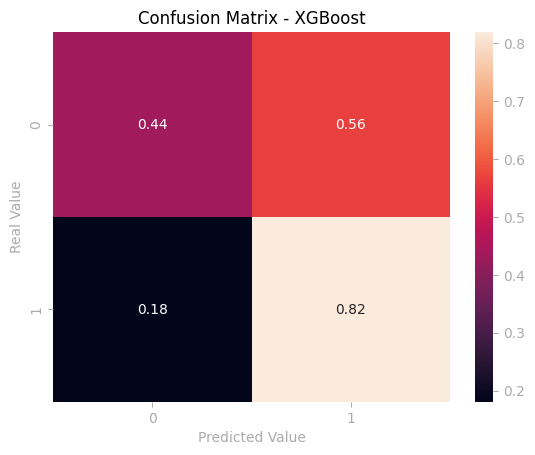

In [61]:
# final XGBoost model
xgb = XGBClassifier(max_depth=3, learning_rate=0.0001, n_estimators=50, gamma=1, min_child_weight=6)
xgb.fit(X_train_rus, y_train_rus)

# prediction
X_test_xgb = scaler.transform(X_test)
y_pred_xgb = xgb.predict(X_test_xgb)

# classification report
print(classification_report(y_test, y_pred_xgb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_xgb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - XGBoost')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

              precision    recall  f1-score   support

           0       0.88      0.76      0.82     22474
           1       0.27      0.47      0.35      4267

    accuracy                           0.71     26741
   macro avg       0.58      0.62      0.58     26741
weighted avg       0.79      0.71      0.74     26741



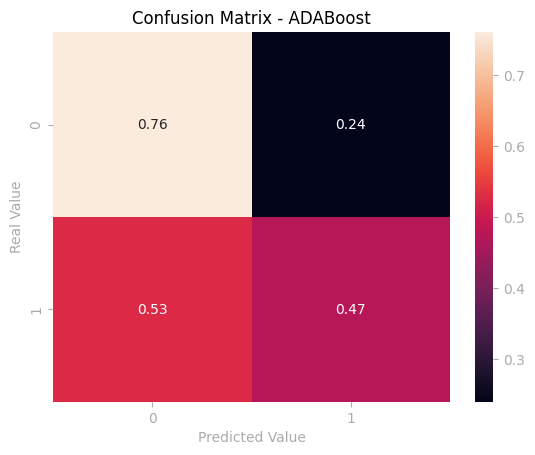

In [62]:
# final ADABOOST model
ada = AdaBoostClassifier(learning_rate=0.01, n_estimators=50)
ada.fit(X_train_rus, y_train_rus)

# prediction
X_test_ada = scaler.transform(X_test)
y_pred_ada = ada.predict(X_test_ada)

# classification report
print(classification_report(y_test, y_pred_ada))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_ada, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - ADABoost')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
              precision    recall  f1-score   support

           0       0.91      0.61      0.73     22474
           1       0.25      0.69      0.37      4267

    accuracy                           0.62     26741
   macro avg       0.58      0.65      0.55     26741
weighted avg       0.81      0.62      0.67     26741



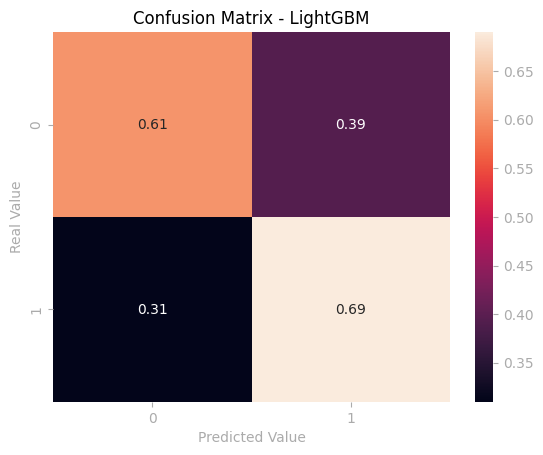

In [63]:
# final LightGBM model
lgb = LGBMClassifier(num_leaves=70, max_depth=5, learning_rate=0.01, min_data_in_leaf=400)
lgb.fit(X_train_rus, y_train_rus)

# prediction
X_test_lgb = scaler.transform(X_test)
y_pred_lgb = lgb.predict(X_test_lgb)

# classification report
print(classification_report(y_test, y_pred_lgb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_lgb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - LightGBM')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

              precision    recall  f1-score   support

           0       0.90      0.66      0.76     22474
           1       0.26      0.63      0.37      4267

    accuracy                           0.65     26741
   macro avg       0.58      0.65      0.57     26741
weighted avg       0.80      0.65      0.70     26741



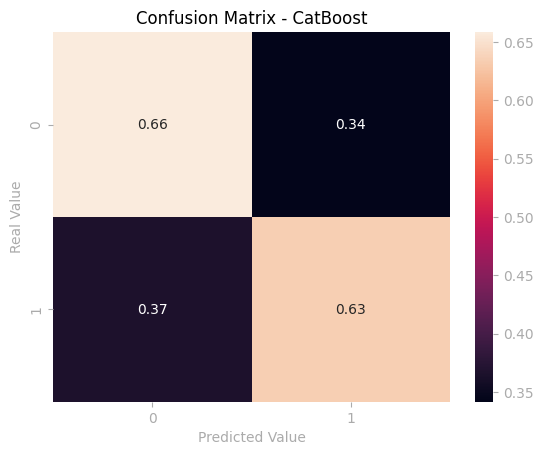

In [64]:
# final CatBoost model
cb = CatBoostClassifier(learning_rate=0.03, depth=6, l2_leaf_reg=5, logging_level='Silent')
cb.fit(X_train_rus, y_train_rus)

# prediction
X_test_cb = scaler.transform(X_test)
y_pred_cb = cb.predict(X_test_cb)

# classification report
print(classification_report(y_test, y_pred_cb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_cb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - CatBoost')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

# F1 Score

In [65]:
# define the function val_model_2
def val_model_2(X, y, clf, show=True):
    """
    Apply cross-validation on the training set.

    # Arguments
        X: DataFrame containing the independent variables.
        y: Series containing the target vector.
        clf: Scikit-learn estimator instance.
        
    # Returns
        float, mean value of the cross-validation scores.
    """
    
    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='f1')

    if show == True:
        print(f'F1-Score: {scores.mean()}, {scores.std()}')
    
    return scores.mean()

In [66]:
#evaluate the models
xgb = XGBClassifier()
lgb = LGBMClassifier()
cb = CatBoostClassifier()
ada = AdaBoostClassifier()

model = []
f1_score=[]

for clf in (xgb, lgb, cb, ada):
    model.append(clf.__class__.__name__)
    f1_score.append(val_model_2(X_train_rus,y_train_rus,clf,show=False))

pd.DataFrame(data=f1_score, index=model, columns=['f1_score'])

Learning rate set to 0.018279
0:	learn: 0.6910762	total: 6.01ms	remaining: 6s
1:	learn: 0.6892526	total: 11.7ms	remaining: 5.84s
2:	learn: 0.6875666	total: 17.5ms	remaining: 5.81s
3:	learn: 0.6854915	total: 23.3ms	remaining: 5.81s
4:	learn: 0.6840986	total: 29ms	remaining: 5.77s
5:	learn: 0.6823527	total: 34.9ms	remaining: 5.78s
6:	learn: 0.6805234	total: 40.4ms	remaining: 5.73s
7:	learn: 0.6790523	total: 46.3ms	remaining: 5.75s
8:	learn: 0.6776781	total: 51.9ms	remaining: 5.71s
9:	learn: 0.6760086	total: 57.4ms	remaining: 5.69s
10:	learn: 0.6742658	total: 63ms	remaining: 5.66s
11:	learn: 0.6728684	total: 68.3ms	remaining: 5.62s
12:	learn: 0.6714810	total: 73.5ms	remaining: 5.58s
13:	learn: 0.6702616	total: 79.2ms	remaining: 5.58s
14:	learn: 0.6688674	total: 84.9ms	remaining: 5.58s
15:	learn: 0.6675254	total: 90.9ms	remaining: 5.59s
16:	learn: 0.6662194	total: 96.8ms	remaining: 5.6s
17:	learn: 0.6649655	total: 103ms	remaining: 5.6s
18:	learn: 0.6636866	total: 109ms	remaining: 5.6s
19:	

192:	learn: 0.5864534	total: 1.2s	remaining: 5.03s
193:	learn: 0.5861914	total: 1.21s	remaining: 5.02s
194:	learn: 0.5858172	total: 1.22s	remaining: 5.02s
195:	learn: 0.5855061	total: 1.22s	remaining: 5.01s
196:	learn: 0.5852648	total: 1.23s	remaining: 5.01s
197:	learn: 0.5850607	total: 1.24s	remaining: 5s
198:	learn: 0.5846711	total: 1.24s	remaining: 5s
199:	learn: 0.5845096	total: 1.25s	remaining: 4.99s
200:	learn: 0.5841316	total: 1.25s	remaining: 4.99s
201:	learn: 0.5838814	total: 1.26s	remaining: 4.98s
202:	learn: 0.5837181	total: 1.27s	remaining: 4.97s
203:	learn: 0.5834602	total: 1.27s	remaining: 4.97s
204:	learn: 0.5831220	total: 1.28s	remaining: 4.96s
205:	learn: 0.5828107	total: 1.29s	remaining: 4.96s
206:	learn: 0.5824717	total: 1.29s	remaining: 4.95s
207:	learn: 0.5823324	total: 1.3s	remaining: 4.95s
208:	learn: 0.5820868	total: 1.3s	remaining: 4.94s
209:	learn: 0.5817257	total: 1.31s	remaining: 4.93s
210:	learn: 0.5813359	total: 1.32s	remaining: 4.93s
211:	learn: 0.5811583

354:	learn: 0.5486043	total: 2.22s	remaining: 4.04s
355:	learn: 0.5484254	total: 2.23s	remaining: 4.03s
356:	learn: 0.5481496	total: 2.23s	remaining: 4.03s
357:	learn: 0.5479461	total: 2.24s	remaining: 4.02s
358:	learn: 0.5476984	total: 2.25s	remaining: 4.01s
359:	learn: 0.5475488	total: 2.25s	remaining: 4.01s
360:	learn: 0.5473136	total: 2.26s	remaining: 4s
361:	learn: 0.5471366	total: 2.27s	remaining: 4s
362:	learn: 0.5468589	total: 2.27s	remaining: 3.99s
363:	learn: 0.5465546	total: 2.28s	remaining: 3.99s
364:	learn: 0.5464203	total: 2.29s	remaining: 3.98s
365:	learn: 0.5462004	total: 2.29s	remaining: 3.98s
366:	learn: 0.5459801	total: 2.3s	remaining: 3.97s
367:	learn: 0.5457762	total: 2.31s	remaining: 3.96s
368:	learn: 0.5455878	total: 2.31s	remaining: 3.96s
369:	learn: 0.5454882	total: 2.32s	remaining: 3.95s
370:	learn: 0.5452722	total: 2.33s	remaining: 3.94s
371:	learn: 0.5450806	total: 2.33s	remaining: 3.94s
372:	learn: 0.5449857	total: 2.34s	remaining: 3.93s
373:	learn: 0.54478

513:	learn: 0.5124824	total: 3.23s	remaining: 3.05s
514:	learn: 0.5123549	total: 3.24s	remaining: 3.05s
515:	learn: 0.5121050	total: 3.24s	remaining: 3.04s
516:	learn: 0.5118687	total: 3.25s	remaining: 3.04s
517:	learn: 0.5116779	total: 3.26s	remaining: 3.03s
518:	learn: 0.5114303	total: 3.26s	remaining: 3.02s
519:	learn: 0.5111623	total: 3.27s	remaining: 3.02s
520:	learn: 0.5109989	total: 3.28s	remaining: 3.01s
521:	learn: 0.5107579	total: 3.28s	remaining: 3.01s
522:	learn: 0.5105031	total: 3.29s	remaining: 3s
523:	learn: 0.5102493	total: 3.3s	remaining: 2.99s
524:	learn: 0.5099834	total: 3.3s	remaining: 2.99s
525:	learn: 0.5097731	total: 3.31s	remaining: 2.98s
526:	learn: 0.5095096	total: 3.32s	remaining: 2.98s
527:	learn: 0.5093299	total: 3.32s	remaining: 2.97s
528:	learn: 0.5091193	total: 3.33s	remaining: 2.96s
529:	learn: 0.5089457	total: 3.33s	remaining: 2.96s
530:	learn: 0.5087160	total: 3.34s	remaining: 2.95s
531:	learn: 0.5084265	total: 3.35s	remaining: 2.94s
532:	learn: 0.508

676:	learn: 0.4712828	total: 4.25s	remaining: 2.03s
677:	learn: 0.4710393	total: 4.26s	remaining: 2.02s
678:	learn: 0.4708819	total: 4.27s	remaining: 2.02s
679:	learn: 0.4704714	total: 4.27s	remaining: 2.01s
680:	learn: 0.4702836	total: 4.28s	remaining: 2s
681:	learn: 0.4700130	total: 4.29s	remaining: 2s
682:	learn: 0.4697652	total: 4.29s	remaining: 1.99s
683:	learn: 0.4695236	total: 4.3s	remaining: 1.99s
684:	learn: 0.4692117	total: 4.31s	remaining: 1.98s
685:	learn: 0.4689116	total: 4.31s	remaining: 1.97s
686:	learn: 0.4687268	total: 4.32s	remaining: 1.97s
687:	learn: 0.4685664	total: 4.32s	remaining: 1.96s
688:	learn: 0.4682522	total: 4.33s	remaining: 1.95s
689:	learn: 0.4680212	total: 4.34s	remaining: 1.95s
690:	learn: 0.4676834	total: 4.34s	remaining: 1.94s
691:	learn: 0.4673775	total: 4.35s	remaining: 1.94s
692:	learn: 0.4671288	total: 4.35s	remaining: 1.93s
693:	learn: 0.4668897	total: 4.36s	remaining: 1.92s
694:	learn: 0.4666064	total: 4.37s	remaining: 1.92s
695:	learn: 0.46636

838:	learn: 0.4335992	total: 5.27s	remaining: 1.01s
839:	learn: 0.4333421	total: 5.28s	remaining: 1s
840:	learn: 0.4331067	total: 5.28s	remaining: 999ms
841:	learn: 0.4329185	total: 5.29s	remaining: 993ms
842:	learn: 0.4326585	total: 5.3s	remaining: 987ms
843:	learn: 0.4324403	total: 5.3s	remaining: 980ms
844:	learn: 0.4322048	total: 5.31s	remaining: 974ms
845:	learn: 0.4320070	total: 5.32s	remaining: 968ms
846:	learn: 0.4317167	total: 5.32s	remaining: 962ms
847:	learn: 0.4314633	total: 5.33s	remaining: 955ms
848:	learn: 0.4312322	total: 5.33s	remaining: 949ms
849:	learn: 0.4310018	total: 5.34s	remaining: 943ms
850:	learn: 0.4308369	total: 5.35s	remaining: 936ms
851:	learn: 0.4305769	total: 5.35s	remaining: 930ms
852:	learn: 0.4303783	total: 5.36s	remaining: 924ms
853:	learn: 0.4300981	total: 5.37s	remaining: 917ms
854:	learn: 0.4298722	total: 5.37s	remaining: 911ms
855:	learn: 0.4296077	total: 5.38s	remaining: 905ms
856:	learn: 0.4294154	total: 5.38s	remaining: 898ms
857:	learn: 0.429

Learning rate set to 0.018279
0:	learn: 0.6913098	total: 5.04ms	remaining: 5.03s
1:	learn: 0.6896861	total: 9.8ms	remaining: 4.89s
2:	learn: 0.6878190	total: 14.7ms	remaining: 4.87s
3:	learn: 0.6861247	total: 19.7ms	remaining: 4.9s
4:	learn: 0.6843786	total: 24.8ms	remaining: 4.94s
5:	learn: 0.6829404	total: 30.1ms	remaining: 4.98s
6:	learn: 0.6812419	total: 35.4ms	remaining: 5.02s
7:	learn: 0.6796330	total: 40.9ms	remaining: 5.07s
8:	learn: 0.6780302	total: 46.7ms	remaining: 5.14s
9:	learn: 0.6765703	total: 52.8ms	remaining: 5.22s
10:	learn: 0.6753605	total: 59ms	remaining: 5.3s
11:	learn: 0.6742776	total: 63.5ms	remaining: 5.23s
12:	learn: 0.6728344	total: 69.1ms	remaining: 5.25s
13:	learn: 0.6715545	total: 75ms	remaining: 5.28s
14:	learn: 0.6703139	total: 80.8ms	remaining: 5.31s
15:	learn: 0.6690010	total: 86.6ms	remaining: 5.33s
16:	learn: 0.6677626	total: 92.4ms	remaining: 5.34s
17:	learn: 0.6665011	total: 98.2ms	remaining: 5.35s
18:	learn: 0.6651179	total: 104ms	remaining: 5.36s


165:	learn: 0.5981266	total: 1s	remaining: 5.04s
166:	learn: 0.5979168	total: 1.01s	remaining: 5.04s
167:	learn: 0.5977268	total: 1.01s	remaining: 5.03s
168:	learn: 0.5975979	total: 1.02s	remaining: 5.02s
169:	learn: 0.5972664	total: 1.03s	remaining: 5.02s
170:	learn: 0.5969804	total: 1.03s	remaining: 5.02s
171:	learn: 0.5966731	total: 1.04s	remaining: 5.01s
172:	learn: 0.5964271	total: 1.05s	remaining: 5.01s
173:	learn: 0.5960851	total: 1.05s	remaining: 5s
174:	learn: 0.5958433	total: 1.06s	remaining: 5s
175:	learn: 0.5954852	total: 1.07s	remaining: 4.99s
176:	learn: 0.5951576	total: 1.07s	remaining: 4.99s
177:	learn: 0.5949268	total: 1.08s	remaining: 4.98s
178:	learn: 0.5946310	total: 1.08s	remaining: 4.98s
179:	learn: 0.5942775	total: 1.09s	remaining: 4.97s
180:	learn: 0.5941011	total: 1.1s	remaining: 4.97s
181:	learn: 0.5938825	total: 1.1s	remaining: 4.96s
182:	learn: 0.5936309	total: 1.11s	remaining: 4.96s
183:	learn: 0.5934652	total: 1.12s	remaining: 4.95s
184:	learn: 0.5932157	t

327:	learn: 0.5583969	total: 2.02s	remaining: 4.14s
328:	learn: 0.5582703	total: 2.02s	remaining: 4.13s
329:	learn: 0.5580527	total: 2.03s	remaining: 4.13s
330:	learn: 0.5579116	total: 2.04s	remaining: 4.12s
331:	learn: 0.5577478	total: 2.04s	remaining: 4.11s
332:	learn: 0.5575278	total: 2.05s	remaining: 4.11s
333:	learn: 0.5573370	total: 2.06s	remaining: 4.1s
334:	learn: 0.5571043	total: 2.06s	remaining: 4.1s
335:	learn: 0.5569430	total: 2.07s	remaining: 4.09s
336:	learn: 0.5566217	total: 2.08s	remaining: 4.08s
337:	learn: 0.5565003	total: 2.08s	remaining: 4.08s
338:	learn: 0.5563331	total: 2.09s	remaining: 4.07s
339:	learn: 0.5560961	total: 2.09s	remaining: 4.07s
340:	learn: 0.5559280	total: 2.1s	remaining: 4.06s
341:	learn: 0.5557431	total: 2.11s	remaining: 4.05s
342:	learn: 0.5555870	total: 2.11s	remaining: 4.05s
343:	learn: 0.5553769	total: 2.12s	remaining: 4.04s
344:	learn: 0.5550750	total: 2.13s	remaining: 4.04s
345:	learn: 0.5548425	total: 2.13s	remaining: 4.03s
346:	learn: 0.5

495:	learn: 0.5221359	total: 3.06s	remaining: 3.11s
496:	learn: 0.5218923	total: 3.07s	remaining: 3.1s
497:	learn: 0.5216611	total: 3.07s	remaining: 3.1s
498:	learn: 0.5214604	total: 3.08s	remaining: 3.09s
499:	learn: 0.5212583	total: 3.09s	remaining: 3.09s
500:	learn: 0.5210834	total: 3.09s	remaining: 3.08s
501:	learn: 0.5208515	total: 3.1s	remaining: 3.08s
502:	learn: 0.5206075	total: 3.11s	remaining: 3.07s
503:	learn: 0.5204630	total: 3.11s	remaining: 3.06s
504:	learn: 0.5203078	total: 3.12s	remaining: 3.06s
505:	learn: 0.5201098	total: 3.13s	remaining: 3.05s
506:	learn: 0.5198568	total: 3.13s	remaining: 3.05s
507:	learn: 0.5196873	total: 3.14s	remaining: 3.04s
508:	learn: 0.5194763	total: 3.15s	remaining: 3.04s
509:	learn: 0.5192853	total: 3.15s	remaining: 3.03s
510:	learn: 0.5190403	total: 3.16s	remaining: 3.02s
511:	learn: 0.5188772	total: 3.16s	remaining: 3.02s
512:	learn: 0.5187546	total: 3.17s	remaining: 3.01s
513:	learn: 0.5185024	total: 3.17s	remaining: 3s
514:	learn: 0.5181

659:	learn: 0.4826290	total: 4.08s	remaining: 2.1s
660:	learn: 0.4822466	total: 4.09s	remaining: 2.1s
661:	learn: 0.4819828	total: 4.1s	remaining: 2.09s
662:	learn: 0.4816710	total: 4.1s	remaining: 2.08s
663:	learn: 0.4814591	total: 4.13s	remaining: 2.09s
664:	learn: 0.4813521	total: 4.14s	remaining: 2.08s
665:	learn: 0.4811289	total: 4.14s	remaining: 2.08s
666:	learn: 0.4808525	total: 4.15s	remaining: 2.07s
667:	learn: 0.4806074	total: 4.16s	remaining: 2.06s
668:	learn: 0.4804073	total: 4.16s	remaining: 2.06s
669:	learn: 0.4801495	total: 4.17s	remaining: 2.05s
670:	learn: 0.4799645	total: 4.17s	remaining: 2.05s
671:	learn: 0.4797873	total: 4.18s	remaining: 2.04s
672:	learn: 0.4796334	total: 4.19s	remaining: 2.03s
673:	learn: 0.4794699	total: 4.19s	remaining: 2.03s
674:	learn: 0.4792173	total: 4.2s	remaining: 2.02s
675:	learn: 0.4788989	total: 4.21s	remaining: 2.02s
676:	learn: 0.4786200	total: 4.21s	remaining: 2.01s
677:	learn: 0.4783696	total: 4.22s	remaining: 2s
678:	learn: 0.478150

819:	learn: 0.4475241	total: 5.1s	remaining: 1.12s
820:	learn: 0.4473136	total: 5.11s	remaining: 1.11s
821:	learn: 0.4469921	total: 5.12s	remaining: 1.11s
822:	learn: 0.4467304	total: 5.12s	remaining: 1.1s
823:	learn: 0.4465493	total: 5.13s	remaining: 1.09s
824:	learn: 0.4463795	total: 5.13s	remaining: 1.09s
825:	learn: 0.4461666	total: 5.14s	remaining: 1.08s
826:	learn: 0.4459573	total: 5.15s	remaining: 1.08s
827:	learn: 0.4458069	total: 5.15s	remaining: 1.07s
828:	learn: 0.4455959	total: 5.16s	remaining: 1.06s
829:	learn: 0.4453595	total: 5.16s	remaining: 1.06s
830:	learn: 0.4452261	total: 5.17s	remaining: 1.05s
831:	learn: 0.4449677	total: 5.18s	remaining: 1.04s
832:	learn: 0.4447584	total: 5.18s	remaining: 1.04s
833:	learn: 0.4445249	total: 5.19s	remaining: 1.03s
834:	learn: 0.4443305	total: 5.2s	remaining: 1.03s
835:	learn: 0.4441697	total: 5.2s	remaining: 1.02s
836:	learn: 0.4439680	total: 5.21s	remaining: 1.01s
837:	learn: 0.4438051	total: 5.21s	remaining: 1.01s
838:	learn: 0.44

981:	learn: 0.4145191	total: 6.14s	remaining: 113ms
982:	learn: 0.4143598	total: 6.15s	remaining: 106ms
983:	learn: 0.4142371	total: 6.16s	remaining: 100ms
984:	learn: 0.4141339	total: 6.17s	remaining: 93.9ms
985:	learn: 0.4139003	total: 6.17s	remaining: 87.6ms
986:	learn: 0.4137183	total: 6.18s	remaining: 81.4ms
987:	learn: 0.4135833	total: 6.18s	remaining: 75.1ms
988:	learn: 0.4134227	total: 6.19s	remaining: 68.9ms
989:	learn: 0.4131871	total: 6.2s	remaining: 62.6ms
990:	learn: 0.4129833	total: 6.2s	remaining: 56.3ms
991:	learn: 0.4127060	total: 6.21s	remaining: 50.1ms
992:	learn: 0.4125472	total: 6.22s	remaining: 43.8ms
993:	learn: 0.4121873	total: 6.22s	remaining: 37.6ms
994:	learn: 0.4119678	total: 6.23s	remaining: 31.3ms
995:	learn: 0.4118290	total: 6.24s	remaining: 25ms
996:	learn: 0.4116617	total: 6.24s	remaining: 18.8ms
997:	learn: 0.4114718	total: 6.25s	remaining: 12.5ms
998:	learn: 0.4113175	total: 6.25s	remaining: 6.26ms
999:	learn: 0.4110860	total: 6.26s	remaining: 0us
Lea

162:	learn: 0.5921856	total: 995ms	remaining: 5.11s
163:	learn: 0.5920019	total: 1s	remaining: 5.1s
164:	learn: 0.5918315	total: 1.01s	remaining: 5.1s
165:	learn: 0.5916055	total: 1.01s	remaining: 5.1s
166:	learn: 0.5913882	total: 1.02s	remaining: 5.09s
167:	learn: 0.5909810	total: 1.03s	remaining: 5.09s
168:	learn: 0.5908011	total: 1.03s	remaining: 5.08s
169:	learn: 0.5904621	total: 1.04s	remaining: 5.08s
170:	learn: 0.5902151	total: 1.05s	remaining: 5.07s
171:	learn: 0.5899753	total: 1.05s	remaining: 5.07s
172:	learn: 0.5897829	total: 1.06s	remaining: 5.06s
173:	learn: 0.5896309	total: 1.06s	remaining: 5.05s
174:	learn: 0.5892328	total: 1.07s	remaining: 5.05s
175:	learn: 0.5889735	total: 1.08s	remaining: 5.04s
176:	learn: 0.5887267	total: 1.08s	remaining: 5.04s
177:	learn: 0.5884967	total: 1.09s	remaining: 5.03s
178:	learn: 0.5882707	total: 1.09s	remaining: 5.03s
179:	learn: 0.5879900	total: 1.1s	remaining: 5.02s
180:	learn: 0.5876577	total: 1.11s	remaining: 5.01s
181:	learn: 0.58733

329:	learn: 0.5515327	total: 2.03s	remaining: 4.13s
330:	learn: 0.5513610	total: 2.04s	remaining: 4.12s
331:	learn: 0.5511852	total: 2.04s	remaining: 4.11s
332:	learn: 0.5510348	total: 2.05s	remaining: 4.11s
333:	learn: 0.5508671	total: 2.06s	remaining: 4.1s
334:	learn: 0.5506551	total: 2.06s	remaining: 4.1s
335:	learn: 0.5503325	total: 2.07s	remaining: 4.09s
336:	learn: 0.5501059	total: 2.08s	remaining: 4.09s
337:	learn: 0.5498518	total: 2.08s	remaining: 4.08s
338:	learn: 0.5496339	total: 2.09s	remaining: 4.08s
339:	learn: 0.5493112	total: 2.1s	remaining: 4.07s
340:	learn: 0.5492083	total: 2.1s	remaining: 4.06s
341:	learn: 0.5489812	total: 2.11s	remaining: 4.06s
342:	learn: 0.5488079	total: 2.12s	remaining: 4.05s
343:	learn: 0.5485791	total: 2.12s	remaining: 4.04s
344:	learn: 0.5482830	total: 2.13s	remaining: 4.04s
345:	learn: 0.5481715	total: 2.13s	remaining: 4.03s
346:	learn: 0.5479118	total: 2.14s	remaining: 4.03s
347:	learn: 0.5477834	total: 2.15s	remaining: 4.02s
348:	learn: 0.54

498:	learn: 0.5136660	total: 3.08s	remaining: 3.1s
499:	learn: 0.5133898	total: 3.09s	remaining: 3.09s
500:	learn: 0.5130289	total: 3.1s	remaining: 3.09s
501:	learn: 0.5128073	total: 3.11s	remaining: 3.08s
502:	learn: 0.5125307	total: 3.11s	remaining: 3.08s
503:	learn: 0.5123948	total: 3.12s	remaining: 3.07s
504:	learn: 0.5121381	total: 3.13s	remaining: 3.06s
505:	learn: 0.5119300	total: 3.13s	remaining: 3.06s
506:	learn: 0.5116474	total: 3.14s	remaining: 3.05s
507:	learn: 0.5113748	total: 3.14s	remaining: 3.04s
508:	learn: 0.5112211	total: 3.15s	remaining: 3.04s
509:	learn: 0.5109581	total: 3.16s	remaining: 3.03s
510:	learn: 0.5106463	total: 3.16s	remaining: 3.03s
511:	learn: 0.5103786	total: 3.17s	remaining: 3.02s
512:	learn: 0.5100678	total: 3.17s	remaining: 3.01s
513:	learn: 0.5098310	total: 3.18s	remaining: 3.01s
514:	learn: 0.5095923	total: 3.19s	remaining: 3s
515:	learn: 0.5093872	total: 3.19s	remaining: 3s
516:	learn: 0.5089770	total: 3.2s	remaining: 2.99s
517:	learn: 0.5087474

660:	learn: 0.4730036	total: 4.11s	remaining: 2.11s
661:	learn: 0.4727471	total: 4.11s	remaining: 2.1s
662:	learn: 0.4724860	total: 4.12s	remaining: 2.1s
663:	learn: 0.4722158	total: 4.13s	remaining: 2.09s
664:	learn: 0.4719695	total: 4.13s	remaining: 2.08s
665:	learn: 0.4717182	total: 4.14s	remaining: 2.08s
666:	learn: 0.4714610	total: 4.15s	remaining: 2.07s
667:	learn: 0.4712705	total: 4.15s	remaining: 2.06s
668:	learn: 0.4711133	total: 4.16s	remaining: 2.06s
669:	learn: 0.4708653	total: 4.17s	remaining: 2.05s
670:	learn: 0.4706006	total: 4.17s	remaining: 2.05s
671:	learn: 0.4704039	total: 4.18s	remaining: 2.04s
672:	learn: 0.4701536	total: 4.18s	remaining: 2.03s
673:	learn: 0.4697634	total: 4.19s	remaining: 2.03s
674:	learn: 0.4695992	total: 4.2s	remaining: 2.02s
675:	learn: 0.4693169	total: 4.2s	remaining: 2.01s
676:	learn: 0.4690980	total: 4.21s	remaining: 2.01s
677:	learn: 0.4689619	total: 4.22s	remaining: 2s
678:	learn: 0.4687212	total: 4.22s	remaining: 2s
679:	learn: 0.4685073	

825:	learn: 0.4352455	total: 5.15s	remaining: 1.08s
826:	learn: 0.4350170	total: 5.16s	remaining: 1.08s
827:	learn: 0.4347848	total: 5.16s	remaining: 1.07s
828:	learn: 0.4344757	total: 5.17s	remaining: 1.07s
829:	learn: 0.4343450	total: 5.18s	remaining: 1.06s
830:	learn: 0.4341416	total: 5.18s	remaining: 1.05s
831:	learn: 0.4339482	total: 5.19s	remaining: 1.05s
832:	learn: 0.4338607	total: 5.2s	remaining: 1.04s
833:	learn: 0.4336915	total: 5.2s	remaining: 1.03s
834:	learn: 0.4334560	total: 5.21s	remaining: 1.03s
835:	learn: 0.4332497	total: 5.21s	remaining: 1.02s
836:	learn: 0.4329716	total: 5.22s	remaining: 1.02s
837:	learn: 0.4327349	total: 5.23s	remaining: 1.01s
838:	learn: 0.4324497	total: 5.23s	remaining: 1s
839:	learn: 0.4322644	total: 5.24s	remaining: 998ms
840:	learn: 0.4320070	total: 5.25s	remaining: 992ms
841:	learn: 0.4317421	total: 5.25s	remaining: 986ms
842:	learn: 0.4314960	total: 5.26s	remaining: 980ms
843:	learn: 0.4312666	total: 5.27s	remaining: 974ms
844:	learn: 0.431

988:	learn: 0.4025992	total: 6.17s	remaining: 68.6ms
989:	learn: 0.4023631	total: 6.17s	remaining: 62.3ms
990:	learn: 0.4021301	total: 6.18s	remaining: 56.1ms
991:	learn: 0.4019278	total: 6.18s	remaining: 49.9ms
992:	learn: 0.4016038	total: 6.19s	remaining: 43.6ms
993:	learn: 0.4014320	total: 6.2s	remaining: 37.4ms
994:	learn: 0.4012524	total: 6.2s	remaining: 31.2ms
995:	learn: 0.4010458	total: 6.21s	remaining: 24.9ms
996:	learn: 0.4009011	total: 6.22s	remaining: 18.7ms
997:	learn: 0.4007297	total: 6.22s	remaining: 12.5ms
998:	learn: 0.4005660	total: 6.23s	remaining: 6.24ms
999:	learn: 0.4004436	total: 6.24s	remaining: 0us
Learning rate set to 0.018281
0:	learn: 0.6909617	total: 5.24ms	remaining: 5.23s
1:	learn: 0.6886877	total: 10ms	remaining: 5s
2:	learn: 0.6867063	total: 15ms	remaining: 4.99s
3:	learn: 0.6845937	total: 20.4ms	remaining: 5.07s
4:	learn: 0.6831524	total: 25.6ms	remaining: 5.1s
5:	learn: 0.6813382	total: 30.9ms	remaining: 5.12s
6:	learn: 0.6797230	total: 36.4ms	remaini

165:	learn: 0.5938851	total: 1.01s	remaining: 5.1s
166:	learn: 0.5935830	total: 1.02s	remaining: 5.09s
167:	learn: 0.5933214	total: 1.03s	remaining: 5.09s
168:	learn: 0.5931279	total: 1.03s	remaining: 5.08s
169:	learn: 0.5927586	total: 1.04s	remaining: 5.08s
170:	learn: 0.5924490	total: 1.05s	remaining: 5.08s
171:	learn: 0.5921014	total: 1.05s	remaining: 5.07s
172:	learn: 0.5918666	total: 1.06s	remaining: 5.07s
173:	learn: 0.5916002	total: 1.06s	remaining: 5.06s
174:	learn: 0.5913722	total: 1.07s	remaining: 5.05s
175:	learn: 0.5911537	total: 1.08s	remaining: 5.04s
176:	learn: 0.5910079	total: 1.08s	remaining: 5.04s
177:	learn: 0.5907660	total: 1.09s	remaining: 5.03s
178:	learn: 0.5905129	total: 1.1s	remaining: 5.03s
179:	learn: 0.5902671	total: 1.1s	remaining: 5.02s
180:	learn: 0.5900749	total: 1.11s	remaining: 5.01s
181:	learn: 0.5898837	total: 1.11s	remaining: 5.01s
182:	learn: 0.5897050	total: 1.12s	remaining: 5s
183:	learn: 0.5894683	total: 1.13s	remaining: 4.99s
184:	learn: 0.5891

326:	learn: 0.5561427	total: 2.04s	remaining: 4.19s
327:	learn: 0.5559718	total: 2.04s	remaining: 4.19s
328:	learn: 0.5557850	total: 2.05s	remaining: 4.18s
329:	learn: 0.5555444	total: 2.06s	remaining: 4.17s
330:	learn: 0.5552704	total: 2.06s	remaining: 4.17s
331:	learn: 0.5550312	total: 2.07s	remaining: 4.16s
332:	learn: 0.5547988	total: 2.08s	remaining: 4.16s
333:	learn: 0.5546543	total: 2.08s	remaining: 4.15s
334:	learn: 0.5544303	total: 2.09s	remaining: 4.14s
335:	learn: 0.5542417	total: 2.09s	remaining: 4.14s
336:	learn: 0.5540787	total: 2.1s	remaining: 4.13s
337:	learn: 0.5537889	total: 2.11s	remaining: 4.13s
338:	learn: 0.5536410	total: 2.11s	remaining: 4.12s
339:	learn: 0.5534070	total: 2.12s	remaining: 4.11s
340:	learn: 0.5532058	total: 2.12s	remaining: 4.11s
341:	learn: 0.5530417	total: 2.13s	remaining: 4.1s
342:	learn: 0.5528424	total: 2.14s	remaining: 4.09s
343:	learn: 0.5525579	total: 2.14s	remaining: 4.09s
344:	learn: 0.5522603	total: 2.15s	remaining: 4.08s
345:	learn: 0.

487:	learn: 0.5209561	total: 3.06s	remaining: 3.21s
488:	learn: 0.5207623	total: 3.06s	remaining: 3.2s
489:	learn: 0.5205565	total: 3.07s	remaining: 3.2s
490:	learn: 0.5202682	total: 3.08s	remaining: 3.19s
491:	learn: 0.5200894	total: 3.08s	remaining: 3.19s
492:	learn: 0.5199379	total: 3.09s	remaining: 3.18s
493:	learn: 0.5197216	total: 3.1s	remaining: 3.17s
494:	learn: 0.5195518	total: 3.1s	remaining: 3.17s
495:	learn: 0.5192248	total: 3.11s	remaining: 3.16s
496:	learn: 0.5189826	total: 3.12s	remaining: 3.16s
497:	learn: 0.5187717	total: 3.12s	remaining: 3.15s
498:	learn: 0.5186061	total: 3.13s	remaining: 3.14s
499:	learn: 0.5183243	total: 3.14s	remaining: 3.14s
500:	learn: 0.5181639	total: 3.14s	remaining: 3.13s
501:	learn: 0.5179724	total: 3.15s	remaining: 3.13s
502:	learn: 0.5176845	total: 3.16s	remaining: 3.12s
503:	learn: 0.5175323	total: 3.16s	remaining: 3.11s
504:	learn: 0.5174135	total: 3.17s	remaining: 3.11s
505:	learn: 0.5172087	total: 3.17s	remaining: 3.1s
506:	learn: 0.516

648:	learn: 0.4807981	total: 4.09s	remaining: 2.21s
649:	learn: 0.4805290	total: 4.1s	remaining: 2.21s
650:	learn: 0.4802581	total: 4.11s	remaining: 2.2s
651:	learn: 0.4799554	total: 4.11s	remaining: 2.2s
652:	learn: 0.4797671	total: 4.12s	remaining: 2.19s
653:	learn: 0.4794119	total: 4.13s	remaining: 2.18s
654:	learn: 0.4790823	total: 4.13s	remaining: 2.18s
655:	learn: 0.4788020	total: 4.14s	remaining: 2.17s
656:	learn: 0.4784910	total: 4.15s	remaining: 2.16s
657:	learn: 0.4782539	total: 4.15s	remaining: 2.16s
658:	learn: 0.4779429	total: 4.16s	remaining: 2.15s
659:	learn: 0.4776637	total: 4.16s	remaining: 2.15s
660:	learn: 0.4773629	total: 4.17s	remaining: 2.14s
661:	learn: 0.4770799	total: 4.18s	remaining: 2.13s
662:	learn: 0.4768781	total: 4.18s	remaining: 2.13s
663:	learn: 0.4765911	total: 4.19s	remaining: 2.12s
664:	learn: 0.4763935	total: 4.19s	remaining: 2.11s
665:	learn: 0.4761019	total: 4.2s	remaining: 2.11s
666:	learn: 0.4758376	total: 4.21s	remaining: 2.1s
667:	learn: 0.475

810:	learn: 0.4442141	total: 5.11s	remaining: 1.19s
811:	learn: 0.4440416	total: 5.12s	remaining: 1.19s
812:	learn: 0.4437786	total: 5.12s	remaining: 1.18s
813:	learn: 0.4434417	total: 5.13s	remaining: 1.17s
814:	learn: 0.4432060	total: 5.14s	remaining: 1.17s
815:	learn: 0.4428752	total: 5.14s	remaining: 1.16s
816:	learn: 0.4426005	total: 5.15s	remaining: 1.15s
817:	learn: 0.4423143	total: 5.16s	remaining: 1.15s
818:	learn: 0.4421077	total: 5.16s	remaining: 1.14s
819:	learn: 0.4419025	total: 5.17s	remaining: 1.13s
820:	learn: 0.4416240	total: 5.17s	remaining: 1.13s
821:	learn: 0.4414140	total: 5.18s	remaining: 1.12s
822:	learn: 0.4412241	total: 5.19s	remaining: 1.11s
823:	learn: 0.4409862	total: 5.19s	remaining: 1.11s
824:	learn: 0.4407653	total: 5.2s	remaining: 1.1s
825:	learn: 0.4405099	total: 5.21s	remaining: 1.1s
826:	learn: 0.4402909	total: 5.21s	remaining: 1.09s
827:	learn: 0.4401769	total: 5.22s	remaining: 1.08s
828:	learn: 0.4398938	total: 5.22s	remaining: 1.08s
829:	learn: 0.4

971:	learn: 0.4093674	total: 6.13s	remaining: 177ms
972:	learn: 0.4092281	total: 6.14s	remaining: 170ms
973:	learn: 0.4090806	total: 6.15s	remaining: 164ms
974:	learn: 0.4089012	total: 6.15s	remaining: 158ms
975:	learn: 0.4086259	total: 6.16s	remaining: 152ms
976:	learn: 0.4085126	total: 6.17s	remaining: 145ms
977:	learn: 0.4082949	total: 6.17s	remaining: 139ms
978:	learn: 0.4081365	total: 6.18s	remaining: 133ms
979:	learn: 0.4079409	total: 6.19s	remaining: 126ms
980:	learn: 0.4077650	total: 6.19s	remaining: 120ms
981:	learn: 0.4074923	total: 6.2s	remaining: 114ms
982:	learn: 0.4073538	total: 6.2s	remaining: 107ms
983:	learn: 0.4072120	total: 6.21s	remaining: 101ms
984:	learn: 0.4070436	total: 6.22s	remaining: 94.7ms
985:	learn: 0.4068508	total: 6.22s	remaining: 88.4ms
986:	learn: 0.4065619	total: 6.23s	remaining: 82ms
987:	learn: 0.4062828	total: 6.24s	remaining: 75.7ms
988:	learn: 0.4061058	total: 6.24s	remaining: 69.4ms
989:	learn: 0.4059221	total: 6.25s	remaining: 63.1ms
990:	learn

161:	learn: 0.5887050	total: 1.01s	remaining: 5.24s
162:	learn: 0.5881768	total: 1.02s	remaining: 5.24s
163:	learn: 0.5879163	total: 1.03s	remaining: 5.23s
164:	learn: 0.5876291	total: 1.03s	remaining: 5.23s
165:	learn: 0.5872703	total: 1.04s	remaining: 5.23s
166:	learn: 0.5868969	total: 1.05s	remaining: 5.22s
167:	learn: 0.5867739	total: 1.05s	remaining: 5.22s
168:	learn: 0.5864661	total: 1.06s	remaining: 5.21s
169:	learn: 0.5862054	total: 1.06s	remaining: 5.2s
170:	learn: 0.5858230	total: 1.07s	remaining: 5.2s
171:	learn: 0.5854441	total: 1.08s	remaining: 5.19s
172:	learn: 0.5850280	total: 1.08s	remaining: 5.18s
173:	learn: 0.5848186	total: 1.09s	remaining: 5.18s
174:	learn: 0.5846120	total: 1.1s	remaining: 5.17s
175:	learn: 0.5842840	total: 1.1s	remaining: 5.16s
176:	learn: 0.5840001	total: 1.11s	remaining: 5.15s
177:	learn: 0.5837383	total: 1.11s	remaining: 5.15s
178:	learn: 0.5836088	total: 1.12s	remaining: 5.14s
179:	learn: 0.5832735	total: 1.13s	remaining: 5.13s
180:	learn: 0.58

347:	learn: 0.5431416	total: 2.22s	remaining: 4.16s
348:	learn: 0.5429013	total: 2.23s	remaining: 4.15s
349:	learn: 0.5427605	total: 2.23s	remaining: 4.15s
350:	learn: 0.5424800	total: 2.24s	remaining: 4.14s
351:	learn: 0.5421870	total: 2.25s	remaining: 4.14s
352:	learn: 0.5419913	total: 2.25s	remaining: 4.13s
353:	learn: 0.5418018	total: 2.26s	remaining: 4.12s
354:	learn: 0.5416172	total: 2.27s	remaining: 4.12s
355:	learn: 0.5413960	total: 2.27s	remaining: 4.11s
356:	learn: 0.5411402	total: 2.28s	remaining: 4.11s
357:	learn: 0.5408718	total: 2.29s	remaining: 4.1s
358:	learn: 0.5406649	total: 2.29s	remaining: 4.09s
359:	learn: 0.5405018	total: 2.3s	remaining: 4.09s
360:	learn: 0.5401523	total: 2.31s	remaining: 4.08s
361:	learn: 0.5399085	total: 2.31s	remaining: 4.07s
362:	learn: 0.5397340	total: 2.32s	remaining: 4.07s
363:	learn: 0.5395582	total: 2.32s	remaining: 4.06s
364:	learn: 0.5394322	total: 2.33s	remaining: 4.05s
365:	learn: 0.5391661	total: 2.34s	remaining: 4.05s
366:	learn: 0.

513:	learn: 0.5046597	total: 3.26s	remaining: 3.08s
514:	learn: 0.5043664	total: 3.27s	remaining: 3.08s
515:	learn: 0.5042290	total: 3.27s	remaining: 3.07s
516:	learn: 0.5038719	total: 3.28s	remaining: 3.06s
517:	learn: 0.5036457	total: 3.29s	remaining: 3.06s
518:	learn: 0.5034175	total: 3.29s	remaining: 3.05s
519:	learn: 0.5030994	total: 3.3s	remaining: 3.04s
520:	learn: 0.5028322	total: 3.31s	remaining: 3.04s
521:	learn: 0.5026228	total: 3.31s	remaining: 3.03s
522:	learn: 0.5023791	total: 3.32s	remaining: 3.03s
523:	learn: 0.5021693	total: 3.32s	remaining: 3.02s
524:	learn: 0.5019804	total: 3.33s	remaining: 3.01s
525:	learn: 0.5018180	total: 3.34s	remaining: 3.01s
526:	learn: 0.5015597	total: 3.34s	remaining: 3s
527:	learn: 0.5013623	total: 3.35s	remaining: 2.99s
528:	learn: 0.5010848	total: 3.36s	remaining: 2.99s
529:	learn: 0.5007014	total: 3.36s	remaining: 2.98s
530:	learn: 0.5004619	total: 3.37s	remaining: 2.98s
531:	learn: 0.5001763	total: 3.37s	remaining: 2.97s
532:	learn: 0.49

681:	learn: 0.4632324	total: 4.3s	remaining: 2.01s
682:	learn: 0.4630274	total: 4.31s	remaining: 2s
683:	learn: 0.4627027	total: 4.32s	remaining: 1.99s
684:	learn: 0.4624538	total: 4.32s	remaining: 1.99s
685:	learn: 0.4622124	total: 4.33s	remaining: 1.98s
686:	learn: 0.4618573	total: 4.34s	remaining: 1.98s
687:	learn: 0.4617176	total: 4.34s	remaining: 1.97s
688:	learn: 0.4614410	total: 4.35s	remaining: 1.96s
689:	learn: 0.4612190	total: 4.36s	remaining: 1.96s
690:	learn: 0.4609670	total: 4.36s	remaining: 1.95s
691:	learn: 0.4608185	total: 4.37s	remaining: 1.94s
692:	learn: 0.4606261	total: 4.37s	remaining: 1.94s
693:	learn: 0.4603821	total: 4.38s	remaining: 1.93s
694:	learn: 0.4600199	total: 4.39s	remaining: 1.93s
695:	learn: 0.4598257	total: 4.39s	remaining: 1.92s
696:	learn: 0.4595346	total: 4.4s	remaining: 1.91s
697:	learn: 0.4593710	total: 4.4s	remaining: 1.91s
698:	learn: 0.4591528	total: 4.41s	remaining: 1.9s
699:	learn: 0.4588864	total: 4.42s	remaining: 1.89s
700:	learn: 0.45863

843:	learn: 0.4273202	total: 5.33s	remaining: 986ms
844:	learn: 0.4270909	total: 5.34s	remaining: 979ms
845:	learn: 0.4269270	total: 5.34s	remaining: 973ms
846:	learn: 0.4265887	total: 5.35s	remaining: 967ms
847:	learn: 0.4263508	total: 5.36s	remaining: 961ms
848:	learn: 0.4261257	total: 5.37s	remaining: 955ms
849:	learn: 0.4258448	total: 5.37s	remaining: 948ms
850:	learn: 0.4256794	total: 5.38s	remaining: 942ms
851:	learn: 0.4255410	total: 5.39s	remaining: 936ms
852:	learn: 0.4253367	total: 5.39s	remaining: 929ms
853:	learn: 0.4251220	total: 5.4s	remaining: 923ms
854:	learn: 0.4248980	total: 5.41s	remaining: 917ms
855:	learn: 0.4247496	total: 5.41s	remaining: 910ms
856:	learn: 0.4244963	total: 5.42s	remaining: 904ms
857:	learn: 0.4242301	total: 5.42s	remaining: 898ms
858:	learn: 0.4240177	total: 5.43s	remaining: 891ms
859:	learn: 0.4237420	total: 5.44s	remaining: 885ms
860:	learn: 0.4235003	total: 5.44s	remaining: 879ms
861:	learn: 0.4231414	total: 5.45s	remaining: 872ms
862:	learn: 0

,f1_score
XGBClassifier,0.613195
LGBMClassifier,0.628581
CatBoostClassifier,0.644500
AdaBoostClassifier,0.629120


In [67]:
# XGBoost
xgb = XGBClassifier()

# parameter to be searched
param_grid = {'n_estimators': range(0,1000,50)}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="f1", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.6162206153349542 for {'n_estimators': 950}


In [68]:
# XGBoost
xgb = XGBClassifier(n_estimators=50)

# parameter to be searched
param_grid = {'max_depth': [1, 3, 5],
              'min_child_weight': [1, 3, 6]}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="f1", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.6412803506209923 for {'max_depth': 1, 'min_child_weight': 1}


In [69]:
# XGBoost
xgb = XGBClassifier(n_estimators=50, max_depth=3, min_child_weight=6)

# parameter to be searched
param_grid = {'gamma': [0, 1, 5]}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="f1", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.6358799889646721 for {'gamma': 5}


In [70]:
# XGBoost
xgb = XGBClassifier(n_estimators=50, max_depth=3, min_child_weight=6, gamma=1)

# parameter to be searched
param_grid = {'learning_rate': [0.0001, 0.001, 0.01, 0.1]}

# find the best parameter
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring='f1', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.6367968737858938 for {'learning_rate': 0.1}


In [71]:
# ADABOOST
ada = AdaBoostClassifier()

# parameter to be searched
param_grid = {'n_estimators': range(0,1000,50)}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(ada, param_grid, scoring="f1", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.6340817062796912 for {'n_estimators': 100}


In [72]:
# ADABOOST
ada = AdaBoostClassifier(n_estimators=50)

# parameter to be searched
param_grid = {'learning_rate': [0.0001, 0.001, 0.01, 0.1]}

# find the best parameter
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(ada, param_grid, scoring='f1', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.6121390221009274 for {'learning_rate': 0.1}


In [73]:
# LightGBM
lbg = LGBMClassifier(silent=False)

# parameter to be searched
param_grid = {"max_depth": np.arange(5, 75, 10),
              "learning_rate" : [0.001, 0.01, 0.1],
              "num_leaves": np.arange(20, 220, 50),
             }

# find the best parameter            
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(lbg, param_grid, scoring="f1", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

[LightGBM] [Info] Number of positive: 2394, number of negative: 2394
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2956
[LightGBM] [Info] Number of data points in the train set: 4788, number of used features: 121
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best result: 0.6688122484130886 for {'learning_rate': 0.001, 'max_depth': 5, 'num_leaves': 20}


In [74]:
lbg = LGBMClassifier(learning_rate=0.01, max_depth=5, num_leaves=50, silent=False)

# parameter to be searched
param_grid = {'min_data_in_leaf': np.arange(100, 1000, 100)}

# find the best parameter            
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(lbg, param_grid, scoring="f1", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Info] Number of positive: 2394, number of negative: 2394
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2731
[LightGBM] [Info] Number of data points in the train set: 4788, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [75]:
# CatBoost
cb = CatBoostClassifier()

# parameter to be searched
param_grid = {'depth': [6, 8, 10],
              'learning_rate': [0.03, 0.1],
              'l2_leaf_reg': [1, 5, 10],
             }

# find the best parameter            
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(cb, param_grid, scoring="f1", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

0:	learn: 0.6897084	total: 5.06ms	remaining: 5.06s
1:	learn: 0.6860939	total: 9.91ms	remaining: 4.95s
2:	learn: 0.6833164	total: 14.6ms	remaining: 4.85s
3:	learn: 0.6803283	total: 19.4ms	remaining: 4.84s
4:	learn: 0.6776307	total: 24.6ms	remaining: 4.89s
5:	learn: 0.6754398	total: 29.5ms	remaining: 4.89s
6:	learn: 0.6728643	total: 34.8ms	remaining: 4.94s
7:	learn: 0.6702642	total: 40.1ms	remaining: 4.98s
8:	learn: 0.6681654	total: 45.6ms	remaining: 5.02s
9:	learn: 0.6659097	total: 51ms	remaining: 5.05s
10:	learn: 0.6641324	total: 56.6ms	remaining: 5.09s
11:	learn: 0.6623298	total: 62.3ms	remaining: 5.13s
12:	learn: 0.6606949	total: 67.7ms	remaining: 5.14s
13:	learn: 0.6590726	total: 73.2ms	remaining: 5.16s
14:	learn: 0.6570683	total: 78.7ms	remaining: 5.17s
15:	learn: 0.6553886	total: 84.7ms	remaining: 5.21s
16:	learn: 0.6539131	total: 91ms	remaining: 5.26s
17:	learn: 0.6522571	total: 97.3ms	remaining: 5.31s
18:	learn: 0.6508706	total: 103ms	remaining: 5.33s
19:	learn: 0.6491899	total:

189:	learn: 0.5724387	total: 1.23s	remaining: 5.23s
190:	learn: 0.5722232	total: 1.23s	remaining: 5.22s
191:	learn: 0.5718807	total: 1.24s	remaining: 5.22s
192:	learn: 0.5715136	total: 1.25s	remaining: 5.21s
193:	learn: 0.5711987	total: 1.25s	remaining: 5.21s
194:	learn: 0.5709639	total: 1.26s	remaining: 5.2s
195:	learn: 0.5704115	total: 1.27s	remaining: 5.2s
196:	learn: 0.5700626	total: 1.27s	remaining: 5.19s
197:	learn: 0.5697599	total: 1.28s	remaining: 5.18s
198:	learn: 0.5695992	total: 1.29s	remaining: 5.18s
199:	learn: 0.5692301	total: 1.29s	remaining: 5.17s
200:	learn: 0.5688612	total: 1.3s	remaining: 5.16s
201:	learn: 0.5686072	total: 1.3s	remaining: 5.15s
202:	learn: 0.5682451	total: 1.31s	remaining: 5.15s
203:	learn: 0.5680181	total: 1.32s	remaining: 5.14s
204:	learn: 0.5678172	total: 1.32s	remaining: 5.13s
205:	learn: 0.5674651	total: 1.33s	remaining: 5.12s
206:	learn: 0.5668605	total: 1.33s	remaining: 5.12s
207:	learn: 0.5665560	total: 1.34s	remaining: 5.11s
208:	learn: 0.56

378:	learn: 0.5128224	total: 2.46s	remaining: 4.03s
379:	learn: 0.5125858	total: 2.46s	remaining: 4.02s
380:	learn: 0.5123012	total: 2.47s	remaining: 4.02s
381:	learn: 0.5119519	total: 2.48s	remaining: 4.01s
382:	learn: 0.5117752	total: 2.49s	remaining: 4.01s
383:	learn: 0.5114981	total: 2.49s	remaining: 4s
384:	learn: 0.5111699	total: 2.5s	remaining: 3.99s
385:	learn: 0.5108587	total: 2.51s	remaining: 3.99s
386:	learn: 0.5103907	total: 2.51s	remaining: 3.98s
387:	learn: 0.5101650	total: 2.52s	remaining: 3.98s
388:	learn: 0.5098065	total: 2.53s	remaining: 3.97s
389:	learn: 0.5095622	total: 2.54s	remaining: 3.97s
390:	learn: 0.5093183	total: 2.54s	remaining: 3.96s
391:	learn: 0.5090909	total: 2.55s	remaining: 3.95s
392:	learn: 0.5087918	total: 2.56s	remaining: 3.95s
393:	learn: 0.5084706	total: 2.56s	remaining: 3.94s
394:	learn: 0.5081226	total: 2.57s	remaining: 3.93s
395:	learn: 0.5079079	total: 2.57s	remaining: 3.93s
396:	learn: 0.5076259	total: 2.58s	remaining: 3.92s
397:	learn: 0.50

566:	learn: 0.4566162	total: 3.69s	remaining: 2.82s
567:	learn: 0.4564077	total: 3.7s	remaining: 2.81s
568:	learn: 0.4562256	total: 3.71s	remaining: 2.81s
569:	learn: 0.4560340	total: 3.72s	remaining: 2.8s
570:	learn: 0.4557220	total: 3.72s	remaining: 2.8s
571:	learn: 0.4553894	total: 3.73s	remaining: 2.79s
572:	learn: 0.4551310	total: 3.74s	remaining: 2.78s
573:	learn: 0.4547697	total: 3.74s	remaining: 2.78s
574:	learn: 0.4544965	total: 3.75s	remaining: 2.77s
575:	learn: 0.4542047	total: 3.76s	remaining: 2.76s
576:	learn: 0.4538989	total: 3.76s	remaining: 2.76s
577:	learn: 0.4536683	total: 3.77s	remaining: 2.75s
578:	learn: 0.4535178	total: 3.77s	remaining: 2.74s
579:	learn: 0.4532795	total: 3.78s	remaining: 2.74s
580:	learn: 0.4530300	total: 3.79s	remaining: 2.73s
581:	learn: 0.4527336	total: 3.79s	remaining: 2.73s
582:	learn: 0.4524769	total: 3.8s	remaining: 2.72s
583:	learn: 0.4522300	total: 3.81s	remaining: 2.71s
584:	learn: 0.4520187	total: 3.81s	remaining: 2.71s
585:	learn: 0.45

754:	learn: 0.4077993	total: 4.92s	remaining: 1.6s
755:	learn: 0.4075030	total: 4.93s	remaining: 1.59s
756:	learn: 0.4072604	total: 4.94s	remaining: 1.58s
757:	learn: 0.4070395	total: 4.95s	remaining: 1.58s
758:	learn: 0.4067976	total: 4.95s	remaining: 1.57s
759:	learn: 0.4065717	total: 4.96s	remaining: 1.57s
760:	learn: 0.4062529	total: 4.96s	remaining: 1.56s
761:	learn: 0.4059234	total: 4.97s	remaining: 1.55s
762:	learn: 0.4056753	total: 4.98s	remaining: 1.55s
763:	learn: 0.4054087	total: 4.99s	remaining: 1.54s
764:	learn: 0.4051841	total: 4.99s	remaining: 1.53s
765:	learn: 0.4049896	total: 5s	remaining: 1.53s
766:	learn: 0.4047962	total: 5s	remaining: 1.52s
767:	learn: 0.4045728	total: 5.01s	remaining: 1.51s
768:	learn: 0.4044143	total: 5.02s	remaining: 1.51s
769:	learn: 0.4041209	total: 5.02s	remaining: 1.5s
770:	learn: 0.4038327	total: 5.03s	remaining: 1.49s
771:	learn: 0.4036088	total: 5.04s	remaining: 1.49s
772:	learn: 0.4033078	total: 5.04s	remaining: 1.48s
773:	learn: 0.403033

913:	learn: 0.3722614	total: 5.96s	remaining: 561ms
914:	learn: 0.3720977	total: 5.97s	remaining: 554ms
915:	learn: 0.3717800	total: 5.97s	remaining: 548ms
916:	learn: 0.3716129	total: 5.98s	remaining: 541ms
917:	learn: 0.3713395	total: 5.99s	remaining: 535ms
918:	learn: 0.3711729	total: 5.99s	remaining: 528ms
919:	learn: 0.3710279	total: 6s	remaining: 522ms
920:	learn: 0.3708046	total: 6.01s	remaining: 515ms
921:	learn: 0.3703552	total: 6.01s	remaining: 509ms
922:	learn: 0.3700461	total: 6.02s	remaining: 502ms
923:	learn: 0.3697872	total: 6.03s	remaining: 496ms
924:	learn: 0.3696882	total: 6.03s	remaining: 489ms
925:	learn: 0.3694920	total: 6.04s	remaining: 483ms
926:	learn: 0.3692747	total: 6.05s	remaining: 476ms
927:	learn: 0.3690044	total: 6.05s	remaining: 470ms
928:	learn: 0.3687103	total: 6.06s	remaining: 463ms
929:	learn: 0.3685690	total: 6.07s	remaining: 457ms
930:	learn: 0.3683660	total: 6.07s	remaining: 450ms
931:	learn: 0.3681148	total: 6.08s	remaining: 444ms
932:	learn: 0.3

              precision    recall  f1-score   support

           0       0.93      0.44      0.59     22474
           1       0.22      0.82      0.34      4267

    accuracy                           0.50     26741
   macro avg       0.57      0.63      0.47     26741
weighted avg       0.81      0.50      0.55     26741



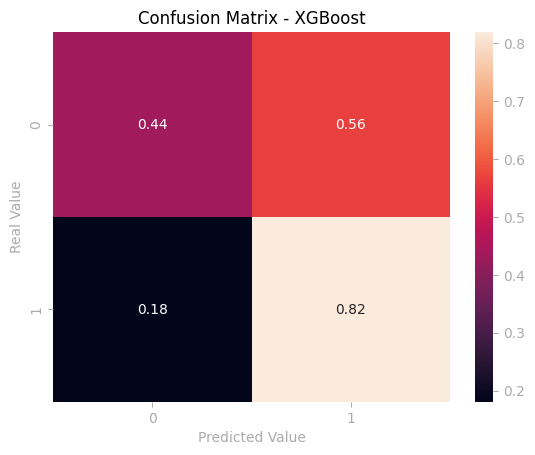

In [76]:
# final XGBoost model
xgb = XGBClassifier(max_depth=3, learning_rate=0.0001, n_estimators=50, gamma=1, min_child_weight=6)
xgb.fit(X_train_rus, y_train_rus)

# prediction
X_test_xgb = scaler.transform(X_test)
y_pred_xgb = xgb.predict(X_test_xgb)

# classification report
print(classification_report(y_test, y_pred_xgb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_xgb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - XGBoost')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

              precision    recall  f1-score   support

           0       0.88      0.76      0.82     22474
           1       0.27      0.47      0.35      4267

    accuracy                           0.71     26741
   macro avg       0.58      0.62      0.58     26741
weighted avg       0.79      0.71      0.74     26741



Text(50.722222222222214, 0.5, 'Real Value')

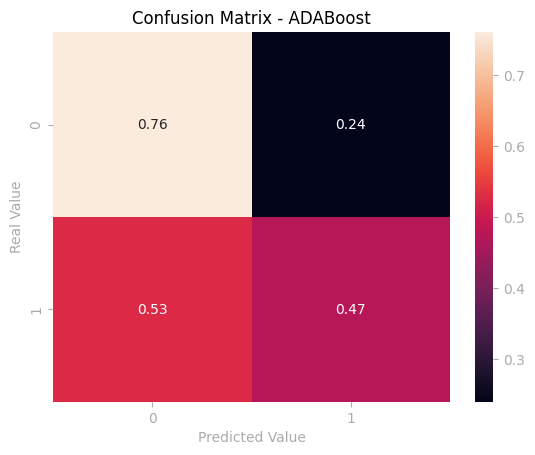

In [77]:

# final ADABOOST model
ada = AdaBoostClassifier(learning_rate=0.01, n_estimators=50)
ada.fit(X_train_rus, y_train_rus)

# prediction
X_test_ada = scaler.transform(X_test)
y_pred_ada = ada.predict(X_test_ada)

# classification report
print(classification_report(y_test, y_pred_ada))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_ada, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - ADABoost')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')


[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
              precision    recall  f1-score   support

           0       0.91      0.61      0.73     22474
           1       0.25      0.69      0.37      4267

    accuracy                           0.62     26741
   macro avg       0.58      0.65      0.55     26741
weighted avg       0.81      0.62      0.67     26741



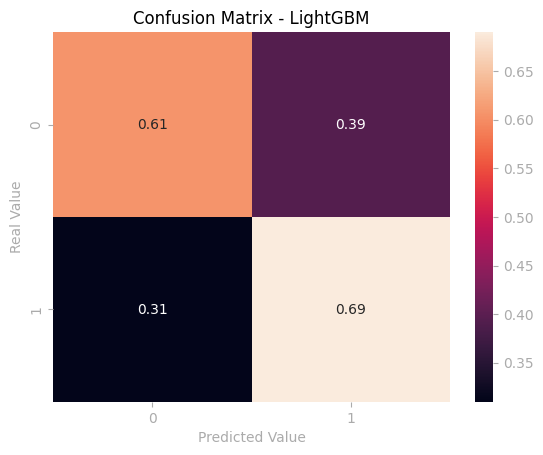

In [78]:
# final LightGBM model
lgb = LGBMClassifier(num_leaves=70, max_depth=5, learning_rate=0.01, min_data_in_leaf=400)
lgb.fit(X_train_rus, y_train_rus)

# prediction
X_test_lgb = scaler.transform(X_test)
y_pred_lgb = lgb.predict(X_test_lgb)

# classification report
print(classification_report(y_test, y_pred_lgb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_lgb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - LightGBM')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

              precision    recall  f1-score   support

           0       0.90      0.66      0.76     22474
           1       0.26      0.63      0.37      4267

    accuracy                           0.65     26741
   macro avg       0.58      0.65      0.57     26741
weighted avg       0.80      0.65      0.70     26741



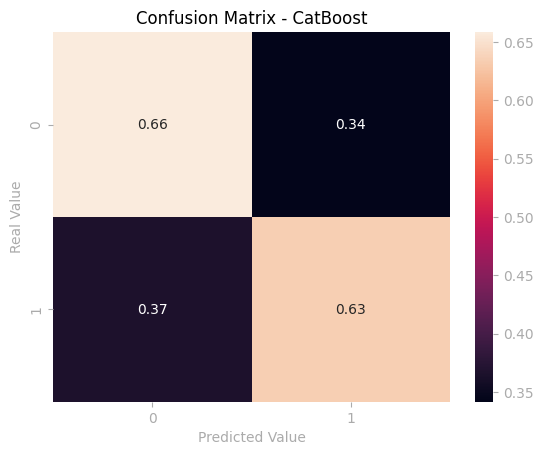

In [79]:
# final CatBoost model
cb = CatBoostClassifier(learning_rate=0.03, depth=6, l2_leaf_reg=5, logging_level='Silent')
cb.fit(X_train_rus, y_train_rus)

# prediction
X_test_cb = scaler.transform(X_test)
y_pred_cb = cb.predict(X_test_cb)

# classification report
print(classification_report(y_test, y_pred_cb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_cb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - CatBoost')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

# DIMENSIONALITY REDUCTION WITH ISOMAP

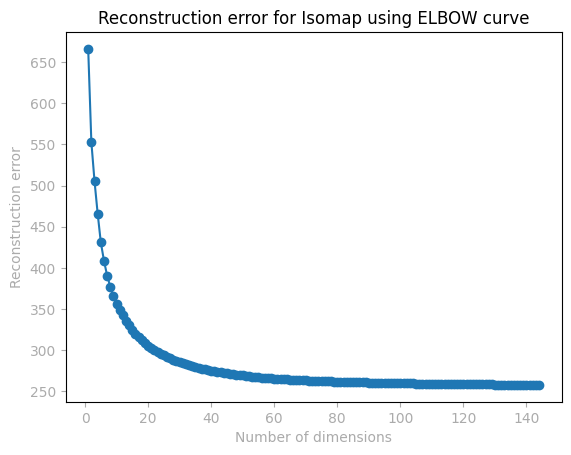

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap

# Load the dataset
digits = load_digits()

# Initialize Isomap model
model = Isomap(n_neighbors=5)

# Fit the model
embedding = model.fit_transform(X_train_rus)

# Compute reconstruction error for different number of dimensions
dimensions = range(1, 145)
errors = []
for n in dimensions:
    model = Isomap(n_neighbors=5, n_components=n)
    embedding = model.fit_transform(X_train_rus)
    error = model.reconstruction_error()
    errors.append(error)

# Plot the reconstruction error curve
plt.plot(dimensions, errors, marker='o')
plt.xlabel('Number of dimensions')
plt.ylabel('Reconstruction error')
plt.title('Reconstruction error for Isomap using ELBOW curve')
plt.show()


In [81]:
X_train_rus.shape

(4788, 143)

In [82]:
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
embedding = Isomap(n_components=25)
X_iso = embedding.fit_transform(X_train_rus[:4788])
X_iso_test = embedding.fit_transform(X_test[:9000])
X_iso_test.shape

(9000, 25)

In [83]:
y_test = y_test[:9000]

### RECALL

In [84]:
# define the function val_model
def val_model_iso(X, y, clf, show=True):
    """
    Apply cross-validation on the training set.

    # Arguments
        X: DataFrame containing the independent variables.
        y: Series containing the target vector.
        clf: Scikit-learn estimator instance.
        
    # Returns
        float, mean value of the cross-validation scores.
    """
    
    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    if show == True:
        print(f'Recall: {scores.mean()}, {scores.std()}')
    
    return scores.mean()

In [85]:
#evaluate the models
xgb_iso = XGBClassifier()
lgb_iso = LGBMClassifier()
cb_iso = CatBoostClassifier()
ada_iso = AdaBoostClassifier()

model = []
recall = []

for clf in (xgb_iso, lgb_iso, cb_iso, ada_iso):
    model.append(clf.__class__.__name__)
    recall.append(val_model_iso(X_iso, y_train_rus, clf, show=False))

pd.DataFrame(data=recall, index=model, columns=['recall'])

Learning rate set to 0.018279
0:	learn: 0.6920919	total: 16.6ms	remaining: 16.6s
1:	learn: 0.6911441	total: 22.1ms	remaining: 11s
2:	learn: 0.6902912	total: 28.1ms	remaining: 9.33s
3:	learn: 0.6893811	total: 34.2ms	remaining: 8.51s
4:	learn: 0.6884221	total: 40.6ms	remaining: 8.08s
5:	learn: 0.6877742	total: 47.3ms	remaining: 7.84s
6:	learn: 0.6869021	total: 54.3ms	remaining: 7.71s
7:	learn: 0.6860043	total: 61.6ms	remaining: 7.63s
8:	learn: 0.6852448	total: 69ms	remaining: 7.59s
9:	learn: 0.6844174	total: 76.1ms	remaining: 7.54s
10:	learn: 0.6836210	total: 83.3ms	remaining: 7.49s
11:	learn: 0.6827956	total: 90.6ms	remaining: 7.46s
12:	learn: 0.6819799	total: 97.6ms	remaining: 7.41s
13:	learn: 0.6812714	total: 105ms	remaining: 7.37s
14:	learn: 0.6805441	total: 112ms	remaining: 7.34s
15:	learn: 0.6798606	total: 119ms	remaining: 7.34s
16:	learn: 0.6790380	total: 127ms	remaining: 7.32s
17:	learn: 0.6783594	total: 134ms	remaining: 7.32s
18:	learn: 0.6777153	total: 142ms	remaining: 7.31s
19

182:	learn: 0.6141462	total: 1.42s	remaining: 6.33s
183:	learn: 0.6137504	total: 1.43s	remaining: 6.33s
184:	learn: 0.6134075	total: 1.44s	remaining: 6.33s
185:	learn: 0.6131348	total: 1.44s	remaining: 6.32s
186:	learn: 0.6128801	total: 1.45s	remaining: 6.31s
187:	learn: 0.6127169	total: 1.46s	remaining: 6.3s
188:	learn: 0.6125419	total: 1.47s	remaining: 6.29s
189:	learn: 0.6123009	total: 1.47s	remaining: 6.28s
190:	learn: 0.6120020	total: 1.48s	remaining: 6.27s
191:	learn: 0.6117886	total: 1.49s	remaining: 6.26s
192:	learn: 0.6116268	total: 1.5s	remaining: 6.25s
193:	learn: 0.6114423	total: 1.5s	remaining: 6.25s
194:	learn: 0.6111442	total: 1.51s	remaining: 6.24s
195:	learn: 0.6108519	total: 1.52s	remaining: 6.23s
196:	learn: 0.6106451	total: 1.53s	remaining: 6.22s
197:	learn: 0.6104616	total: 1.53s	remaining: 6.21s
198:	learn: 0.6102428	total: 1.54s	remaining: 6.2s
199:	learn: 0.6100523	total: 1.55s	remaining: 6.2s
200:	learn: 0.6098632	total: 1.56s	remaining: 6.19s
201:	learn: 0.609

347:	learn: 0.5747047	total: 2.66s	remaining: 4.98s
348:	learn: 0.5745341	total: 2.66s	remaining: 4.97s
349:	learn: 0.5742866	total: 2.67s	remaining: 4.96s
350:	learn: 0.5739895	total: 2.68s	remaining: 4.96s
351:	learn: 0.5735871	total: 2.69s	remaining: 4.95s
352:	learn: 0.5734159	total: 2.69s	remaining: 4.94s
353:	learn: 0.5731796	total: 2.7s	remaining: 4.93s
354:	learn: 0.5729292	total: 2.71s	remaining: 4.92s
355:	learn: 0.5727055	total: 2.72s	remaining: 4.92s
356:	learn: 0.5725471	total: 2.72s	remaining: 4.91s
357:	learn: 0.5723039	total: 2.73s	remaining: 4.9s
358:	learn: 0.5721695	total: 2.74s	remaining: 4.89s
359:	learn: 0.5719742	total: 2.75s	remaining: 4.88s
360:	learn: 0.5717976	total: 2.75s	remaining: 4.87s
361:	learn: 0.5715480	total: 2.76s	remaining: 4.87s
362:	learn: 0.5712754	total: 2.77s	remaining: 4.86s
363:	learn: 0.5710752	total: 2.77s	remaining: 4.85s
364:	learn: 0.5707646	total: 2.78s	remaining: 4.84s
365:	learn: 0.5706051	total: 2.79s	remaining: 4.83s
366:	learn: 0.

515:	learn: 0.5389826	total: 3.9s	remaining: 3.65s
516:	learn: 0.5387486	total: 3.9s	remaining: 3.65s
517:	learn: 0.5384728	total: 3.91s	remaining: 3.64s
518:	learn: 0.5382681	total: 3.92s	remaining: 3.63s
519:	learn: 0.5380567	total: 3.93s	remaining: 3.63s
520:	learn: 0.5379004	total: 3.94s	remaining: 3.62s
521:	learn: 0.5377307	total: 3.94s	remaining: 3.61s
522:	learn: 0.5373953	total: 3.95s	remaining: 3.6s
523:	learn: 0.5372190	total: 3.96s	remaining: 3.6s
524:	learn: 0.5368840	total: 3.97s	remaining: 3.59s
525:	learn: 0.5366650	total: 3.97s	remaining: 3.58s
526:	learn: 0.5365180	total: 3.98s	remaining: 3.57s
527:	learn: 0.5363630	total: 3.99s	remaining: 3.57s
528:	learn: 0.5362221	total: 4s	remaining: 3.56s
529:	learn: 0.5360493	total: 4s	remaining: 3.55s
530:	learn: 0.5358145	total: 4.01s	remaining: 3.54s
531:	learn: 0.5357022	total: 4.02s	remaining: 3.53s
532:	learn: 0.5354853	total: 4.03s	remaining: 3.53s
533:	learn: 0.5353272	total: 4.03s	remaining: 3.52s
534:	learn: 0.5349759	

680:	learn: 0.5017107	total: 5.12s	remaining: 2.4s
681:	learn: 0.5015823	total: 5.13s	remaining: 2.39s
682:	learn: 0.5013884	total: 5.14s	remaining: 2.39s
683:	learn: 0.5011564	total: 5.15s	remaining: 2.38s
684:	learn: 0.5009029	total: 5.16s	remaining: 2.37s
685:	learn: 0.5006893	total: 5.16s	remaining: 2.36s
686:	learn: 0.5005231	total: 5.17s	remaining: 2.36s
687:	learn: 0.5003567	total: 5.18s	remaining: 2.35s
688:	learn: 0.5001936	total: 5.19s	remaining: 2.34s
689:	learn: 0.4999431	total: 5.2s	remaining: 2.33s
690:	learn: 0.4997678	total: 5.2s	remaining: 2.33s
691:	learn: 0.4995791	total: 5.21s	remaining: 2.32s
692:	learn: 0.4993624	total: 5.22s	remaining: 2.31s
693:	learn: 0.4991415	total: 5.22s	remaining: 2.3s
694:	learn: 0.4988866	total: 5.23s	remaining: 2.3s
695:	learn: 0.4987151	total: 5.24s	remaining: 2.29s
696:	learn: 0.4985704	total: 5.25s	remaining: 2.28s
697:	learn: 0.4982895	total: 5.25s	remaining: 2.27s
698:	learn: 0.4981117	total: 5.26s	remaining: 2.27s
699:	learn: 0.497

843:	learn: 0.4673745	total: 6.35s	remaining: 1.17s
844:	learn: 0.4671979	total: 6.36s	remaining: 1.17s
845:	learn: 0.4670232	total: 6.37s	remaining: 1.16s
846:	learn: 0.4667369	total: 6.37s	remaining: 1.15s
847:	learn: 0.4664975	total: 6.38s	remaining: 1.14s
848:	learn: 0.4663377	total: 6.39s	remaining: 1.14s
849:	learn: 0.4661627	total: 6.4s	remaining: 1.13s
850:	learn: 0.4660285	total: 6.4s	remaining: 1.12s
851:	learn: 0.4658617	total: 6.41s	remaining: 1.11s
852:	learn: 0.4656407	total: 6.42s	remaining: 1.11s
853:	learn: 0.4654520	total: 6.43s	remaining: 1.1s
854:	learn: 0.4652499	total: 6.43s	remaining: 1.09s
855:	learn: 0.4651084	total: 6.44s	remaining: 1.08s
856:	learn: 0.4648990	total: 6.45s	remaining: 1.08s
857:	learn: 0.4646787	total: 6.46s	remaining: 1.07s
858:	learn: 0.4645636	total: 6.46s	remaining: 1.06s
859:	learn: 0.4643866	total: 6.47s	remaining: 1.05s
860:	learn: 0.4642336	total: 6.48s	remaining: 1.04s
861:	learn: 0.4640625	total: 6.49s	remaining: 1.04s
862:	learn: 0.4

27:	learn: 0.6724790	total: 198ms	remaining: 6.89s
28:	learn: 0.6719694	total: 206ms	remaining: 6.91s
29:	learn: 0.6713944	total: 214ms	remaining: 6.92s
30:	learn: 0.6709277	total: 222ms	remaining: 6.92s
31:	learn: 0.6703906	total: 229ms	remaining: 6.93s
32:	learn: 0.6699416	total: 236ms	remaining: 6.91s
33:	learn: 0.6693870	total: 243ms	remaining: 6.89s
34:	learn: 0.6689013	total: 250ms	remaining: 6.88s
35:	learn: 0.6683563	total: 257ms	remaining: 6.87s
36:	learn: 0.6678553	total: 263ms	remaining: 6.86s
37:	learn: 0.6672353	total: 270ms	remaining: 6.84s
38:	learn: 0.6667665	total: 277ms	remaining: 6.83s
39:	learn: 0.6661959	total: 284ms	remaining: 6.83s
40:	learn: 0.6657522	total: 292ms	remaining: 6.82s
41:	learn: 0.6652376	total: 299ms	remaining: 6.82s
42:	learn: 0.6648324	total: 306ms	remaining: 6.81s
43:	learn: 0.6643739	total: 313ms	remaining: 6.81s
44:	learn: 0.6638153	total: 321ms	remaining: 6.81s
45:	learn: 0.6632609	total: 328ms	remaining: 6.81s
46:	learn: 0.6628581	total: 335

196:	learn: 0.6155385	total: 1.43s	remaining: 5.81s
197:	learn: 0.6152401	total: 1.43s	remaining: 5.8s
198:	learn: 0.6149623	total: 1.44s	remaining: 5.8s
199:	learn: 0.6147647	total: 1.45s	remaining: 5.8s
200:	learn: 0.6145335	total: 1.46s	remaining: 5.79s
201:	learn: 0.6142274	total: 1.46s	remaining: 5.78s
202:	learn: 0.6139848	total: 1.47s	remaining: 5.78s
203:	learn: 0.6136573	total: 1.48s	remaining: 5.77s
204:	learn: 0.6133292	total: 1.49s	remaining: 5.76s
205:	learn: 0.6130773	total: 1.49s	remaining: 5.75s
206:	learn: 0.6128153	total: 1.5s	remaining: 5.75s
207:	learn: 0.6126164	total: 1.51s	remaining: 5.74s
208:	learn: 0.6123983	total: 1.51s	remaining: 5.73s
209:	learn: 0.6121687	total: 1.52s	remaining: 5.73s
210:	learn: 0.6119235	total: 1.53s	remaining: 5.72s
211:	learn: 0.6116515	total: 1.54s	remaining: 5.71s
212:	learn: 0.6114387	total: 1.54s	remaining: 5.71s
213:	learn: 0.6111706	total: 1.55s	remaining: 5.7s
214:	learn: 0.6109488	total: 1.56s	remaining: 5.69s
215:	learn: 0.610

360:	learn: 0.5781422	total: 2.66s	remaining: 4.71s
361:	learn: 0.5777562	total: 2.67s	remaining: 4.71s
362:	learn: 0.5774974	total: 2.68s	remaining: 4.7s
363:	learn: 0.5773070	total: 2.69s	remaining: 4.7s
364:	learn: 0.5771764	total: 2.69s	remaining: 4.69s
365:	learn: 0.5770833	total: 2.7s	remaining: 4.68s
366:	learn: 0.5768365	total: 2.71s	remaining: 4.67s
367:	learn: 0.5766467	total: 2.72s	remaining: 4.67s
368:	learn: 0.5765029	total: 2.72s	remaining: 4.66s
369:	learn: 0.5763185	total: 2.73s	remaining: 4.65s
370:	learn: 0.5760060	total: 2.74s	remaining: 4.65s
371:	learn: 0.5758537	total: 2.75s	remaining: 4.64s
372:	learn: 0.5756979	total: 2.75s	remaining: 4.63s
373:	learn: 0.5755080	total: 2.76s	remaining: 4.62s
374:	learn: 0.5753078	total: 2.77s	remaining: 4.62s
375:	learn: 0.5750609	total: 2.78s	remaining: 4.61s
376:	learn: 0.5748376	total: 2.79s	remaining: 4.6s
377:	learn: 0.5746381	total: 2.79s	remaining: 4.59s
378:	learn: 0.5743900	total: 2.8s	remaining: 4.59s
379:	learn: 0.574

529:	learn: 0.5429361	total: 3.91s	remaining: 3.47s
530:	learn: 0.5425966	total: 3.92s	remaining: 3.46s
531:	learn: 0.5422965	total: 3.93s	remaining: 3.46s
532:	learn: 0.5421476	total: 3.94s	remaining: 3.45s
533:	learn: 0.5419827	total: 3.94s	remaining: 3.44s
534:	learn: 0.5417658	total: 3.95s	remaining: 3.43s
535:	learn: 0.5415001	total: 3.96s	remaining: 3.42s
536:	learn: 0.5413308	total: 3.96s	remaining: 3.42s
537:	learn: 0.5410876	total: 3.97s	remaining: 3.41s
538:	learn: 0.5408949	total: 3.98s	remaining: 3.4s
539:	learn: 0.5407558	total: 3.99s	remaining: 3.4s
540:	learn: 0.5405883	total: 3.99s	remaining: 3.39s
541:	learn: 0.5402982	total: 4s	remaining: 3.38s
542:	learn: 0.5400813	total: 4.01s	remaining: 3.37s
543:	learn: 0.5398671	total: 4.02s	remaining: 3.37s
544:	learn: 0.5396498	total: 4.02s	remaining: 3.36s
545:	learn: 0.5393638	total: 4.03s	remaining: 3.35s
546:	learn: 0.5391546	total: 4.04s	remaining: 3.34s
547:	learn: 0.5389585	total: 4.04s	remaining: 3.34s
548:	learn: 0.538

693:	learn: 0.5069612	total: 5.16s	remaining: 2.28s
694:	learn: 0.5067098	total: 5.17s	remaining: 2.27s
695:	learn: 0.5065868	total: 5.18s	remaining: 2.26s
696:	learn: 0.5064556	total: 5.19s	remaining: 2.26s
697:	learn: 0.5063332	total: 5.2s	remaining: 2.25s
698:	learn: 0.5061706	total: 5.21s	remaining: 2.24s
699:	learn: 0.5058992	total: 5.21s	remaining: 2.23s
700:	learn: 0.5056502	total: 5.22s	remaining: 2.23s
701:	learn: 0.5053252	total: 5.23s	remaining: 2.22s
702:	learn: 0.5051448	total: 5.23s	remaining: 2.21s
703:	learn: 0.5049420	total: 5.24s	remaining: 2.2s
704:	learn: 0.5046726	total: 5.25s	remaining: 2.19s
705:	learn: 0.5043822	total: 5.25s	remaining: 2.19s
706:	learn: 0.5040636	total: 5.26s	remaining: 2.18s
707:	learn: 0.5038987	total: 5.27s	remaining: 2.17s
708:	learn: 0.5037144	total: 5.28s	remaining: 2.17s
709:	learn: 0.5034719	total: 5.28s	remaining: 2.16s
710:	learn: 0.5032942	total: 5.29s	remaining: 2.15s
711:	learn: 0.5029840	total: 5.29s	remaining: 2.14s
712:	learn: 0.

860:	learn: 0.4731075	total: 6.39s	remaining: 1.03s
861:	learn: 0.4729489	total: 6.4s	remaining: 1.02s
862:	learn: 0.4728056	total: 6.41s	remaining: 1.02s
863:	learn: 0.4726655	total: 6.42s	remaining: 1.01s
864:	learn: 0.4724389	total: 6.42s	remaining: 1s
865:	learn: 0.4721865	total: 6.43s	remaining: 995ms
866:	learn: 0.4719569	total: 6.44s	remaining: 988ms
867:	learn: 0.4716783	total: 6.45s	remaining: 980ms
868:	learn: 0.4715246	total: 6.45s	remaining: 973ms
869:	learn: 0.4712782	total: 6.46s	remaining: 965ms
870:	learn: 0.4711548	total: 6.47s	remaining: 958ms
871:	learn: 0.4709539	total: 6.47s	remaining: 950ms
872:	learn: 0.4707471	total: 6.48s	remaining: 943ms
873:	learn: 0.4705118	total: 6.49s	remaining: 935ms
874:	learn: 0.4703406	total: 6.5s	remaining: 928ms
875:	learn: 0.4702260	total: 6.5s	remaining: 920ms
876:	learn: 0.4700026	total: 6.51s	remaining: 913ms
877:	learn: 0.4697531	total: 6.52s	remaining: 905ms
878:	learn: 0.4696157	total: 6.52s	remaining: 898ms
879:	learn: 0.4694

26:	learn: 0.6721297	total: 194ms	remaining: 6.98s
27:	learn: 0.6715493	total: 203ms	remaining: 7.04s
28:	learn: 0.6708487	total: 211ms	remaining: 7.06s
29:	learn: 0.6702602	total: 220ms	remaining: 7.11s
30:	learn: 0.6696854	total: 227ms	remaining: 7.1s
31:	learn: 0.6690895	total: 236ms	remaining: 7.13s
32:	learn: 0.6684021	total: 243ms	remaining: 7.12s
33:	learn: 0.6678272	total: 253ms	remaining: 7.2s
34:	learn: 0.6673291	total: 260ms	remaining: 7.18s
35:	learn: 0.6667113	total: 268ms	remaining: 7.17s
36:	learn: 0.6661443	total: 275ms	remaining: 7.15s
37:	learn: 0.6655059	total: 282ms	remaining: 7.14s
38:	learn: 0.6649666	total: 289ms	remaining: 7.11s
39:	learn: 0.6643744	total: 296ms	remaining: 7.1s
40:	learn: 0.6638789	total: 303ms	remaining: 7.09s
41:	learn: 0.6634313	total: 310ms	remaining: 7.08s
42:	learn: 0.6626987	total: 317ms	remaining: 7.07s
43:	learn: 0.6622013	total: 324ms	remaining: 7.04s
44:	learn: 0.6617002	total: 331ms	remaining: 7.03s
45:	learn: 0.6611967	total: 338ms	

188:	learn: 0.6125108	total: 1.41s	remaining: 6.06s
189:	learn: 0.6122565	total: 1.42s	remaining: 6.06s
190:	learn: 0.6119804	total: 1.43s	remaining: 6.05s
191:	learn: 0.6115658	total: 1.44s	remaining: 6.05s
192:	learn: 0.6112563	total: 1.45s	remaining: 6.05s
193:	learn: 0.6108890	total: 1.45s	remaining: 6.04s
194:	learn: 0.6105510	total: 1.46s	remaining: 6.03s
195:	learn: 0.6102194	total: 1.47s	remaining: 6.02s
196:	learn: 0.6100457	total: 1.48s	remaining: 6.02s
197:	learn: 0.6097125	total: 1.48s	remaining: 6.01s
198:	learn: 0.6094901	total: 1.49s	remaining: 6s
199:	learn: 0.6092954	total: 1.5s	remaining: 5.99s
200:	learn: 0.6090377	total: 1.5s	remaining: 5.98s
201:	learn: 0.6088054	total: 1.51s	remaining: 5.97s
202:	learn: 0.6086074	total: 1.52s	remaining: 5.96s
203:	learn: 0.6083587	total: 1.53s	remaining: 5.96s
204:	learn: 0.6080764	total: 1.53s	remaining: 5.95s
205:	learn: 0.6077798	total: 1.54s	remaining: 5.94s
206:	learn: 0.6074955	total: 1.55s	remaining: 5.93s
207:	learn: 0.607

356:	learn: 0.5732437	total: 2.65s	remaining: 4.77s
357:	learn: 0.5730910	total: 2.66s	remaining: 4.76s
358:	learn: 0.5729291	total: 2.66s	remaining: 4.76s
359:	learn: 0.5726960	total: 2.67s	remaining: 4.75s
360:	learn: 0.5725218	total: 2.68s	remaining: 4.74s
361:	learn: 0.5722938	total: 2.69s	remaining: 4.74s
362:	learn: 0.5720537	total: 2.69s	remaining: 4.73s
363:	learn: 0.5717841	total: 2.7s	remaining: 4.72s
364:	learn: 0.5715706	total: 2.71s	remaining: 4.71s
365:	learn: 0.5714671	total: 2.72s	remaining: 4.71s
366:	learn: 0.5712857	total: 2.72s	remaining: 4.7s
367:	learn: 0.5710346	total: 2.73s	remaining: 4.69s
368:	learn: 0.5708562	total: 2.74s	remaining: 4.68s
369:	learn: 0.5706919	total: 2.75s	remaining: 4.67s
370:	learn: 0.5704840	total: 2.75s	remaining: 4.67s
371:	learn: 0.5701918	total: 2.76s	remaining: 4.66s
372:	learn: 0.5699361	total: 2.77s	remaining: 4.65s
373:	learn: 0.5697663	total: 2.77s	remaining: 4.64s
374:	learn: 0.5695316	total: 2.78s	remaining: 4.63s
375:	learn: 0.

523:	learn: 0.5388087	total: 3.87s	remaining: 3.52s
524:	learn: 0.5385103	total: 3.88s	remaining: 3.51s
525:	learn: 0.5382457	total: 3.88s	remaining: 3.5s
526:	learn: 0.5379668	total: 3.89s	remaining: 3.49s
527:	learn: 0.5378096	total: 3.9s	remaining: 3.49s
528:	learn: 0.5375522	total: 3.91s	remaining: 3.48s
529:	learn: 0.5374053	total: 3.91s	remaining: 3.47s
530:	learn: 0.5372168	total: 3.92s	remaining: 3.46s
531:	learn: 0.5370073	total: 3.93s	remaining: 3.46s
532:	learn: 0.5369053	total: 3.94s	remaining: 3.45s
533:	learn: 0.5367373	total: 3.94s	remaining: 3.44s
534:	learn: 0.5365718	total: 3.95s	remaining: 3.43s
535:	learn: 0.5363061	total: 3.96s	remaining: 3.43s
536:	learn: 0.5359620	total: 3.96s	remaining: 3.42s
537:	learn: 0.5357415	total: 3.97s	remaining: 3.41s
538:	learn: 0.5355637	total: 3.98s	remaining: 3.4s
539:	learn: 0.5352905	total: 3.99s	remaining: 3.4s
540:	learn: 0.5351345	total: 4s	remaining: 3.39s
541:	learn: 0.5349139	total: 4s	remaining: 3.38s
542:	learn: 0.5346623	

692:	learn: 0.5005049	total: 5.12s	remaining: 2.27s
693:	learn: 0.5002960	total: 5.13s	remaining: 2.26s
694:	learn: 0.5001316	total: 5.14s	remaining: 2.25s
695:	learn: 0.4999846	total: 5.14s	remaining: 2.25s
696:	learn: 0.4998931	total: 5.15s	remaining: 2.24s
697:	learn: 0.4997250	total: 5.16s	remaining: 2.23s
698:	learn: 0.4995658	total: 5.17s	remaining: 2.23s
699:	learn: 0.4993620	total: 5.18s	remaining: 2.22s
700:	learn: 0.4990574	total: 5.18s	remaining: 2.21s
701:	learn: 0.4988708	total: 5.19s	remaining: 2.2s
702:	learn: 0.4986962	total: 5.2s	remaining: 2.2s
703:	learn: 0.4985158	total: 5.21s	remaining: 2.19s
704:	learn: 0.4982510	total: 5.21s	remaining: 2.18s
705:	learn: 0.4980355	total: 5.22s	remaining: 2.17s
706:	learn: 0.4978573	total: 5.23s	remaining: 2.17s
707:	learn: 0.4977255	total: 5.24s	remaining: 2.16s
708:	learn: 0.4975001	total: 5.25s	remaining: 2.15s
709:	learn: 0.4973319	total: 5.25s	remaining: 2.15s
710:	learn: 0.4971585	total: 5.26s	remaining: 2.14s
711:	learn: 0.4

853:	learn: 0.4690474	total: 6.34s	remaining: 1.08s
854:	learn: 0.4688791	total: 6.35s	remaining: 1.08s
855:	learn: 0.4686792	total: 6.36s	remaining: 1.07s
856:	learn: 0.4684883	total: 6.37s	remaining: 1.06s
857:	learn: 0.4683176	total: 6.37s	remaining: 1.05s
858:	learn: 0.4680198	total: 6.38s	remaining: 1.05s
859:	learn: 0.4678858	total: 6.39s	remaining: 1.04s
860:	learn: 0.4676422	total: 6.4s	remaining: 1.03s
861:	learn: 0.4674744	total: 6.4s	remaining: 1.02s
862:	learn: 0.4673175	total: 6.41s	remaining: 1.02s
863:	learn: 0.4670311	total: 6.42s	remaining: 1.01s
864:	learn: 0.4668449	total: 6.42s	remaining: 1s
865:	learn: 0.4666387	total: 6.43s	remaining: 995ms
866:	learn: 0.4665111	total: 6.44s	remaining: 988ms
867:	learn: 0.4663185	total: 6.45s	remaining: 980ms
868:	learn: 0.4661546	total: 6.45s	remaining: 973ms
869:	learn: 0.4659168	total: 6.46s	remaining: 965ms
870:	learn: 0.4657311	total: 6.47s	remaining: 958ms
871:	learn: 0.4654648	total: 6.47s	remaining: 950ms
872:	learn: 0.465

34:	learn: 0.6666905	total: 244ms	remaining: 6.72s
35:	learn: 0.6662663	total: 252ms	remaining: 6.74s
36:	learn: 0.6655664	total: 260ms	remaining: 6.75s
37:	learn: 0.6650827	total: 268ms	remaining: 6.78s
38:	learn: 0.6646390	total: 276ms	remaining: 6.81s
39:	learn: 0.6640219	total: 284ms	remaining: 6.82s
40:	learn: 0.6633945	total: 292ms	remaining: 6.82s
41:	learn: 0.6628411	total: 299ms	remaining: 6.82s
42:	learn: 0.6622901	total: 307ms	remaining: 6.83s
43:	learn: 0.6618385	total: 314ms	remaining: 6.82s
44:	learn: 0.6613320	total: 322ms	remaining: 6.82s
45:	learn: 0.6607844	total: 329ms	remaining: 6.83s
46:	learn: 0.6603070	total: 337ms	remaining: 6.82s
47:	learn: 0.6597861	total: 344ms	remaining: 6.82s
48:	learn: 0.6593820	total: 352ms	remaining: 6.82s
49:	learn: 0.6588573	total: 359ms	remaining: 6.82s
50:	learn: 0.6583783	total: 366ms	remaining: 6.82s
51:	learn: 0.6578883	total: 374ms	remaining: 6.82s
52:	learn: 0.6575760	total: 382ms	remaining: 6.82s
53:	learn: 0.6570254	total: 389

203:	learn: 0.6094674	total: 1.5s	remaining: 5.84s
204:	learn: 0.6091204	total: 1.5s	remaining: 5.84s
205:	learn: 0.6087859	total: 1.51s	remaining: 5.83s
206:	learn: 0.6085742	total: 1.52s	remaining: 5.83s
207:	learn: 0.6083867	total: 1.53s	remaining: 5.82s
208:	learn: 0.6081835	total: 1.53s	remaining: 5.81s
209:	learn: 0.6079502	total: 1.54s	remaining: 5.8s
210:	learn: 0.6076624	total: 1.55s	remaining: 5.8s
211:	learn: 0.6073239	total: 1.56s	remaining: 5.79s
212:	learn: 0.6071772	total: 1.56s	remaining: 5.78s
213:	learn: 0.6069100	total: 1.57s	remaining: 5.78s
214:	learn: 0.6066879	total: 1.58s	remaining: 5.76s
215:	learn: 0.6063736	total: 1.59s	remaining: 5.76s
216:	learn: 0.6062296	total: 1.59s	remaining: 5.75s
217:	learn: 0.6060048	total: 1.6s	remaining: 5.74s
218:	learn: 0.6056783	total: 1.61s	remaining: 5.73s
219:	learn: 0.6053861	total: 1.62s	remaining: 5.73s
220:	learn: 0.6050764	total: 1.63s	remaining: 5.73s
221:	learn: 0.6048112	total: 1.63s	remaining: 5.72s
222:	learn: 0.604

371:	learn: 0.5721958	total: 2.77s	remaining: 4.67s
372:	learn: 0.5720230	total: 2.77s	remaining: 4.66s
373:	learn: 0.5718369	total: 2.78s	remaining: 4.66s
374:	learn: 0.5717382	total: 2.79s	remaining: 4.65s
375:	learn: 0.5715129	total: 2.8s	remaining: 4.64s
376:	learn: 0.5713844	total: 2.81s	remaining: 4.64s
377:	learn: 0.5712589	total: 2.81s	remaining: 4.63s
378:	learn: 0.5710399	total: 2.82s	remaining: 4.62s
379:	learn: 0.5707746	total: 2.83s	remaining: 4.62s
380:	learn: 0.5705877	total: 2.84s	remaining: 4.61s
381:	learn: 0.5703781	total: 2.84s	remaining: 4.6s
382:	learn: 0.5701238	total: 2.85s	remaining: 4.59s
383:	learn: 0.5698943	total: 2.86s	remaining: 4.59s
384:	learn: 0.5696077	total: 2.87s	remaining: 4.58s
385:	learn: 0.5693984	total: 2.88s	remaining: 4.57s
386:	learn: 0.5691824	total: 2.88s	remaining: 4.57s
387:	learn: 0.5689145	total: 2.89s	remaining: 4.56s
388:	learn: 0.5687372	total: 2.9s	remaining: 4.55s
389:	learn: 0.5685726	total: 2.9s	remaining: 4.54s
390:	learn: 0.56

540:	learn: 0.5355300	total: 4.01s	remaining: 3.4s
541:	learn: 0.5353180	total: 4.02s	remaining: 3.4s
542:	learn: 0.5351379	total: 4.03s	remaining: 3.39s
543:	learn: 0.5349849	total: 4.04s	remaining: 3.38s
544:	learn: 0.5346338	total: 4.06s	remaining: 3.39s
545:	learn: 0.5344605	total: 4.08s	remaining: 3.39s
546:	learn: 0.5342707	total: 4.08s	remaining: 3.38s
547:	learn: 0.5339503	total: 4.09s	remaining: 3.37s
548:	learn: 0.5336501	total: 4.1s	remaining: 3.37s
549:	learn: 0.5334663	total: 4.11s	remaining: 3.36s
550:	learn: 0.5331831	total: 4.11s	remaining: 3.35s
551:	learn: 0.5330069	total: 4.12s	remaining: 3.34s
552:	learn: 0.5327790	total: 4.13s	remaining: 3.34s
553:	learn: 0.5325553	total: 4.14s	remaining: 3.33s
554:	learn: 0.5323168	total: 4.14s	remaining: 3.32s
555:	learn: 0.5320248	total: 4.15s	remaining: 3.31s
556:	learn: 0.5318241	total: 4.16s	remaining: 3.31s
557:	learn: 0.5316451	total: 4.17s	remaining: 3.3s
558:	learn: 0.5314380	total: 4.17s	remaining: 3.29s
559:	learn: 0.53

709:	learn: 0.4969381	total: 5.27s	remaining: 2.15s
710:	learn: 0.4966437	total: 5.28s	remaining: 2.15s
711:	learn: 0.4964211	total: 5.29s	remaining: 2.14s
712:	learn: 0.4961375	total: 5.29s	remaining: 2.13s
713:	learn: 0.4958377	total: 5.3s	remaining: 2.12s
714:	learn: 0.4956323	total: 5.31s	remaining: 2.12s
715:	learn: 0.4954420	total: 5.32s	remaining: 2.11s
716:	learn: 0.4951907	total: 5.32s	remaining: 2.1s
717:	learn: 0.4950288	total: 5.33s	remaining: 2.09s
718:	learn: 0.4948169	total: 5.34s	remaining: 2.09s
719:	learn: 0.4945771	total: 5.34s	remaining: 2.08s
720:	learn: 0.4943890	total: 5.35s	remaining: 2.07s
721:	learn: 0.4941514	total: 5.36s	remaining: 2.06s
722:	learn: 0.4939240	total: 5.37s	remaining: 2.06s
723:	learn: 0.4937355	total: 5.38s	remaining: 2.05s
724:	learn: 0.4934789	total: 5.38s	remaining: 2.04s
725:	learn: 0.4933570	total: 5.39s	remaining: 2.03s
726:	learn: 0.4930287	total: 5.4s	remaining: 2.03s
727:	learn: 0.4927716	total: 5.4s	remaining: 2.02s
728:	learn: 0.49

878:	learn: 0.4621555	total: 6.5s	remaining: 895ms
879:	learn: 0.4619045	total: 6.51s	remaining: 888ms
880:	learn: 0.4617344	total: 6.52s	remaining: 881ms
881:	learn: 0.4615517	total: 6.53s	remaining: 873ms
882:	learn: 0.4613263	total: 6.54s	remaining: 866ms
883:	learn: 0.4611214	total: 6.54s	remaining: 859ms
884:	learn: 0.4609709	total: 6.55s	remaining: 851ms
885:	learn: 0.4607173	total: 6.56s	remaining: 844ms
886:	learn: 0.4605254	total: 6.57s	remaining: 837ms
887:	learn: 0.4603068	total: 6.57s	remaining: 829ms
888:	learn: 0.4600127	total: 6.58s	remaining: 822ms
889:	learn: 0.4598792	total: 6.59s	remaining: 815ms
890:	learn: 0.4597186	total: 6.6s	remaining: 807ms
891:	learn: 0.4596223	total: 6.61s	remaining: 800ms
892:	learn: 0.4594471	total: 6.61s	remaining: 792ms
893:	learn: 0.4592832	total: 6.62s	remaining: 785ms
894:	learn: 0.4591072	total: 6.63s	remaining: 778ms
895:	learn: 0.4588736	total: 6.64s	remaining: 770ms
896:	learn: 0.4587046	total: 6.64s	remaining: 763ms
897:	learn: 0.

56:	learn: 0.6531685	total: 414ms	remaining: 6.84s
57:	learn: 0.6527062	total: 421ms	remaining: 6.84s
58:	learn: 0.6522553	total: 429ms	remaining: 6.84s
59:	learn: 0.6517032	total: 437ms	remaining: 6.84s
60:	learn: 0.6512433	total: 446ms	remaining: 6.86s
61:	learn: 0.6507821	total: 453ms	remaining: 6.85s
62:	learn: 0.6503385	total: 460ms	remaining: 6.85s
63:	learn: 0.6498828	total: 468ms	remaining: 6.84s
64:	learn: 0.6495225	total: 475ms	remaining: 6.84s
65:	learn: 0.6490157	total: 483ms	remaining: 6.83s
66:	learn: 0.6485564	total: 490ms	remaining: 6.82s
67:	learn: 0.6481674	total: 497ms	remaining: 6.81s
68:	learn: 0.6477962	total: 504ms	remaining: 6.8s
69:	learn: 0.6473324	total: 511ms	remaining: 6.79s
70:	learn: 0.6469102	total: 519ms	remaining: 6.78s
71:	learn: 0.6465686	total: 525ms	remaining: 6.77s
72:	learn: 0.6461199	total: 533ms	remaining: 6.76s
73:	learn: 0.6457156	total: 540ms	remaining: 6.75s
74:	learn: 0.6452533	total: 547ms	remaining: 6.75s
75:	learn: 0.6449452	total: 554m

226:	learn: 0.6007144	total: 1.65s	remaining: 5.63s
227:	learn: 0.6005159	total: 1.66s	remaining: 5.63s
228:	learn: 0.6002345	total: 1.67s	remaining: 5.62s
229:	learn: 0.6000800	total: 1.68s	remaining: 5.62s
230:	learn: 0.5998267	total: 1.69s	remaining: 5.61s
231:	learn: 0.5995784	total: 1.69s	remaining: 5.6s
232:	learn: 0.5993372	total: 1.7s	remaining: 5.6s
233:	learn: 0.5990838	total: 1.71s	remaining: 5.59s
234:	learn: 0.5988060	total: 1.71s	remaining: 5.58s
235:	learn: 0.5983267	total: 1.72s	remaining: 5.57s
236:	learn: 0.5980731	total: 1.73s	remaining: 5.56s
237:	learn: 0.5978985	total: 1.74s	remaining: 5.56s
238:	learn: 0.5976612	total: 1.74s	remaining: 5.55s
239:	learn: 0.5974068	total: 1.75s	remaining: 5.54s
240:	learn: 0.5971489	total: 1.76s	remaining: 5.54s
241:	learn: 0.5969642	total: 1.76s	remaining: 5.53s
242:	learn: 0.5967699	total: 1.77s	remaining: 5.52s
243:	learn: 0.5964622	total: 1.78s	remaining: 5.51s
244:	learn: 0.5961104	total: 1.78s	remaining: 5.5s
245:	learn: 0.59

393:	learn: 0.5639433	total: 2.87s	remaining: 4.42s
394:	learn: 0.5637986	total: 2.88s	remaining: 4.41s
395:	learn: 0.5635878	total: 2.89s	remaining: 4.41s
396:	learn: 0.5634350	total: 2.9s	remaining: 4.4s
397:	learn: 0.5632534	total: 2.9s	remaining: 4.39s
398:	learn: 0.5630964	total: 2.91s	remaining: 4.39s
399:	learn: 0.5629205	total: 2.92s	remaining: 4.38s
400:	learn: 0.5627265	total: 2.93s	remaining: 4.37s
401:	learn: 0.5625623	total: 2.93s	remaining: 4.36s
402:	learn: 0.5622084	total: 2.94s	remaining: 4.36s
403:	learn: 0.5619161	total: 2.95s	remaining: 4.35s
404:	learn: 0.5616953	total: 2.95s	remaining: 4.34s
405:	learn: 0.5614799	total: 2.96s	remaining: 4.33s
406:	learn: 0.5612582	total: 2.97s	remaining: 4.32s
407:	learn: 0.5610619	total: 2.98s	remaining: 4.32s
408:	learn: 0.5609216	total: 2.98s	remaining: 4.31s
409:	learn: 0.5607439	total: 2.99s	remaining: 4.3s
410:	learn: 0.5605805	total: 3s	remaining: 4.29s
411:	learn: 0.5603163	total: 3s	remaining: 4.29s
412:	learn: 0.5601869	

566:	learn: 0.5254055	total: 4.14s	remaining: 3.16s
567:	learn: 0.5252595	total: 4.15s	remaining: 3.16s
568:	learn: 0.5249543	total: 4.16s	remaining: 3.15s
569:	learn: 0.5247081	total: 4.17s	remaining: 3.14s
570:	learn: 0.5244693	total: 4.17s	remaining: 3.14s
571:	learn: 0.5242845	total: 4.18s	remaining: 3.13s
572:	learn: 0.5240066	total: 4.19s	remaining: 3.12s
573:	learn: 0.5238561	total: 4.2s	remaining: 3.12s
574:	learn: 0.5235831	total: 4.21s	remaining: 3.11s
575:	learn: 0.5233609	total: 4.21s	remaining: 3.1s
576:	learn: 0.5231276	total: 4.22s	remaining: 3.09s
577:	learn: 0.5228705	total: 4.23s	remaining: 3.09s
578:	learn: 0.5227140	total: 4.24s	remaining: 3.08s
579:	learn: 0.5225015	total: 4.24s	remaining: 3.07s
580:	learn: 0.5223702	total: 4.25s	remaining: 3.06s
581:	learn: 0.5221037	total: 4.26s	remaining: 3.06s
582:	learn: 0.5218309	total: 4.26s	remaining: 3.05s
583:	learn: 0.5215668	total: 4.27s	remaining: 3.04s
584:	learn: 0.5214087	total: 4.28s	remaining: 3.04s
585:	learn: 0.

732:	learn: 0.4877022	total: 5.39s	remaining: 1.96s
733:	learn: 0.4875756	total: 5.39s	remaining: 1.95s
734:	learn: 0.4874070	total: 5.4s	remaining: 1.95s
735:	learn: 0.4871632	total: 5.41s	remaining: 1.94s
736:	learn: 0.4869992	total: 5.42s	remaining: 1.93s
737:	learn: 0.4868818	total: 5.42s	remaining: 1.93s
738:	learn: 0.4866249	total: 5.43s	remaining: 1.92s
739:	learn: 0.4864539	total: 5.44s	remaining: 1.91s
740:	learn: 0.4863102	total: 5.45s	remaining: 1.9s
741:	learn: 0.4861062	total: 5.46s	remaining: 1.9s
742:	learn: 0.4859917	total: 5.46s	remaining: 1.89s
743:	learn: 0.4858157	total: 5.47s	remaining: 1.88s
744:	learn: 0.4856228	total: 5.48s	remaining: 1.88s
745:	learn: 0.4854441	total: 5.49s	remaining: 1.87s
746:	learn: 0.4852206	total: 5.49s	remaining: 1.86s
747:	learn: 0.4850340	total: 5.5s	remaining: 1.85s
748:	learn: 0.4848769	total: 5.51s	remaining: 1.85s
749:	learn: 0.4846258	total: 5.52s	remaining: 1.84s
750:	learn: 0.4844233	total: 5.52s	remaining: 1.83s
751:	learn: 0.48

897:	learn: 0.4543848	total: 6.59s	remaining: 749ms
898:	learn: 0.4543024	total: 6.6s	remaining: 742ms
899:	learn: 0.4542147	total: 6.61s	remaining: 734ms
900:	learn: 0.4539635	total: 6.62s	remaining: 727ms
901:	learn: 0.4537170	total: 6.63s	remaining: 720ms
902:	learn: 0.4533885	total: 6.63s	remaining: 713ms
903:	learn: 0.4532149	total: 6.64s	remaining: 705ms
904:	learn: 0.4529686	total: 6.65s	remaining: 698ms
905:	learn: 0.4527726	total: 6.65s	remaining: 690ms
906:	learn: 0.4526072	total: 6.66s	remaining: 683ms
907:	learn: 0.4525056	total: 6.67s	remaining: 676ms
908:	learn: 0.4522840	total: 6.68s	remaining: 668ms
909:	learn: 0.4520047	total: 6.68s	remaining: 661ms
910:	learn: 0.4519003	total: 6.69s	remaining: 654ms
911:	learn: 0.4516924	total: 6.7s	remaining: 646ms
912:	learn: 0.4514053	total: 6.71s	remaining: 639ms
913:	learn: 0.4512492	total: 6.71s	remaining: 632ms
914:	learn: 0.4510118	total: 6.72s	remaining: 624ms
915:	learn: 0.4507999	total: 6.73s	remaining: 617ms
916:	learn: 0.

,recall
XGBClassifier,0.523395
LGBMClassifier,0.543867
CatBoostClassifier,0.545534
AdaBoostClassifier,0.558892


In [86]:
# XGBoost
xgb_iso = XGBClassifier()

# parameter to be searched
param_grid = {'n_estimators': range(0,1000,50)}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb_iso, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.5459482038429407 for {'n_estimators': 300}


In [87]:
# XGBoost
xgb_iso = XGBClassifier(n_estimators=50)

# parameter to be searched
param_grid = {'max_depth': [1, 3, 5],
              'min_child_weight': [1, 3, 6]}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb_iso, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.5785296574770259 for {'max_depth': 1, 'min_child_weight': 3}


In [88]:
# XGBoost
xgb_iso = XGBClassifier(n_estimators=50, max_depth=3, min_child_weight=6)

# parameter to be searched
param_grid = {'gamma': [0, 1, 5]}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb_iso, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.5697577276524645 for {'gamma': 5}


In [89]:
# XGBoost
xgb_iso = XGBClassifier(n_estimators=50, max_depth=3, min_child_weight=6, gamma=1)

# parameter to be searched
param_grid = {'learning_rate': [0.0001, 0.001, 0.01, 0.1]}

# find the best parameter
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb_iso, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.601921470342523 for {'learning_rate': 0.0001}


In [90]:
# ADABOOST
ada_iso = AdaBoostClassifier()

# parameter to be searched
param_grid = {'n_estimators': range(0,1000,50)}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(ada_iso, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.575187969924812 for {'n_estimators': 50}


In [91]:
# ADABOOST
ada_iso = AdaBoostClassifier(n_estimators=50)

# parameter to be searched
param_grid = {'learning_rate': [0.0001, 0.001, 0.01, 0.1]}

# find the best parameter
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(ada_iso, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.5626566416040101 for {'learning_rate': 0.1}


In [92]:
# LightGBM
lbg_iso = LGBMClassifier(silent=False)

# parameter to be searched
param_grid = {"max_depth": np.arange(5, 75, 10),
              "learning_rate" : [0.001, 0.01, 0.1],
              "num_leaves": np.arange(20, 220, 50),
             }

# find the best parameter            
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(lbg_iso, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

[LightGBM] [Info] Number of positive: 2394, number of negative: 2394
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6375
[LightGBM] [Info] Number of data points in the train set: 4788, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best result: 0.5793650793650793 for {'learning_rate': 0.001, 'max_depth': 5, 'num_leaves': 20}


In [93]:
lbg_iso = LGBMClassifier(learning_rate=0.01, max_depth=5, num_leaves=50, silent=False)

# parameter to be searched
param_grid = {'min_data_in_leaf': np.arange(100, 1000, 100)}

# find the best parameter            
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(lbg_iso, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Info] Number of positive: 2394, number of negative: 2394
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6375
[LightGBM] [Info] Number of data points in the train set: 4788, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [94]:
# CatBoost
cb_iso = CatBoostClassifier()

# parameter to be searched
param_grid = {'depth': [6, 8, 10],
              'learning_rate': [0.03, 0.1],
              'l2_leaf_reg': [1, 5, 10],
             }

# find the best parameter            
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(cb_iso, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

0:	learn: 0.6918278	total: 11.2ms	remaining: 11.2s
1:	learn: 0.6903725	total: 20.7ms	remaining: 10.3s
2:	learn: 0.6890157	total: 29.9ms	remaining: 9.95s
3:	learn: 0.6877369	total: 39.5ms	remaining: 9.83s
4:	learn: 0.6860762	total: 49.9ms	remaining: 9.93s
5:	learn: 0.6848807	total: 59.6ms	remaining: 9.88s
6:	learn: 0.6838572	total: 69.5ms	remaining: 9.85s
7:	learn: 0.6827943	total: 79.2ms	remaining: 9.81s
8:	learn: 0.6814904	total: 89.6ms	remaining: 9.87s
9:	learn: 0.6799903	total: 99.6ms	remaining: 9.86s
10:	learn: 0.6788239	total: 109ms	remaining: 9.81s
11:	learn: 0.6776505	total: 119ms	remaining: 9.81s
12:	learn: 0.6764110	total: 129ms	remaining: 9.79s
13:	learn: 0.6755179	total: 138ms	remaining: 9.75s
14:	learn: 0.6744691	total: 148ms	remaining: 9.74s
15:	learn: 0.6735663	total: 158ms	remaining: 9.71s
16:	learn: 0.6726373	total: 167ms	remaining: 9.63s
17:	learn: 0.6716514	total: 175ms	remaining: 9.57s
18:	learn: 0.6706747	total: 184ms	remaining: 9.51s
19:	learn: 0.6699771	total: 194

169:	learn: 0.6077203	total: 1.66s	remaining: 8.12s
170:	learn: 0.6073605	total: 1.68s	remaining: 8.12s
171:	learn: 0.6070109	total: 1.69s	remaining: 8.13s
172:	learn: 0.6068373	total: 1.7s	remaining: 8.13s
173:	learn: 0.6066358	total: 1.71s	remaining: 8.12s
174:	learn: 0.6063824	total: 1.72s	remaining: 8.1s
175:	learn: 0.6060433	total: 1.73s	remaining: 8.09s
176:	learn: 0.6056236	total: 1.74s	remaining: 8.07s
177:	learn: 0.6052580	total: 1.74s	remaining: 8.06s
178:	learn: 0.6048987	total: 1.75s	remaining: 8.04s
179:	learn: 0.6045932	total: 1.76s	remaining: 8.02s
180:	learn: 0.6043171	total: 1.77s	remaining: 8.01s
181:	learn: 0.6039869	total: 1.78s	remaining: 7.99s
182:	learn: 0.6036570	total: 1.79s	remaining: 7.97s
183:	learn: 0.6033438	total: 1.79s	remaining: 7.96s
184:	learn: 0.6030052	total: 1.8s	remaining: 7.95s
185:	learn: 0.6027147	total: 1.81s	remaining: 7.93s
186:	learn: 0.6024750	total: 1.82s	remaining: 7.92s
187:	learn: 0.6022351	total: 1.83s	remaining: 7.92s
188:	learn: 0.6

331:	learn: 0.5617361	total: 3.49s	remaining: 7.02s
332:	learn: 0.5614867	total: 3.5s	remaining: 7.02s
333:	learn: 0.5612591	total: 3.52s	remaining: 7.01s
334:	learn: 0.5608984	total: 3.53s	remaining: 7s
335:	learn: 0.5606682	total: 3.54s	remaining: 6.99s
336:	learn: 0.5602953	total: 3.55s	remaining: 6.99s
337:	learn: 0.5598686	total: 3.56s	remaining: 6.98s
338:	learn: 0.5595876	total: 3.58s	remaining: 6.97s
339:	learn: 0.5593183	total: 3.59s	remaining: 6.96s
340:	learn: 0.5587990	total: 3.6s	remaining: 6.95s
341:	learn: 0.5586088	total: 3.61s	remaining: 6.94s
342:	learn: 0.5582612	total: 3.62s	remaining: 6.93s
343:	learn: 0.5580278	total: 3.63s	remaining: 6.92s
344:	learn: 0.5576295	total: 3.64s	remaining: 6.92s
345:	learn: 0.5571357	total: 3.65s	remaining: 6.91s
346:	learn: 0.5567943	total: 3.66s	remaining: 6.89s
347:	learn: 0.5564906	total: 3.67s	remaining: 6.88s
348:	learn: 0.5560870	total: 3.68s	remaining: 6.87s
349:	learn: 0.5557157	total: 3.69s	remaining: 6.86s
350:	learn: 0.555

501:	learn: 0.5105911	total: 5.15s	remaining: 5.11s
502:	learn: 0.5102742	total: 5.16s	remaining: 5.1s
503:	learn: 0.5099696	total: 5.17s	remaining: 5.08s
504:	learn: 0.5097181	total: 5.18s	remaining: 5.07s
505:	learn: 0.5094744	total: 5.18s	remaining: 5.06s
506:	learn: 0.5091369	total: 5.19s	remaining: 5.05s
507:	learn: 0.5089200	total: 5.2s	remaining: 5.04s
508:	learn: 0.5086542	total: 5.21s	remaining: 5.03s
509:	learn: 0.5084149	total: 5.22s	remaining: 5.01s
510:	learn: 0.5082780	total: 5.23s	remaining: 5s
511:	learn: 0.5079840	total: 5.24s	remaining: 4.99s
512:	learn: 0.5077851	total: 5.24s	remaining: 4.98s
513:	learn: 0.5074671	total: 5.25s	remaining: 4.96s
514:	learn: 0.5070599	total: 5.26s	remaining: 4.95s
515:	learn: 0.5067758	total: 5.27s	remaining: 4.94s
516:	learn: 0.5064296	total: 5.28s	remaining: 4.93s
517:	learn: 0.5061072	total: 5.28s	remaining: 4.92s
518:	learn: 0.5057730	total: 5.29s	remaining: 4.91s
519:	learn: 0.5054383	total: 5.3s	remaining: 4.89s
520:	learn: 0.5051

681:	learn: 0.4649144	total: 6.8s	remaining: 3.17s
682:	learn: 0.4646569	total: 6.81s	remaining: 3.16s
683:	learn: 0.4643683	total: 6.82s	remaining: 3.15s
684:	learn: 0.4642151	total: 6.83s	remaining: 3.14s
685:	learn: 0.4639953	total: 6.84s	remaining: 3.13s
686:	learn: 0.4636443	total: 6.85s	remaining: 3.12s
687:	learn: 0.4633484	total: 6.86s	remaining: 3.11s
688:	learn: 0.4630345	total: 6.87s	remaining: 3.1s
689:	learn: 0.4628908	total: 6.88s	remaining: 3.09s
690:	learn: 0.4625957	total: 6.88s	remaining: 3.08s
691:	learn: 0.4624344	total: 6.89s	remaining: 3.07s
692:	learn: 0.4622383	total: 6.9s	remaining: 3.06s
693:	learn: 0.4620214	total: 6.91s	remaining: 3.05s
694:	learn: 0.4618143	total: 6.92s	remaining: 3.04s
695:	learn: 0.4615847	total: 6.93s	remaining: 3.03s
696:	learn: 0.4613567	total: 6.94s	remaining: 3.02s
697:	learn: 0.4611626	total: 6.95s	remaining: 3s
698:	learn: 0.4608378	total: 6.95s	remaining: 2.99s
699:	learn: 0.4605897	total: 6.96s	remaining: 2.98s
700:	learn: 0.4604

843:	learn: 0.4293984	total: 8.26s	remaining: 1.53s
844:	learn: 0.4292240	total: 8.27s	remaining: 1.52s
845:	learn: 0.4289346	total: 8.28s	remaining: 1.51s
846:	learn: 0.4287376	total: 8.29s	remaining: 1.5s
847:	learn: 0.4284576	total: 8.3s	remaining: 1.49s
848:	learn: 0.4283038	total: 8.31s	remaining: 1.48s
849:	learn: 0.4280928	total: 8.32s	remaining: 1.47s
850:	learn: 0.4278572	total: 8.33s	remaining: 1.46s
851:	learn: 0.4277232	total: 8.34s	remaining: 1.45s
852:	learn: 0.4274788	total: 8.34s	remaining: 1.44s
853:	learn: 0.4272650	total: 8.35s	remaining: 1.43s
854:	learn: 0.4271338	total: 8.36s	remaining: 1.42s
855:	learn: 0.4269828	total: 8.37s	remaining: 1.41s
856:	learn: 0.4267572	total: 8.38s	remaining: 1.4s
857:	learn: 0.4263744	total: 8.39s	remaining: 1.39s
858:	learn: 0.4261784	total: 8.4s	remaining: 1.38s
859:	learn: 0.4260387	total: 8.4s	remaining: 1.37s
860:	learn: 0.4257381	total: 8.41s	remaining: 1.36s
861:	learn: 0.4255300	total: 8.42s	remaining: 1.35s
862:	learn: 0.425

In [95]:
scaler2 = StandardScaler().fit(X_iso)
X_iso = scaler2.transform(X_iso)

In [96]:
X_iso.shape

(4788, 25)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      7524
           1       0.18      0.00      0.01      1476

    accuracy                           0.83      9000
   macro avg       0.51      0.50      0.46      9000
weighted avg       0.73      0.83      0.76      9000



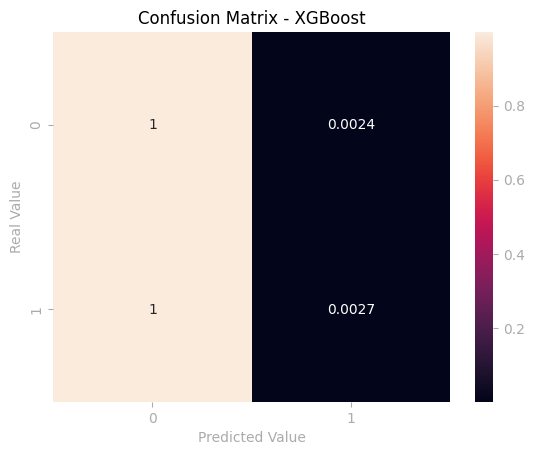

In [97]:
# final XGBoost model
xgb_iso = XGBClassifier(max_depth=1, learning_rate=0.01, n_estimators=350, gamma=5, min_child_weight=1)
xgb_iso.fit(X_iso, y_train_rus)

# prediction
X_test_xgb = scaler2.transform(X_iso_test)
y_pred_xgb = xgb_iso.predict(X_test_xgb)

# classification report
print(classification_report(y_test, y_pred_xgb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_xgb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - XGBoost')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

              precision    recall  f1-score   support

           0       0.82      0.00      0.00      7524
           1       0.16      1.00      0.28      1476

    accuracy                           0.17      9000
   macro avg       0.49      0.50      0.14      9000
weighted avg       0.71      0.17      0.05      9000



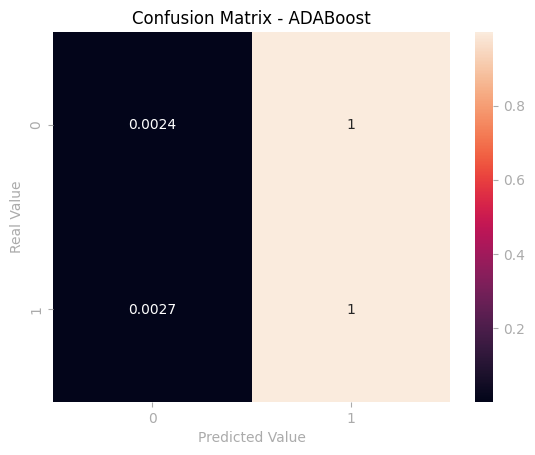

In [98]:
# final ADABOOST model
ada_iso = AdaBoostClassifier(learning_rate=0.1, n_estimators=300)
ada_iso.fit(X_iso, y_train_rus)

# prediction
X_test_ada = scaler2.transform(X_iso_test)
y_pred_ada = ada_iso.predict(X_test_ada)

# classification report
print(classification_report(y_test, y_pred_ada))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_ada, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - ADABoost')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=800
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      7524
           1       0.00      0.00      0.00      1476

    accuracy                           0.84      9000
   macro avg       0.42      0.50      0.46      9000
weighted avg       0.70      0.84      0.76      9000



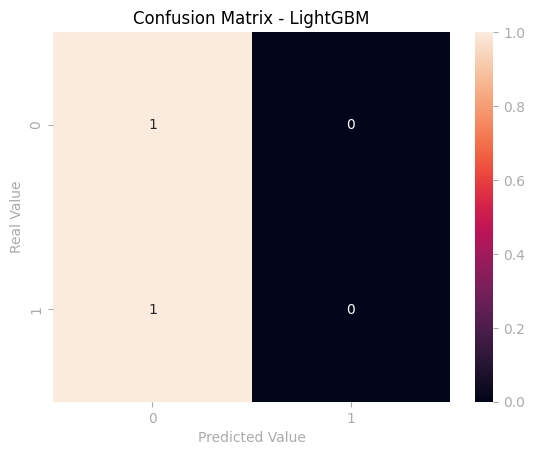

In [99]:
# final LightGBM model
lgb_iso = LGBMClassifier(num_leaves=20, max_depth=15, learning_rate=0.01, min_data_in_leaf=800)
lgb_iso.fit(X_iso, y_train_rus)

# prediction
X_test_lgb = scaler2.transform(X_iso_test)
y_pred_lgb = lgb_iso.predict(X_test_lgb)

# classification report
print(classification_report(y_test, y_pred_lgb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_lgb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - LightGBM')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      7524
           1       0.00      0.00      0.00      1476

    accuracy                           0.84      9000
   macro avg       0.42      0.50      0.46      9000
weighted avg       0.70      0.84      0.76      9000



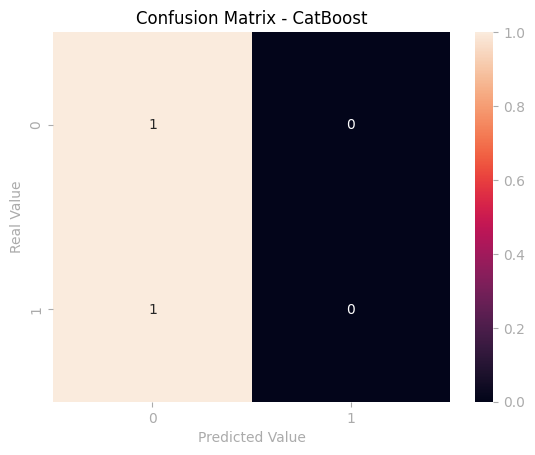

In [100]:
# final CatBoost model
cb_iso = CatBoostClassifier(learning_rate=0.03, depth=6, l2_leaf_reg=10, logging_level='Silent')
cb_iso.fit(X_iso, y_train_rus)

# prediction
X_test_cb = scaler2.transform(X_iso_test)
y_pred_cb = cb_iso.predict(X_test_cb)

# classification report
print(classification_report(y_test, y_pred_cb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_cb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - CatBoost')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

### PRECISION

In [101]:
# define the function val_model_iso_1
def val_model_iso_1(X, y, clf, show=True):
    """
    Apply cross-validation on the training set.

    # Arguments
        X: DataFrame containing the independent variables.
        y: Series containing the target vector.
        clf: Scikit-learn estimator instance.
        
    # Returns
        float, mean value of the cross-validation scores.
    """
    
    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='precision')

    if show == True:
        print(f'Precision: {scores.mean()}, {scores.std()}')
    
    return scores.mean()

In [102]:
#evaluate the models
xgb_iso = XGBClassifier()
lgb_iso = LGBMClassifier()
cb_iso = CatBoostClassifier()
ada_iso = AdaBoostClassifier()

model = []
recall = []

for clf in (xgb_iso, lgb_iso, cb_iso, ada_iso):
    model.append(clf.__class__.__name__)
    recall.append(val_model_iso_1(X_iso, y_train_rus, clf, show=False))

pd.DataFrame(data=recall, index=model, columns=['precision'])

Learning rate set to 0.018279
0:	learn: 0.6920919	total: 8.35ms	remaining: 8.34s
1:	learn: 0.6911441	total: 16ms	remaining: 7.99s
2:	learn: 0.6902912	total: 24.1ms	remaining: 7.99s
3:	learn: 0.6893811	total: 32.2ms	remaining: 8.02s
4:	learn: 0.6884221	total: 40.5ms	remaining: 8.05s
5:	learn: 0.6877742	total: 48.9ms	remaining: 8.1s
6:	learn: 0.6869021	total: 57ms	remaining: 8.08s
7:	learn: 0.6860043	total: 65.4ms	remaining: 8.11s
8:	learn: 0.6852448	total: 73.6ms	remaining: 8.11s
9:	learn: 0.6844174	total: 81.8ms	remaining: 8.1s
10:	learn: 0.6836210	total: 89.8ms	remaining: 8.07s
11:	learn: 0.6827956	total: 99.1ms	remaining: 8.16s
12:	learn: 0.6819799	total: 107ms	remaining: 8.15s
13:	learn: 0.6812714	total: 116ms	remaining: 8.14s
14:	learn: 0.6805441	total: 124ms	remaining: 8.11s
15:	learn: 0.6798606	total: 132ms	remaining: 8.1s
16:	learn: 0.6790380	total: 140ms	remaining: 8.09s
17:	learn: 0.6783594	total: 149ms	remaining: 8.1s
18:	learn: 0.6777153	total: 157ms	remaining: 8.12s
19:	lea

168:	learn: 0.6175263	total: 1.43s	remaining: 7.04s
169:	learn: 0.6173261	total: 1.44s	remaining: 7.03s
170:	learn: 0.6170641	total: 1.45s	remaining: 7.02s
171:	learn: 0.6167959	total: 1.46s	remaining: 7.01s
172:	learn: 0.6164615	total: 1.47s	remaining: 7s
173:	learn: 0.6162626	total: 1.47s	remaining: 6.99s
174:	learn: 0.6160527	total: 1.48s	remaining: 6.98s
175:	learn: 0.6158402	total: 1.49s	remaining: 6.97s
176:	learn: 0.6156327	total: 1.5s	remaining: 6.96s
177:	learn: 0.6154609	total: 1.5s	remaining: 6.95s
178:	learn: 0.6152303	total: 1.51s	remaining: 6.93s
179:	learn: 0.6148450	total: 1.52s	remaining: 6.92s
180:	learn: 0.6146151	total: 1.53s	remaining: 6.91s
181:	learn: 0.6143462	total: 1.54s	remaining: 6.91s
182:	learn: 0.6141462	total: 1.54s	remaining: 6.9s
183:	learn: 0.6137504	total: 1.55s	remaining: 6.88s
184:	learn: 0.6134075	total: 1.56s	remaining: 6.87s
185:	learn: 0.6131348	total: 1.57s	remaining: 6.86s
186:	learn: 0.6128801	total: 1.57s	remaining: 6.85s
187:	learn: 0.6127

347:	learn: 0.5747047	total: 2.86s	remaining: 5.37s
348:	learn: 0.5745341	total: 2.87s	remaining: 5.36s
349:	learn: 0.5742866	total: 2.88s	remaining: 5.35s
350:	learn: 0.5739895	total: 2.89s	remaining: 5.34s
351:	learn: 0.5735871	total: 2.9s	remaining: 5.34s
352:	learn: 0.5734159	total: 2.91s	remaining: 5.33s
353:	learn: 0.5731796	total: 2.92s	remaining: 5.32s
354:	learn: 0.5729292	total: 2.92s	remaining: 5.31s
355:	learn: 0.5727055	total: 2.93s	remaining: 5.3s
356:	learn: 0.5725471	total: 2.94s	remaining: 5.29s
357:	learn: 0.5723039	total: 2.95s	remaining: 5.29s
358:	learn: 0.5721695	total: 2.95s	remaining: 5.28s
359:	learn: 0.5719742	total: 2.96s	remaining: 5.27s
360:	learn: 0.5717976	total: 2.97s	remaining: 5.26s
361:	learn: 0.5715480	total: 2.98s	remaining: 5.25s
362:	learn: 0.5712754	total: 2.98s	remaining: 5.24s
363:	learn: 0.5710752	total: 2.99s	remaining: 5.23s
364:	learn: 0.5707646	total: 3s	remaining: 5.22s
365:	learn: 0.5706051	total: 3.01s	remaining: 5.21s
366:	learn: 0.570

515:	learn: 0.5389826	total: 4.28s	remaining: 4.01s
516:	learn: 0.5387486	total: 4.29s	remaining: 4s
517:	learn: 0.5384728	total: 4.29s	remaining: 4s
518:	learn: 0.5382681	total: 4.3s	remaining: 3.99s
519:	learn: 0.5380567	total: 4.31s	remaining: 3.98s
520:	learn: 0.5379004	total: 4.32s	remaining: 3.97s
521:	learn: 0.5377307	total: 4.33s	remaining: 3.96s
522:	learn: 0.5373953	total: 4.34s	remaining: 3.96s
523:	learn: 0.5372190	total: 4.35s	remaining: 3.95s
524:	learn: 0.5368840	total: 4.35s	remaining: 3.94s
525:	learn: 0.5366650	total: 4.36s	remaining: 3.93s
526:	learn: 0.5365180	total: 4.37s	remaining: 3.92s
527:	learn: 0.5363630	total: 4.38s	remaining: 3.91s
528:	learn: 0.5362221	total: 4.38s	remaining: 3.9s
529:	learn: 0.5360493	total: 4.39s	remaining: 3.9s
530:	learn: 0.5358145	total: 4.4s	remaining: 3.89s
531:	learn: 0.5357022	total: 4.41s	remaining: 3.88s
532:	learn: 0.5354853	total: 4.42s	remaining: 3.87s
533:	learn: 0.5353272	total: 4.43s	remaining: 3.86s
534:	learn: 0.5349759	

690:	learn: 0.4997678	total: 5.69s	remaining: 2.54s
691:	learn: 0.4995791	total: 5.7s	remaining: 2.54s
692:	learn: 0.4993624	total: 5.71s	remaining: 2.53s
693:	learn: 0.4991415	total: 5.72s	remaining: 2.52s
694:	learn: 0.4988866	total: 5.72s	remaining: 2.51s
695:	learn: 0.4987151	total: 5.73s	remaining: 2.5s
696:	learn: 0.4985704	total: 5.74s	remaining: 2.5s
697:	learn: 0.4982895	total: 5.75s	remaining: 2.49s
698:	learn: 0.4981117	total: 5.76s	remaining: 2.48s
699:	learn: 0.4979541	total: 5.77s	remaining: 2.47s
700:	learn: 0.4977847	total: 5.77s	remaining: 2.46s
701:	learn: 0.4975757	total: 5.78s	remaining: 2.45s
702:	learn: 0.4972868	total: 5.79s	remaining: 2.45s
703:	learn: 0.4971220	total: 5.8s	remaining: 2.44s
704:	learn: 0.4969152	total: 5.8s	remaining: 2.43s
705:	learn: 0.4967122	total: 5.81s	remaining: 2.42s
706:	learn: 0.4964471	total: 5.82s	remaining: 2.41s
707:	learn: 0.4962507	total: 5.83s	remaining: 2.4s
708:	learn: 0.4959656	total: 5.83s	remaining: 2.4s
709:	learn: 0.49580

872:	learn: 0.4617619	total: 7.14s	remaining: 1.04s
873:	learn: 0.4615251	total: 7.15s	remaining: 1.03s
874:	learn: 0.4614089	total: 7.16s	remaining: 1.02s
875:	learn: 0.4612814	total: 7.17s	remaining: 1.01s
876:	learn: 0.4610928	total: 7.2s	remaining: 1.01s
877:	learn: 0.4609298	total: 7.21s	remaining: 1s
878:	learn: 0.4607755	total: 7.22s	remaining: 994ms
879:	learn: 0.4606143	total: 7.23s	remaining: 986ms
880:	learn: 0.4603857	total: 7.24s	remaining: 978ms
881:	learn: 0.4602016	total: 7.25s	remaining: 969ms
882:	learn: 0.4599270	total: 7.25s	remaining: 961ms
883:	learn: 0.4597203	total: 7.26s	remaining: 953ms
884:	learn: 0.4595202	total: 7.27s	remaining: 945ms
885:	learn: 0.4594522	total: 7.28s	remaining: 936ms
886:	learn: 0.4591811	total: 7.28s	remaining: 928ms
887:	learn: 0.4589310	total: 7.29s	remaining: 920ms
888:	learn: 0.4587022	total: 7.3s	remaining: 911ms
889:	learn: 0.4584775	total: 7.31s	remaining: 903ms
890:	learn: 0.4583159	total: 7.32s	remaining: 895ms
891:	learn: 0.458

36:	learn: 0.6678553	total: 302ms	remaining: 7.85s
37:	learn: 0.6672353	total: 310ms	remaining: 7.86s
38:	learn: 0.6667665	total: 320ms	remaining: 7.87s
39:	learn: 0.6661959	total: 329ms	remaining: 7.88s
40:	learn: 0.6657522	total: 337ms	remaining: 7.89s
41:	learn: 0.6652376	total: 346ms	remaining: 7.88s
42:	learn: 0.6648324	total: 354ms	remaining: 7.87s
43:	learn: 0.6643739	total: 362ms	remaining: 7.87s
44:	learn: 0.6638153	total: 370ms	remaining: 7.86s
45:	learn: 0.6632609	total: 379ms	remaining: 7.86s
46:	learn: 0.6628581	total: 387ms	remaining: 7.84s
47:	learn: 0.6625242	total: 395ms	remaining: 7.83s
48:	learn: 0.6621025	total: 402ms	remaining: 7.81s
49:	learn: 0.6617501	total: 411ms	remaining: 7.8s
50:	learn: 0.6612996	total: 419ms	remaining: 7.8s
51:	learn: 0.6608209	total: 427ms	remaining: 7.79s
52:	learn: 0.6602663	total: 435ms	remaining: 7.78s
53:	learn: 0.6597535	total: 447ms	remaining: 7.83s
54:	learn: 0.6594185	total: 456ms	remaining: 7.84s
55:	learn: 0.6589904	total: 466ms

206:	learn: 0.6128153	total: 1.73s	remaining: 6.63s
207:	learn: 0.6126164	total: 1.74s	remaining: 6.63s
208:	learn: 0.6123983	total: 1.75s	remaining: 6.62s
209:	learn: 0.6121687	total: 1.76s	remaining: 6.62s
210:	learn: 0.6119235	total: 1.77s	remaining: 6.61s
211:	learn: 0.6116515	total: 1.77s	remaining: 6.6s
212:	learn: 0.6114387	total: 1.78s	remaining: 6.59s
213:	learn: 0.6111706	total: 1.79s	remaining: 6.58s
214:	learn: 0.6109488	total: 1.8s	remaining: 6.57s
215:	learn: 0.6105680	total: 1.81s	remaining: 6.56s
216:	learn: 0.6104527	total: 1.82s	remaining: 6.55s
217:	learn: 0.6102288	total: 1.82s	remaining: 6.54s
218:	learn: 0.6098322	total: 1.83s	remaining: 6.53s
219:	learn: 0.6094631	total: 1.84s	remaining: 6.52s
220:	learn: 0.6091949	total: 1.85s	remaining: 6.51s
221:	learn: 0.6089282	total: 1.85s	remaining: 6.5s
222:	learn: 0.6085792	total: 1.86s	remaining: 6.49s
223:	learn: 0.6084240	total: 1.87s	remaining: 6.48s
224:	learn: 0.6081334	total: 1.88s	remaining: 6.47s
225:	learn: 0.6

381:	learn: 0.5736621	total: 3.17s	remaining: 5.13s
382:	learn: 0.5734956	total: 3.18s	remaining: 5.13s
383:	learn: 0.5733047	total: 3.19s	remaining: 5.13s
384:	learn: 0.5730654	total: 3.2s	remaining: 5.12s
385:	learn: 0.5728989	total: 3.21s	remaining: 5.11s
386:	learn: 0.5726804	total: 3.22s	remaining: 5.1s
387:	learn: 0.5725677	total: 3.23s	remaining: 5.09s
388:	learn: 0.5722669	total: 3.23s	remaining: 5.08s
389:	learn: 0.5721033	total: 3.24s	remaining: 5.07s
390:	learn: 0.5718911	total: 3.25s	remaining: 5.06s
391:	learn: 0.5715930	total: 3.26s	remaining: 5.05s
392:	learn: 0.5714647	total: 3.27s	remaining: 5.05s
393:	learn: 0.5712363	total: 3.27s	remaining: 5.04s
394:	learn: 0.5710482	total: 3.28s	remaining: 5.03s
395:	learn: 0.5708537	total: 3.29s	remaining: 5.02s
396:	learn: 0.5706539	total: 3.3s	remaining: 5.01s
397:	learn: 0.5704886	total: 3.31s	remaining: 5s
398:	learn: 0.5702452	total: 3.31s	remaining: 4.99s
399:	learn: 0.5700193	total: 3.32s	remaining: 4.98s
400:	learn: 0.5697

553:	learn: 0.5378520	total: 4.61s	remaining: 3.71s
554:	learn: 0.5375528	total: 4.62s	remaining: 3.7s
555:	learn: 0.5374110	total: 4.63s	remaining: 3.69s
556:	learn: 0.5371707	total: 4.63s	remaining: 3.69s
557:	learn: 0.5369290	total: 4.64s	remaining: 3.68s
558:	learn: 0.5366944	total: 4.65s	remaining: 3.67s
559:	learn: 0.5365375	total: 4.66s	remaining: 3.66s
560:	learn: 0.5363459	total: 4.67s	remaining: 3.65s
561:	learn: 0.5361210	total: 4.67s	remaining: 3.64s
562:	learn: 0.5358910	total: 4.68s	remaining: 3.63s
563:	learn: 0.5356700	total: 4.69s	remaining: 3.63s
564:	learn: 0.5354529	total: 4.7s	remaining: 3.62s
565:	learn: 0.5351395	total: 4.71s	remaining: 3.61s
566:	learn: 0.5348753	total: 4.71s	remaining: 3.6s
567:	learn: 0.5345833	total: 4.72s	remaining: 3.59s
568:	learn: 0.5343723	total: 4.73s	remaining: 3.58s
569:	learn: 0.5342476	total: 4.74s	remaining: 3.57s
570:	learn: 0.5341328	total: 4.75s	remaining: 3.56s
571:	learn: 0.5339873	total: 4.75s	remaining: 3.56s
572:	learn: 0.5

728:	learn: 0.4992450	total: 6.05s	remaining: 2.25s
729:	learn: 0.4990472	total: 6.06s	remaining: 2.24s
730:	learn: 0.4989201	total: 6.07s	remaining: 2.23s
731:	learn: 0.4986861	total: 6.08s	remaining: 2.23s
732:	learn: 0.4985285	total: 6.09s	remaining: 2.22s
733:	learn: 0.4983812	total: 6.1s	remaining: 2.21s
734:	learn: 0.4981467	total: 6.1s	remaining: 2.2s
735:	learn: 0.4979320	total: 6.11s	remaining: 2.19s
736:	learn: 0.4977418	total: 6.12s	remaining: 2.18s
737:	learn: 0.4974911	total: 6.13s	remaining: 2.18s
738:	learn: 0.4973213	total: 6.14s	remaining: 2.17s
739:	learn: 0.4970952	total: 6.14s	remaining: 2.16s
740:	learn: 0.4969242	total: 6.15s	remaining: 2.15s
741:	learn: 0.4967697	total: 6.16s	remaining: 2.14s
742:	learn: 0.4965185	total: 6.17s	remaining: 2.13s
743:	learn: 0.4962337	total: 6.18s	remaining: 2.13s
744:	learn: 0.4961109	total: 6.18s	remaining: 2.12s
745:	learn: 0.4958759	total: 6.19s	remaining: 2.11s
746:	learn: 0.4956935	total: 6.2s	remaining: 2.1s
747:	learn: 0.495

897:	learn: 0.4660508	total: 7.46s	remaining: 848ms
898:	learn: 0.4657729	total: 7.47s	remaining: 840ms
899:	learn: 0.4655913	total: 7.48s	remaining: 831ms
900:	learn: 0.4654359	total: 7.49s	remaining: 823ms
901:	learn: 0.4653044	total: 7.5s	remaining: 815ms
902:	learn: 0.4650675	total: 7.51s	remaining: 807ms
903:	learn: 0.4648831	total: 7.52s	remaining: 798ms
904:	learn: 0.4647590	total: 7.52s	remaining: 790ms
905:	learn: 0.4645624	total: 7.53s	remaining: 781ms
906:	learn: 0.4644232	total: 7.54s	remaining: 773ms
907:	learn: 0.4642192	total: 7.55s	remaining: 765ms
908:	learn: 0.4640528	total: 7.56s	remaining: 756ms
909:	learn: 0.4639084	total: 7.56s	remaining: 748ms
910:	learn: 0.4637869	total: 7.57s	remaining: 740ms
911:	learn: 0.4635458	total: 7.58s	remaining: 732ms
912:	learn: 0.4633814	total: 7.59s	remaining: 723ms
913:	learn: 0.4631725	total: 7.6s	remaining: 715ms
914:	learn: 0.4630037	total: 7.61s	remaining: 707ms
915:	learn: 0.4628265	total: 7.62s	remaining: 698ms
916:	learn: 0.

59:	learn: 0.6546319	total: 480ms	remaining: 7.52s
60:	learn: 0.6540727	total: 489ms	remaining: 7.53s
61:	learn: 0.6536359	total: 498ms	remaining: 7.54s
62:	learn: 0.6531726	total: 509ms	remaining: 7.57s
63:	learn: 0.6528272	total: 518ms	remaining: 7.57s
64:	learn: 0.6524526	total: 526ms	remaining: 7.57s
65:	learn: 0.6520011	total: 538ms	remaining: 7.61s
66:	learn: 0.6516637	total: 547ms	remaining: 7.61s
67:	learn: 0.6513135	total: 555ms	remaining: 7.61s
68:	learn: 0.6508969	total: 563ms	remaining: 7.6s
69:	learn: 0.6504664	total: 572ms	remaining: 7.6s
70:	learn: 0.6501109	total: 581ms	remaining: 7.6s
71:	learn: 0.6498418	total: 589ms	remaining: 7.59s
72:	learn: 0.6495516	total: 597ms	remaining: 7.58s
73:	learn: 0.6491217	total: 605ms	remaining: 7.57s
74:	learn: 0.6486897	total: 613ms	remaining: 7.56s
75:	learn: 0.6482897	total: 621ms	remaining: 7.55s
76:	learn: 0.6478851	total: 632ms	remaining: 7.58s
77:	learn: 0.6473511	total: 640ms	remaining: 7.57s
78:	learn: 0.6468282	total: 649ms	

231:	learn: 0.6012809	total: 1.93s	remaining: 6.38s
232:	learn: 0.6011556	total: 1.94s	remaining: 6.37s
233:	learn: 0.6009292	total: 1.95s	remaining: 6.37s
234:	learn: 0.6007151	total: 1.96s	remaining: 6.37s
235:	learn: 0.6003231	total: 1.96s	remaining: 6.36s
236:	learn: 0.6002024	total: 1.97s	remaining: 6.35s
237:	learn: 0.5999751	total: 1.98s	remaining: 6.35s
238:	learn: 0.5996002	total: 1.99s	remaining: 6.34s
239:	learn: 0.5994458	total: 2s	remaining: 6.33s
240:	learn: 0.5992713	total: 2.01s	remaining: 6.33s
241:	learn: 0.5990162	total: 2.02s	remaining: 6.32s
242:	learn: 0.5988214	total: 2.03s	remaining: 6.32s
243:	learn: 0.5986365	total: 2.04s	remaining: 6.31s
244:	learn: 0.5984022	total: 2.05s	remaining: 6.3s
245:	learn: 0.5982560	total: 2.06s	remaining: 6.3s
246:	learn: 0.5981162	total: 2.06s	remaining: 6.29s
247:	learn: 0.5976848	total: 2.07s	remaining: 6.29s
248:	learn: 0.5974295	total: 2.08s	remaining: 6.29s
249:	learn: 0.5971342	total: 2.09s	remaining: 6.28s
250:	learn: 0.596

397:	learn: 0.5647791	total: 3.33s	remaining: 5.04s
398:	learn: 0.5645507	total: 3.34s	remaining: 5.03s
399:	learn: 0.5643332	total: 3.35s	remaining: 5.02s
400:	learn: 0.5640816	total: 3.36s	remaining: 5.01s
401:	learn: 0.5639067	total: 3.37s	remaining: 5.01s
402:	learn: 0.5637284	total: 3.37s	remaining: 5s
403:	learn: 0.5634700	total: 3.38s	remaining: 4.99s
404:	learn: 0.5633657	total: 3.39s	remaining: 4.98s
405:	learn: 0.5630744	total: 3.4s	remaining: 4.97s
406:	learn: 0.5628884	total: 3.41s	remaining: 4.97s
407:	learn: 0.5627387	total: 3.42s	remaining: 4.96s
408:	learn: 0.5624680	total: 3.42s	remaining: 4.95s
409:	learn: 0.5623031	total: 3.43s	remaining: 4.94s
410:	learn: 0.5620265	total: 3.44s	remaining: 4.93s
411:	learn: 0.5617697	total: 3.45s	remaining: 4.92s
412:	learn: 0.5615698	total: 3.46s	remaining: 4.91s
413:	learn: 0.5613470	total: 3.46s	remaining: 4.9s
414:	learn: 0.5611153	total: 3.47s	remaining: 4.89s
415:	learn: 0.5608839	total: 3.48s	remaining: 4.89s
416:	learn: 0.560

570:	learn: 0.5283907	total: 4.76s	remaining: 3.58s
571:	learn: 0.5280897	total: 4.77s	remaining: 3.57s
572:	learn: 0.5278897	total: 4.78s	remaining: 3.56s
573:	learn: 0.5277082	total: 4.79s	remaining: 3.55s
574:	learn: 0.5274644	total: 4.8s	remaining: 3.54s
575:	learn: 0.5272580	total: 4.8s	remaining: 3.54s
576:	learn: 0.5270434	total: 4.81s	remaining: 3.53s
577:	learn: 0.5268358	total: 4.82s	remaining: 3.52s
578:	learn: 0.5266555	total: 4.83s	remaining: 3.51s
579:	learn: 0.5263034	total: 4.84s	remaining: 3.5s
580:	learn: 0.5261979	total: 4.84s	remaining: 3.49s
581:	learn: 0.5259281	total: 4.85s	remaining: 3.48s
582:	learn: 0.5256272	total: 4.86s	remaining: 3.48s
583:	learn: 0.5253443	total: 4.87s	remaining: 3.47s
584:	learn: 0.5250868	total: 4.88s	remaining: 3.46s
585:	learn: 0.5248981	total: 4.88s	remaining: 3.45s
586:	learn: 0.5246744	total: 4.89s	remaining: 3.44s
587:	learn: 0.5243616	total: 4.9s	remaining: 3.43s
588:	learn: 0.5240032	total: 4.91s	remaining: 3.42s
589:	learn: 0.52

743:	learn: 0.4907516	total: 6.18s	remaining: 2.13s
744:	learn: 0.4904669	total: 6.19s	remaining: 2.12s
745:	learn: 0.4901163	total: 6.2s	remaining: 2.11s
746:	learn: 0.4898733	total: 6.21s	remaining: 2.1s
747:	learn: 0.4896291	total: 6.22s	remaining: 2.09s
748:	learn: 0.4894842	total: 6.22s	remaining: 2.09s
749:	learn: 0.4892347	total: 6.23s	remaining: 2.08s
750:	learn: 0.4890798	total: 6.24s	remaining: 2.07s
751:	learn: 0.4888783	total: 6.25s	remaining: 2.06s
752:	learn: 0.4886793	total: 6.26s	remaining: 2.05s
753:	learn: 0.4884980	total: 6.26s	remaining: 2.04s
754:	learn: 0.4884075	total: 6.27s	remaining: 2.04s
755:	learn: 0.4881383	total: 6.28s	remaining: 2.03s
756:	learn: 0.4880001	total: 6.29s	remaining: 2.02s
757:	learn: 0.4877677	total: 6.3s	remaining: 2.01s
758:	learn: 0.4875585	total: 6.3s	remaining: 2s
759:	learn: 0.4873673	total: 6.31s	remaining: 1.99s
760:	learn: 0.4871455	total: 6.32s	remaining: 1.98s
761:	learn: 0.4870229	total: 6.33s	remaining: 1.98s
762:	learn: 0.48680

916:	learn: 0.4570987	total: 7.61s	remaining: 689ms
917:	learn: 0.4569304	total: 7.62s	remaining: 681ms
918:	learn: 0.4567556	total: 7.63s	remaining: 672ms
919:	learn: 0.4565552	total: 7.66s	remaining: 666ms
920:	learn: 0.4563619	total: 7.67s	remaining: 658ms
921:	learn: 0.4561248	total: 7.68s	remaining: 650ms
922:	learn: 0.4560291	total: 7.69s	remaining: 641ms
923:	learn: 0.4558567	total: 7.7s	remaining: 633ms
924:	learn: 0.4556763	total: 7.7s	remaining: 625ms
925:	learn: 0.4555532	total: 7.71s	remaining: 616ms
926:	learn: 0.4553724	total: 7.72s	remaining: 608ms
927:	learn: 0.4551739	total: 7.73s	remaining: 600ms
928:	learn: 0.4550146	total: 7.74s	remaining: 591ms
929:	learn: 0.4548111	total: 7.75s	remaining: 583ms
930:	learn: 0.4546979	total: 7.75s	remaining: 575ms
931:	learn: 0.4545890	total: 7.76s	remaining: 566ms
932:	learn: 0.4544539	total: 7.77s	remaining: 558ms
933:	learn: 0.4542329	total: 7.78s	remaining: 550ms
934:	learn: 0.4540650	total: 7.79s	remaining: 541ms
935:	learn: 0.

79:	learn: 0.6463216	total: 644ms	remaining: 7.4s
80:	learn: 0.6459753	total: 652ms	remaining: 7.4s
81:	learn: 0.6454768	total: 662ms	remaining: 7.41s
82:	learn: 0.6450587	total: 672ms	remaining: 7.43s
83:	learn: 0.6445757	total: 682ms	remaining: 7.43s
84:	learn: 0.6442065	total: 691ms	remaining: 7.43s
85:	learn: 0.6437679	total: 699ms	remaining: 7.43s
86:	learn: 0.6434360	total: 707ms	remaining: 7.42s
87:	learn: 0.6431560	total: 716ms	remaining: 7.42s
88:	learn: 0.6427139	total: 724ms	remaining: 7.41s
89:	learn: 0.6423968	total: 732ms	remaining: 7.4s
90:	learn: 0.6420344	total: 740ms	remaining: 7.39s
91:	learn: 0.6416101	total: 748ms	remaining: 7.38s
92:	learn: 0.6412240	total: 756ms	remaining: 7.37s
93:	learn: 0.6409161	total: 763ms	remaining: 7.36s
94:	learn: 0.6405348	total: 771ms	remaining: 7.35s
95:	learn: 0.6401791	total: 779ms	remaining: 7.34s
96:	learn: 0.6398244	total: 787ms	remaining: 7.33s
97:	learn: 0.6394482	total: 795ms	remaining: 7.32s
98:	learn: 0.6391764	total: 803ms	

255:	learn: 0.5970265	total: 2.07s	remaining: 6.01s
256:	learn: 0.5968741	total: 2.08s	remaining: 6.01s
257:	learn: 0.5967174	total: 2.09s	remaining: 6s
258:	learn: 0.5964747	total: 2.1s	remaining: 6s
259:	learn: 0.5963217	total: 2.1s	remaining: 5.99s
260:	learn: 0.5961124	total: 2.11s	remaining: 5.98s
261:	learn: 0.5958387	total: 2.12s	remaining: 5.97s
262:	learn: 0.5956223	total: 2.13s	remaining: 5.96s
263:	learn: 0.5953671	total: 2.14s	remaining: 5.96s
264:	learn: 0.5952231	total: 2.14s	remaining: 5.95s
265:	learn: 0.5950054	total: 2.15s	remaining: 5.94s
266:	learn: 0.5948102	total: 2.16s	remaining: 5.93s
267:	learn: 0.5945627	total: 2.17s	remaining: 5.92s
268:	learn: 0.5943011	total: 2.17s	remaining: 5.91s
269:	learn: 0.5940275	total: 2.18s	remaining: 5.9s
270:	learn: 0.5938353	total: 2.19s	remaining: 5.89s
271:	learn: 0.5935746	total: 2.2s	remaining: 5.88s
272:	learn: 0.5933871	total: 2.21s	remaining: 5.88s
273:	learn: 0.5931763	total: 2.21s	remaining: 5.87s
274:	learn: 0.5929856	

429:	learn: 0.5598062	total: 3.5s	remaining: 4.64s
430:	learn: 0.5595494	total: 3.51s	remaining: 4.64s
431:	learn: 0.5594098	total: 3.52s	remaining: 4.63s
432:	learn: 0.5592854	total: 3.53s	remaining: 4.62s
433:	learn: 0.5590722	total: 3.54s	remaining: 4.62s
434:	learn: 0.5589109	total: 3.55s	remaining: 4.61s
435:	learn: 0.5586215	total: 3.56s	remaining: 4.6s
436:	learn: 0.5583902	total: 3.57s	remaining: 4.59s
437:	learn: 0.5582029	total: 3.58s	remaining: 4.59s
438:	learn: 0.5579766	total: 3.58s	remaining: 4.58s
439:	learn: 0.5578419	total: 3.59s	remaining: 4.57s
440:	learn: 0.5576815	total: 3.6s	remaining: 4.56s
441:	learn: 0.5574225	total: 3.61s	remaining: 4.56s
442:	learn: 0.5572605	total: 3.62s	remaining: 4.55s
443:	learn: 0.5570500	total: 3.63s	remaining: 4.54s
444:	learn: 0.5569494	total: 3.63s	remaining: 4.53s
445:	learn: 0.5567436	total: 3.64s	remaining: 4.53s
446:	learn: 0.5564737	total: 3.65s	remaining: 4.52s
447:	learn: 0.5562520	total: 3.66s	remaining: 4.51s
448:	learn: 0.5

597:	learn: 0.5227710	total: 4.93s	remaining: 3.31s
598:	learn: 0.5225778	total: 4.94s	remaining: 3.31s
599:	learn: 0.5223437	total: 4.95s	remaining: 3.3s
600:	learn: 0.5219826	total: 4.96s	remaining: 3.29s
601:	learn: 0.5216394	total: 4.96s	remaining: 3.28s
602:	learn: 0.5213313	total: 4.97s	remaining: 3.27s
603:	learn: 0.5210608	total: 4.98s	remaining: 3.27s
604:	learn: 0.5208334	total: 4.99s	remaining: 3.26s
605:	learn: 0.5205811	total: 5s	remaining: 3.25s
606:	learn: 0.5202930	total: 5.01s	remaining: 3.24s
607:	learn: 0.5200638	total: 5.01s	remaining: 3.23s
608:	learn: 0.5197641	total: 5.02s	remaining: 3.22s
609:	learn: 0.5195177	total: 5.03s	remaining: 3.21s
610:	learn: 0.5193741	total: 5.04s	remaining: 3.21s
611:	learn: 0.5190840	total: 5.04s	remaining: 3.2s
612:	learn: 0.5187931	total: 5.05s	remaining: 3.19s
613:	learn: 0.5185008	total: 5.06s	remaining: 3.18s
614:	learn: 0.5182607	total: 5.07s	remaining: 3.17s
615:	learn: 0.5180072	total: 5.08s	remaining: 3.16s
616:	learn: 0.517

769:	learn: 0.4836208	total: 6.35s	remaining: 1.9s
770:	learn: 0.4834836	total: 6.36s	remaining: 1.89s
771:	learn: 0.4832674	total: 6.37s	remaining: 1.88s
772:	learn: 0.4831374	total: 6.38s	remaining: 1.87s
773:	learn: 0.4829510	total: 6.39s	remaining: 1.86s
774:	learn: 0.4827475	total: 6.4s	remaining: 1.86s
775:	learn: 0.4824979	total: 6.41s	remaining: 1.85s
776:	learn: 0.4823088	total: 6.42s	remaining: 1.84s
777:	learn: 0.4821214	total: 6.42s	remaining: 1.83s
778:	learn: 0.4818197	total: 6.43s	remaining: 1.82s
779:	learn: 0.4816584	total: 6.44s	remaining: 1.82s
780:	learn: 0.4813612	total: 6.45s	remaining: 1.81s
781:	learn: 0.4812513	total: 6.46s	remaining: 1.8s
782:	learn: 0.4810227	total: 6.46s	remaining: 1.79s
783:	learn: 0.4808993	total: 6.47s	remaining: 1.78s
784:	learn: 0.4806053	total: 6.48s	remaining: 1.77s
785:	learn: 0.4804256	total: 6.49s	remaining: 1.76s
786:	learn: 0.4802214	total: 6.49s	remaining: 1.76s
787:	learn: 0.4800487	total: 6.5s	remaining: 1.75s
788:	learn: 0.47

942:	learn: 0.4496471	total: 7.76s	remaining: 469ms
943:	learn: 0.4494293	total: 7.77s	remaining: 461ms
944:	learn: 0.4492764	total: 7.78s	remaining: 453ms
945:	learn: 0.4491418	total: 7.79s	remaining: 445ms
946:	learn: 0.4489761	total: 7.8s	remaining: 436ms
947:	learn: 0.4487306	total: 7.8s	remaining: 428ms
948:	learn: 0.4485591	total: 7.81s	remaining: 420ms
949:	learn: 0.4483928	total: 7.82s	remaining: 412ms
950:	learn: 0.4482369	total: 7.83s	remaining: 403ms
951:	learn: 0.4480869	total: 7.84s	remaining: 395ms
952:	learn: 0.4478663	total: 7.84s	remaining: 387ms
953:	learn: 0.4476636	total: 7.85s	remaining: 379ms
954:	learn: 0.4475257	total: 7.86s	remaining: 370ms
955:	learn: 0.4472671	total: 7.87s	remaining: 362ms
956:	learn: 0.4471064	total: 7.88s	remaining: 354ms
957:	learn: 0.4469230	total: 7.89s	remaining: 346ms
958:	learn: 0.4467729	total: 7.89s	remaining: 338ms
959:	learn: 0.4465298	total: 7.9s	remaining: 329ms
960:	learn: 0.4463000	total: 7.91s	remaining: 321ms
961:	learn: 0.4

125:	learn: 0.6279144	total: 1.04s	remaining: 7.24s
126:	learn: 0.6275660	total: 1.05s	remaining: 7.23s
127:	learn: 0.6271105	total: 1.06s	remaining: 7.22s
128:	learn: 0.6267144	total: 1.07s	remaining: 7.22s
129:	learn: 0.6265293	total: 1.08s	remaining: 7.22s
130:	learn: 0.6262632	total: 1.09s	remaining: 7.21s
131:	learn: 0.6259679	total: 1.09s	remaining: 7.2s
132:	learn: 0.6257359	total: 1.1s	remaining: 7.19s
133:	learn: 0.6254060	total: 1.11s	remaining: 7.18s
134:	learn: 0.6251310	total: 1.12s	remaining: 7.18s
135:	learn: 0.6248871	total: 1.13s	remaining: 7.17s
136:	learn: 0.6246048	total: 1.14s	remaining: 7.16s
137:	learn: 0.6242963	total: 1.14s	remaining: 7.15s
138:	learn: 0.6240636	total: 1.15s	remaining: 7.14s
139:	learn: 0.6237979	total: 1.16s	remaining: 7.13s
140:	learn: 0.6235453	total: 1.17s	remaining: 7.12s
141:	learn: 0.6231866	total: 1.18s	remaining: 7.11s
142:	learn: 0.6228626	total: 1.18s	remaining: 7.09s
143:	learn: 0.6225252	total: 1.19s	remaining: 7.08s
144:	learn: 0.

301:	learn: 0.5832409	total: 2.47s	remaining: 5.72s
302:	learn: 0.5830623	total: 2.48s	remaining: 5.71s
303:	learn: 0.5829459	total: 2.49s	remaining: 5.71s
304:	learn: 0.5828224	total: 2.5s	remaining: 5.7s
305:	learn: 0.5825503	total: 2.51s	remaining: 5.7s
306:	learn: 0.5823082	total: 2.52s	remaining: 5.69s
307:	learn: 0.5820980	total: 2.53s	remaining: 5.68s
308:	learn: 0.5819817	total: 2.54s	remaining: 5.67s
309:	learn: 0.5817865	total: 2.54s	remaining: 5.66s
310:	learn: 0.5815022	total: 2.55s	remaining: 5.66s
311:	learn: 0.5812578	total: 2.56s	remaining: 5.65s
312:	learn: 0.5810099	total: 2.57s	remaining: 5.64s
313:	learn: 0.5808105	total: 2.58s	remaining: 5.63s
314:	learn: 0.5805029	total: 2.58s	remaining: 5.62s
315:	learn: 0.5803229	total: 2.59s	remaining: 5.61s
316:	learn: 0.5801030	total: 2.6s	remaining: 5.6s
317:	learn: 0.5798441	total: 2.61s	remaining: 5.59s
318:	learn: 0.5797544	total: 2.62s	remaining: 5.58s
319:	learn: 0.5794753	total: 2.62s	remaining: 5.58s
320:	learn: 0.579

476:	learn: 0.5461627	total: 3.9s	remaining: 4.28s
477:	learn: 0.5459530	total: 3.91s	remaining: 4.27s
478:	learn: 0.5457420	total: 3.92s	remaining: 4.26s
479:	learn: 0.5454716	total: 3.93s	remaining: 4.25s
480:	learn: 0.5452936	total: 3.94s	remaining: 4.25s
481:	learn: 0.5450798	total: 3.94s	remaining: 4.24s
482:	learn: 0.5448844	total: 3.95s	remaining: 4.23s
483:	learn: 0.5446633	total: 3.96s	remaining: 4.22s
484:	learn: 0.5444123	total: 3.97s	remaining: 4.21s
485:	learn: 0.5441815	total: 3.98s	remaining: 4.2s
486:	learn: 0.5439545	total: 3.98s	remaining: 4.2s
487:	learn: 0.5436622	total: 3.99s	remaining: 4.19s
488:	learn: 0.5434019	total: 4s	remaining: 4.18s
489:	learn: 0.5431904	total: 4.01s	remaining: 4.17s
490:	learn: 0.5429762	total: 4.01s	remaining: 4.16s
491:	learn: 0.5427832	total: 4.02s	remaining: 4.15s
492:	learn: 0.5425298	total: 4.03s	remaining: 4.15s
493:	learn: 0.5423747	total: 4.04s	remaining: 4.14s
494:	learn: 0.5421412	total: 4.05s	remaining: 4.13s
495:	learn: 0.5418

650:	learn: 0.5057815	total: 5.34s	remaining: 2.86s
651:	learn: 0.5055779	total: 5.35s	remaining: 2.85s
652:	learn: 0.5053795	total: 5.36s	remaining: 2.85s
653:	learn: 0.5051497	total: 5.36s	remaining: 2.84s
654:	learn: 0.5049158	total: 5.37s	remaining: 2.83s
655:	learn: 0.5046592	total: 5.38s	remaining: 2.82s
656:	learn: 0.5044678	total: 5.39s	remaining: 2.81s
657:	learn: 0.5042431	total: 5.4s	remaining: 2.81s
658:	learn: 0.5039385	total: 5.41s	remaining: 2.8s
659:	learn: 0.5036633	total: 5.41s	remaining: 2.79s
660:	learn: 0.5035002	total: 5.42s	remaining: 2.78s
661:	learn: 0.5033740	total: 5.43s	remaining: 2.77s
662:	learn: 0.5031290	total: 5.44s	remaining: 2.76s
663:	learn: 0.5029272	total: 5.45s	remaining: 2.75s
664:	learn: 0.5026552	total: 5.45s	remaining: 2.75s
665:	learn: 0.5024008	total: 5.46s	remaining: 2.74s
666:	learn: 0.5022547	total: 5.47s	remaining: 2.73s
667:	learn: 0.5020616	total: 5.48s	remaining: 2.72s
668:	learn: 0.5018293	total: 5.49s	remaining: 2.71s
669:	learn: 0.

825:	learn: 0.4685973	total: 6.77s	remaining: 1.43s
826:	learn: 0.4683580	total: 6.78s	remaining: 1.42s
827:	learn: 0.4681792	total: 6.79s	remaining: 1.41s
828:	learn: 0.4680028	total: 6.8s	remaining: 1.4s
829:	learn: 0.4677117	total: 6.81s	remaining: 1.39s
830:	learn: 0.4675861	total: 6.82s	remaining: 1.39s
831:	learn: 0.4673739	total: 6.83s	remaining: 1.38s
832:	learn: 0.4671835	total: 6.83s	remaining: 1.37s
833:	learn: 0.4670124	total: 6.84s	remaining: 1.36s
834:	learn: 0.4668029	total: 6.85s	remaining: 1.35s
835:	learn: 0.4665346	total: 6.86s	remaining: 1.34s
836:	learn: 0.4664111	total: 6.87s	remaining: 1.34s
837:	learn: 0.4662865	total: 6.87s	remaining: 1.33s
838:	learn: 0.4660942	total: 6.88s	remaining: 1.32s
839:	learn: 0.4658595	total: 6.89s	remaining: 1.31s
840:	learn: 0.4656629	total: 6.9s	remaining: 1.3s
841:	learn: 0.4654600	total: 6.91s	remaining: 1.29s
842:	learn: 0.4652265	total: 6.91s	remaining: 1.29s
843:	learn: 0.4650328	total: 6.92s	remaining: 1.28s
844:	learn: 0.46

,precision
XGBClassifier,0.541323
LGBMClassifier,0.555413
CatBoostClassifier,0.564274
AdaBoostClassifier,0.566338


In [103]:
# XGBoost
xgb_iso = XGBClassifier()

# parameter to be searched
param_grid = {'n_estimators': range(0,1000,50)}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb_iso, param_grid, scoring="precision", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.5550955256682133 for {'n_estimators': 50}


In [104]:
# XGBoost
xgb_iso = XGBClassifier(n_estimators=50)

# parameter to be searched
param_grid = {'max_depth': [1, 3, 5],
              'min_child_weight': [1, 3, 6]}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb_iso, param_grid, scoring="precision", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.5813332852201855 for {'max_depth': 1, 'min_child_weight': 3}


In [105]:
# XGBoost
xgb_iso = XGBClassifier(n_estimators=50, max_depth=3, min_child_weight=6)

# parameter to be searched
param_grid = {'gamma': [0, 1, 5]}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb_iso, param_grid, scoring="precision", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.574205481330197 for {'gamma': 5}


In [106]:
# XGBoost
xgb_iso = XGBClassifier(n_estimators=50, max_depth=3, min_child_weight=6, gamma=1)

# parameter to be searched
param_grid = {'learning_rate': [0.0001, 0.001, 0.01, 0.1]}

# find the best parameter
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb_iso, param_grid, scoring='precision', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.5810747111677977 for {'learning_rate': 0.001}


In [107]:
# ADABOOST
ada_iso = AdaBoostClassifier()

# parameter to be searched
param_grid = {'n_estimators': range(0,1000,50)}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(ada_iso, param_grid, scoring="precision", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.5683557773566186 for {'n_estimators': 50}


In [108]:
# ADABOOST
ada_iso = AdaBoostClassifier(n_estimators=50)

# parameter to be searched
param_grid = {'learning_rate': [0.0001, 0.001, 0.01, 0.1]}

# find the best parameter
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(ada_iso, param_grid, scoring='precision', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.580538457875155 for {'learning_rate': 0.1}


In [109]:
# LightGBM
lbg_iso = LGBMClassifier(silent=False)

# parameter to be searched
param_grid = {"max_depth": np.arange(5, 75, 10),
              "learning_rate" : [0.001, 0.01, 0.1],
              "num_leaves": np.arange(20, 220, 50),
             }

# find the best parameter            
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(lbg_iso, param_grid, scoring="precision", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

[LightGBM] [Info] Number of positive: 2394, number of negative: 2394
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001964 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6375
[LightGBM] [Info] Number of data points in the train set: 4788, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

In [110]:
lbg_iso = LGBMClassifier(learning_rate=0.01, max_depth=5, num_leaves=50, silent=False)

# parameter to be searched
param_grid = {'min_data_in_leaf': np.arange(100, 1000, 100)}

# find the best parameter            
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(lbg_iso, param_grid, scoring="precision", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Info] Number of positive: 2394, number of negative: 2394
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6375
[LightGBM] [Info] Number of data points in the train set: 4788, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [111]:
# CatBoost
cb_iso = CatBoostClassifier()

# parameter to be searched
param_grid = {'depth': [6, 8, 10],
              'learning_rate': [0.03, 0.1],
              'l2_leaf_reg': [1, 5, 10],
             }

# find the best parameter            
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(cb_iso, param_grid, scoring="precision", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

0:	learn: 0.6916386	total: 6.98ms	remaining: 6.98s
1:	learn: 0.6902380	total: 13.6ms	remaining: 6.79s
2:	learn: 0.6889342	total: 20.2ms	remaining: 6.7s
3:	learn: 0.6877075	total: 26.9ms	remaining: 6.7s
4:	learn: 0.6861822	total: 34.5ms	remaining: 6.86s
5:	learn: 0.6850271	total: 41.9ms	remaining: 6.94s
6:	learn: 0.6840341	total: 49.1ms	remaining: 6.96s
7:	learn: 0.6829941	total: 56.4ms	remaining: 6.99s
8:	learn: 0.6817196	total: 63.7ms	remaining: 7.01s
9:	learn: 0.6802816	total: 71.1ms	remaining: 7.04s
10:	learn: 0.6791458	total: 78.4ms	remaining: 7.05s
11:	learn: 0.6780019	total: 85.9ms	remaining: 7.07s
12:	learn: 0.6768011	total: 93.5ms	remaining: 7.1s
13:	learn: 0.6759196	total: 101ms	remaining: 7.1s
14:	learn: 0.6748260	total: 108ms	remaining: 7.11s
15:	learn: 0.6739623	total: 116ms	remaining: 7.12s
16:	learn: 0.6731081	total: 123ms	remaining: 7.13s
17:	learn: 0.6722943	total: 131ms	remaining: 7.13s
18:	learn: 0.6713524	total: 138ms	remaining: 7.13s
19:	learn: 0.6706738	total: 146m

179:	learn: 0.6083766	total: 1.44s	remaining: 6.56s
180:	learn: 0.6081334	total: 1.45s	remaining: 6.55s
181:	learn: 0.6078827	total: 1.46s	remaining: 6.55s
182:	learn: 0.6076714	total: 1.47s	remaining: 6.54s
183:	learn: 0.6073734	total: 1.47s	remaining: 6.54s
184:	learn: 0.6072713	total: 1.48s	remaining: 6.53s
185:	learn: 0.6069699	total: 1.49s	remaining: 6.52s
186:	learn: 0.6067514	total: 1.5s	remaining: 6.52s
187:	learn: 0.6065135	total: 1.51s	remaining: 6.51s
188:	learn: 0.6062750	total: 1.51s	remaining: 6.5s
189:	learn: 0.6059708	total: 1.52s	remaining: 6.5s
190:	learn: 0.6056486	total: 1.53s	remaining: 6.49s
191:	learn: 0.6051974	total: 1.54s	remaining: 6.48s
192:	learn: 0.6048793	total: 1.55s	remaining: 6.47s
193:	learn: 0.6045054	total: 1.55s	remaining: 6.46s
194:	learn: 0.6042026	total: 1.56s	remaining: 6.45s
195:	learn: 0.6038945	total: 1.57s	remaining: 6.44s
196:	learn: 0.6036654	total: 1.58s	remaining: 6.43s
197:	learn: 0.6033451	total: 1.59s	remaining: 6.42s
198:	learn: 0.6

360:	learn: 0.5609534	total: 2.87s	remaining: 5.09s
361:	learn: 0.5605191	total: 2.88s	remaining: 5.08s
362:	learn: 0.5602257	total: 2.89s	remaining: 5.07s
363:	learn: 0.5597821	total: 2.9s	remaining: 5.07s
364:	learn: 0.5594409	total: 2.91s	remaining: 5.06s
365:	learn: 0.5591323	total: 2.92s	remaining: 5.05s
366:	learn: 0.5587949	total: 2.92s	remaining: 5.04s
367:	learn: 0.5585021	total: 2.93s	remaining: 5.03s
368:	learn: 0.5582278	total: 2.94s	remaining: 5.03s
369:	learn: 0.5578912	total: 2.95s	remaining: 5.02s
370:	learn: 0.5577090	total: 2.95s	remaining: 5.01s
371:	learn: 0.5575172	total: 2.96s	remaining: 5s
372:	learn: 0.5571972	total: 2.97s	remaining: 4.99s
373:	learn: 0.5568581	total: 2.98s	remaining: 4.98s
374:	learn: 0.5564939	total: 2.98s	remaining: 4.98s
375:	learn: 0.5560884	total: 2.99s	remaining: 4.97s
376:	learn: 0.5557572	total: 3s	remaining: 4.96s
377:	learn: 0.5554357	total: 3.01s	remaining: 4.96s
378:	learn: 0.5550356	total: 3.02s	remaining: 4.95s
379:	learn: 0.55475

540:	learn: 0.5120467	total: 4.29s	remaining: 3.64s
541:	learn: 0.5118018	total: 4.3s	remaining: 3.63s
542:	learn: 0.5114551	total: 4.31s	remaining: 3.62s
543:	learn: 0.5113808	total: 4.31s	remaining: 3.62s
544:	learn: 0.5111041	total: 4.32s	remaining: 3.61s
545:	learn: 0.5107626	total: 4.33s	remaining: 3.6s
546:	learn: 0.5105230	total: 4.34s	remaining: 3.59s
547:	learn: 0.5103232	total: 4.35s	remaining: 3.58s
548:	learn: 0.5100789	total: 4.35s	remaining: 3.58s
549:	learn: 0.5099279	total: 4.36s	remaining: 3.57s
550:	learn: 0.5097435	total: 4.37s	remaining: 3.56s
551:	learn: 0.5095519	total: 4.38s	remaining: 3.55s
552:	learn: 0.5093318	total: 4.38s	remaining: 3.54s
553:	learn: 0.5090625	total: 4.39s	remaining: 3.54s
554:	learn: 0.5088533	total: 4.4s	remaining: 3.53s
555:	learn: 0.5086182	total: 4.41s	remaining: 3.52s
556:	learn: 0.5084200	total: 4.41s	remaining: 3.51s
557:	learn: 0.5082153	total: 4.42s	remaining: 3.5s
558:	learn: 0.5078196	total: 4.43s	remaining: 3.49s
559:	learn: 0.50

722:	learn: 0.4722807	total: 5.71s	remaining: 2.19s
723:	learn: 0.4720919	total: 5.72s	remaining: 2.18s
724:	learn: 0.4718697	total: 5.73s	remaining: 2.17s
725:	learn: 0.4717270	total: 5.74s	remaining: 2.17s
726:	learn: 0.4714838	total: 5.75s	remaining: 2.16s
727:	learn: 0.4712352	total: 5.75s	remaining: 2.15s
728:	learn: 0.4709430	total: 5.76s	remaining: 2.14s
729:	learn: 0.4708012	total: 5.77s	remaining: 2.13s
730:	learn: 0.4706672	total: 5.78s	remaining: 2.13s
731:	learn: 0.4704726	total: 5.78s	remaining: 2.12s
732:	learn: 0.4703409	total: 5.79s	remaining: 2.11s
733:	learn: 0.4701113	total: 5.8s	remaining: 2.1s
734:	learn: 0.4698391	total: 5.81s	remaining: 2.09s
735:	learn: 0.4696133	total: 5.82s	remaining: 2.09s
736:	learn: 0.4695261	total: 5.82s	remaining: 2.08s
737:	learn: 0.4693600	total: 5.83s	remaining: 2.07s
738:	learn: 0.4691471	total: 5.84s	remaining: 2.06s
739:	learn: 0.4689146	total: 5.85s	remaining: 2.05s
740:	learn: 0.4687147	total: 5.85s	remaining: 2.05s
741:	learn: 0.

901:	learn: 0.4372096	total: 7.13s	remaining: 774ms
902:	learn: 0.4370706	total: 7.13s	remaining: 766ms
903:	learn: 0.4368032	total: 7.14s	remaining: 759ms
904:	learn: 0.4366052	total: 7.15s	remaining: 751ms
905:	learn: 0.4364507	total: 7.16s	remaining: 743ms
906:	learn: 0.4362155	total: 7.17s	remaining: 735ms
907:	learn: 0.4360006	total: 7.17s	remaining: 727ms
908:	learn: 0.4358158	total: 7.18s	remaining: 719ms
909:	learn: 0.4355496	total: 7.19s	remaining: 711ms
910:	learn: 0.4352645	total: 7.2s	remaining: 703ms
911:	learn: 0.4350026	total: 7.21s	remaining: 695ms
912:	learn: 0.4349279	total: 7.21s	remaining: 687ms
913:	learn: 0.4347505	total: 7.22s	remaining: 680ms
914:	learn: 0.4345073	total: 7.23s	remaining: 672ms
915:	learn: 0.4343274	total: 7.24s	remaining: 664ms
916:	learn: 0.4341683	total: 7.24s	remaining: 656ms
917:	learn: 0.4338878	total: 7.25s	remaining: 648ms
918:	learn: 0.4337553	total: 7.26s	remaining: 640ms
919:	learn: 0.4335304	total: 7.27s	remaining: 632ms
920:	learn: 0

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      7524
           1       0.18      0.00      0.01      1476

    accuracy                           0.83      9000
   macro avg       0.51      0.50      0.46      9000
weighted avg       0.73      0.83      0.76      9000



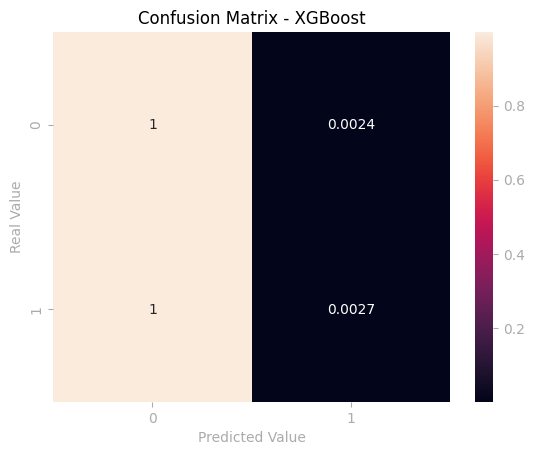

In [112]:
# final XGBoost model
xgb_iso = XGBClassifier(max_depth=1, learning_rate=0.01, n_estimators=300, gamma=5, min_child_weight=1)
xgb_iso.fit(X_iso, y_train_rus)

# prediction
X_test_xgb = scaler2.transform(X_iso_test)
y_pred_xgb = xgb_iso.predict(X_test_xgb)

# classification report
print(classification_report(y_test, y_pred_xgb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_xgb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - XGBoost')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      7524
           1       0.18      0.00      0.01      1476

    accuracy                           0.83      9000
   macro avg       0.51      0.50      0.46      9000
weighted avg       0.73      0.83      0.76      9000



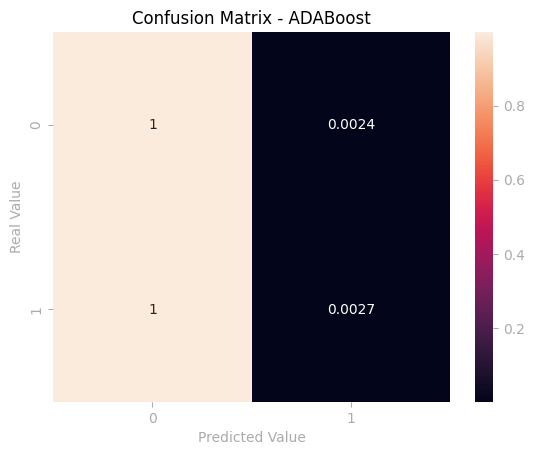

In [113]:
# final ADABOOST model
ada_iso = AdaBoostClassifier(learning_rate=0.1, n_estimators=50)
ada_iso.fit(X_iso, y_train_rus)

# prediction
X_test_ada = scaler2.transform(X_iso_test)
y_pred_ada = ada_iso.predict(X_test_ada)

# classification report
print(classification_report(y_test, y_pred_ada))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_ada, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - ADABoost')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      7524
           1       0.00      0.00      0.00      1476

    accuracy                           0.84      9000
   macro avg       0.42      0.50      0.46      9000
weighted avg       0.70      0.84      0.76      9000



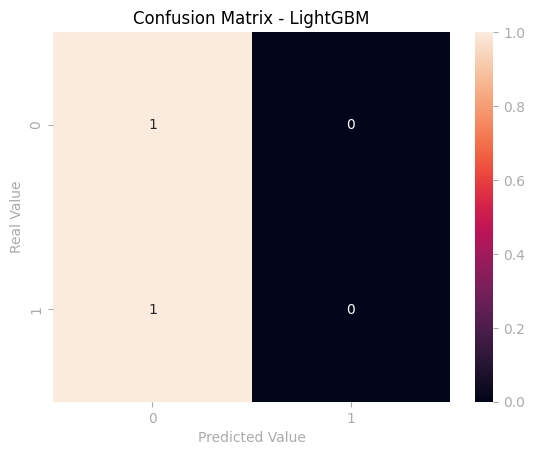

In [114]:
# final LightGBM model
lgb_iso = LGBMClassifier(num_leaves=20, max_depth=15, learning_rate=0.01, min_data_in_leaf=100)
lgb_iso.fit(X_iso, y_train_rus)

# prediction
X_test_lgb = scaler2.transform(X_iso_test)
y_pred_lgb = lgb_iso.predict(X_test_lgb)

# classification report
print(classification_report(y_test, y_pred_lgb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_lgb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - LightGBM')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      7524
           1       0.00      0.00      0.00      1476

    accuracy                           0.84      9000
   macro avg       0.42      0.50      0.46      9000
weighted avg       0.70      0.84      0.76      9000



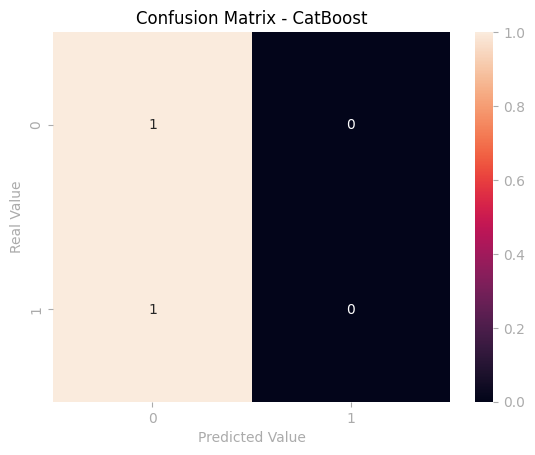

In [115]:
# final CatBoost model
cb_iso = CatBoostClassifier(learning_rate=0.03, depth=6, l2_leaf_reg=5, logging_level='Silent')
cb_iso.fit(X_iso, y_train_rus)

# prediction
X_test_cb = scaler2.transform(X_iso_test)
y_pred_cb = cb_iso.predict(X_test_cb)

# classification report
print(classification_report(y_test, y_pred_cb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_cb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - CatBoost')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

### F1 SCORE

In [116]:
# define the function val_model_iso_1
def val_model_iso_2(X, y, clf, show=True):
    """
    Apply cross-validation on the training set.

    # Arguments
        X: DataFrame containing the independent variables.
        y: Series containing the target vector.
        clf: Scikit-learn estimator instance.
        
    # Returns
        float, mean value of the cross-validation scores.
    """
    
    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='f1')

    if show == True:
        print(f'F1: {scores.mean()}, {scores.std()}')
    
    return scores.mean()

In [117]:
#evaluate the models
xgb_iso = XGBClassifier()
lgb_iso = LGBMClassifier()
cb_iso = CatBoostClassifier()
ada_iso = AdaBoostClassifier()

model = []
recall = []

for clf in (xgb_iso, lgb_iso, cb_iso, ada_iso):
    model.append(clf.__class__.__name__)
    recall.append(val_model_iso_2(X_iso, y_train_rus, clf, show=False))

pd.DataFrame(data=recall, index=model, columns=['f1'])

Learning rate set to 0.018279
0:	learn: 0.6920919	total: 7.32ms	remaining: 7.32s
1:	learn: 0.6911441	total: 13.8ms	remaining: 6.87s
2:	learn: 0.6902912	total: 20.8ms	remaining: 6.91s
3:	learn: 0.6893811	total: 27.3ms	remaining: 6.79s
4:	learn: 0.6884221	total: 34.1ms	remaining: 6.78s
5:	learn: 0.6877742	total: 40.9ms	remaining: 6.78s
6:	learn: 0.6869021	total: 47.8ms	remaining: 6.78s
7:	learn: 0.6860043	total: 55.5ms	remaining: 6.88s
8:	learn: 0.6852448	total: 62.4ms	remaining: 6.87s
9:	learn: 0.6844174	total: 69.9ms	remaining: 6.92s
10:	learn: 0.6836210	total: 76.9ms	remaining: 6.91s
11:	learn: 0.6827956	total: 84.3ms	remaining: 6.94s
12:	learn: 0.6819799	total: 91.4ms	remaining: 6.94s
13:	learn: 0.6812714	total: 98.8ms	remaining: 6.96s
14:	learn: 0.6805441	total: 106ms	remaining: 6.95s
15:	learn: 0.6798606	total: 113ms	remaining: 6.96s
16:	learn: 0.6790380	total: 120ms	remaining: 6.96s
17:	learn: 0.6783594	total: 128ms	remaining: 6.97s
18:	learn: 0.6777153	total: 135ms	remaining: 6.9

161:	learn: 0.6195189	total: 1.23s	remaining: 6.34s
162:	learn: 0.6190663	total: 1.23s	remaining: 6.33s
163:	learn: 0.6188308	total: 1.24s	remaining: 6.33s
164:	learn: 0.6185731	total: 1.25s	remaining: 6.32s
165:	learn: 0.6183175	total: 1.26s	remaining: 6.31s
166:	learn: 0.6180188	total: 1.26s	remaining: 6.31s
167:	learn: 0.6177767	total: 1.27s	remaining: 6.3s
168:	learn: 0.6175263	total: 1.28s	remaining: 6.29s
169:	learn: 0.6173261	total: 1.29s	remaining: 6.28s
170:	learn: 0.6170641	total: 1.29s	remaining: 6.27s
171:	learn: 0.6167959	total: 1.3s	remaining: 6.26s
172:	learn: 0.6164615	total: 1.31s	remaining: 6.25s
173:	learn: 0.6162626	total: 1.31s	remaining: 6.25s
174:	learn: 0.6160527	total: 1.32s	remaining: 6.24s
175:	learn: 0.6158402	total: 1.33s	remaining: 6.23s
176:	learn: 0.6156327	total: 1.34s	remaining: 6.22s
177:	learn: 0.6154609	total: 1.34s	remaining: 6.21s
178:	learn: 0.6152303	total: 1.35s	remaining: 6.21s
179:	learn: 0.6148450	total: 1.36s	remaining: 6.2s
180:	learn: 0.6

326:	learn: 0.5795697	total: 2.46s	remaining: 5.06s
327:	learn: 0.5792981	total: 2.47s	remaining: 5.05s
328:	learn: 0.5790730	total: 2.47s	remaining: 5.05s
329:	learn: 0.5788056	total: 2.48s	remaining: 5.04s
330:	learn: 0.5786422	total: 2.49s	remaining: 5.03s
331:	learn: 0.5784153	total: 2.5s	remaining: 5.03s
332:	learn: 0.5781814	total: 2.5s	remaining: 5.02s
333:	learn: 0.5780341	total: 2.51s	remaining: 5.01s
334:	learn: 0.5778328	total: 2.52s	remaining: 5s
335:	learn: 0.5775058	total: 2.53s	remaining: 5s
336:	learn: 0.5772220	total: 2.54s	remaining: 5s
337:	learn: 0.5771141	total: 2.55s	remaining: 4.99s
338:	learn: 0.5769402	total: 2.56s	remaining: 4.98s
339:	learn: 0.5767518	total: 2.56s	remaining: 4.97s
340:	learn: 0.5765437	total: 2.57s	remaining: 4.97s
341:	learn: 0.5763244	total: 2.58s	remaining: 4.96s
342:	learn: 0.5760644	total: 2.58s	remaining: 4.95s
343:	learn: 0.5757954	total: 2.59s	remaining: 4.94s
344:	learn: 0.5755797	total: 2.6s	remaining: 4.93s
345:	learn: 0.5752766	to

489:	learn: 0.5448489	total: 3.69s	remaining: 3.85s
490:	learn: 0.5446656	total: 3.7s	remaining: 3.84s
491:	learn: 0.5444144	total: 3.71s	remaining: 3.83s
492:	learn: 0.5442347	total: 3.72s	remaining: 3.82s
493:	learn: 0.5440179	total: 3.73s	remaining: 3.82s
494:	learn: 0.5438034	total: 3.73s	remaining: 3.81s
495:	learn: 0.5435935	total: 3.74s	remaining: 3.8s
496:	learn: 0.5433951	total: 3.75s	remaining: 3.79s
497:	learn: 0.5431086	total: 3.75s	remaining: 3.79s
498:	learn: 0.5428474	total: 3.76s	remaining: 3.78s
499:	learn: 0.5425574	total: 3.77s	remaining: 3.77s
500:	learn: 0.5423787	total: 3.78s	remaining: 3.76s
501:	learn: 0.5421916	total: 3.78s	remaining: 3.75s
502:	learn: 0.5420430	total: 3.79s	remaining: 3.75s
503:	learn: 0.5417503	total: 3.8s	remaining: 3.74s
504:	learn: 0.5415379	total: 3.81s	remaining: 3.73s
505:	learn: 0.5413532	total: 3.81s	remaining: 3.72s
506:	learn: 0.5411451	total: 3.82s	remaining: 3.71s
507:	learn: 0.5410184	total: 3.83s	remaining: 3.71s
508:	learn: 0.5

653:	learn: 0.5075971	total: 4.93s	remaining: 2.61s
654:	learn: 0.5073167	total: 4.94s	remaining: 2.6s
655:	learn: 0.5070102	total: 4.95s	remaining: 2.59s
656:	learn: 0.5067066	total: 4.95s	remaining: 2.59s
657:	learn: 0.5065297	total: 4.96s	remaining: 2.58s
658:	learn: 0.5062114	total: 4.97s	remaining: 2.57s
659:	learn: 0.5060949	total: 4.98s	remaining: 2.56s
660:	learn: 0.5058622	total: 4.98s	remaining: 2.56s
661:	learn: 0.5055821	total: 4.99s	remaining: 2.55s
662:	learn: 0.5052804	total: 5s	remaining: 2.54s
663:	learn: 0.5050457	total: 5.01s	remaining: 2.53s
664:	learn: 0.5048454	total: 5.01s	remaining: 2.53s
665:	learn: 0.5047449	total: 5.02s	remaining: 2.52s
666:	learn: 0.5044807	total: 5.03s	remaining: 2.51s
667:	learn: 0.5043056	total: 5.04s	remaining: 2.5s
668:	learn: 0.5040755	total: 5.04s	remaining: 2.5s
669:	learn: 0.5039245	total: 5.05s	remaining: 2.49s
670:	learn: 0.5037322	total: 5.06s	remaining: 2.48s
671:	learn: 0.5035109	total: 5.07s	remaining: 2.47s
672:	learn: 0.5033

818:	learn: 0.4720046	total: 6.18s	remaining: 1.36s
819:	learn: 0.4718066	total: 6.19s	remaining: 1.36s
820:	learn: 0.4716494	total: 6.2s	remaining: 1.35s
821:	learn: 0.4714747	total: 6.2s	remaining: 1.34s
822:	learn: 0.4712662	total: 6.21s	remaining: 1.34s
823:	learn: 0.4710747	total: 6.22s	remaining: 1.33s
824:	learn: 0.4708911	total: 6.23s	remaining: 1.32s
825:	learn: 0.4706729	total: 6.24s	remaining: 1.31s
826:	learn: 0.4705533	total: 6.24s	remaining: 1.3s
827:	learn: 0.4703938	total: 6.25s	remaining: 1.3s
828:	learn: 0.4701751	total: 6.26s	remaining: 1.29s
829:	learn: 0.4700643	total: 6.26s	remaining: 1.28s
830:	learn: 0.4698827	total: 6.27s	remaining: 1.27s
831:	learn: 0.4697091	total: 6.28s	remaining: 1.27s
832:	learn: 0.4695122	total: 6.29s	remaining: 1.26s
833:	learn: 0.4693023	total: 6.3s	remaining: 1.25s
834:	learn: 0.4691133	total: 6.3s	remaining: 1.25s
835:	learn: 0.4689230	total: 6.31s	remaining: 1.24s
836:	learn: 0.4687370	total: 6.32s	remaining: 1.23s
837:	learn: 0.4685

983:	learn: 0.4416673	total: 7.43s	remaining: 121ms
984:	learn: 0.4414974	total: 7.44s	remaining: 113ms
985:	learn: 0.4413972	total: 7.45s	remaining: 106ms
986:	learn: 0.4412180	total: 7.45s	remaining: 98.2ms
987:	learn: 0.4409820	total: 7.46s	remaining: 90.6ms
988:	learn: 0.4408210	total: 7.47s	remaining: 83.1ms
989:	learn: 0.4406297	total: 7.48s	remaining: 75.5ms
990:	learn: 0.4404347	total: 7.48s	remaining: 68ms
991:	learn: 0.4403025	total: 7.49s	remaining: 60.4ms
992:	learn: 0.4400575	total: 7.5s	remaining: 52.9ms
993:	learn: 0.4398336	total: 7.51s	remaining: 45.3ms
994:	learn: 0.4397043	total: 7.51s	remaining: 37.8ms
995:	learn: 0.4394913	total: 7.52s	remaining: 30.2ms
996:	learn: 0.4394451	total: 7.53s	remaining: 22.7ms
997:	learn: 0.4393373	total: 7.54s	remaining: 15.1ms
998:	learn: 0.4392366	total: 7.54s	remaining: 7.55ms
999:	learn: 0.4391288	total: 7.55s	remaining: 0us
Learning rate set to 0.018279
0:	learn: 0.6921700	total: 7.02ms	remaining: 7.02s
1:	learn: 0.6912754	total: 

162:	learn: 0.6247087	total: 1.21s	remaining: 6.22s
163:	learn: 0.6243409	total: 1.22s	remaining: 6.21s
164:	learn: 0.6240732	total: 1.23s	remaining: 6.21s
165:	learn: 0.6237560	total: 1.23s	remaining: 6.2s
166:	learn: 0.6235906	total: 1.24s	remaining: 6.2s
167:	learn: 0.6233395	total: 1.25s	remaining: 6.19s
168:	learn: 0.6231118	total: 1.26s	remaining: 6.19s
169:	learn: 0.6228260	total: 1.26s	remaining: 6.18s
170:	learn: 0.6224737	total: 1.27s	remaining: 6.17s
171:	learn: 0.6222607	total: 1.28s	remaining: 6.16s
172:	learn: 0.6219342	total: 1.29s	remaining: 6.15s
173:	learn: 0.6217135	total: 1.29s	remaining: 6.15s
174:	learn: 0.6213701	total: 1.3s	remaining: 6.14s
175:	learn: 0.6209973	total: 1.31s	remaining: 6.13s
176:	learn: 0.6207586	total: 1.32s	remaining: 6.12s
177:	learn: 0.6204859	total: 1.32s	remaining: 6.12s
178:	learn: 0.6202259	total: 1.33s	remaining: 6.11s
179:	learn: 0.6200007	total: 1.34s	remaining: 6.1s
180:	learn: 0.6197640	total: 1.35s	remaining: 6.09s
181:	learn: 0.61

348:	learn: 0.5809833	total: 2.62s	remaining: 4.89s
349:	learn: 0.5807640	total: 2.63s	remaining: 4.89s
350:	learn: 0.5804204	total: 2.64s	remaining: 4.88s
351:	learn: 0.5802480	total: 2.65s	remaining: 4.87s
352:	learn: 0.5799421	total: 2.66s	remaining: 4.87s
353:	learn: 0.5796396	total: 2.66s	remaining: 4.86s
354:	learn: 0.5793534	total: 2.67s	remaining: 4.85s
355:	learn: 0.5791353	total: 2.68s	remaining: 4.85s
356:	learn: 0.5788594	total: 2.69s	remaining: 4.84s
357:	learn: 0.5787126	total: 2.69s	remaining: 4.83s
358:	learn: 0.5785478	total: 2.7s	remaining: 4.82s
359:	learn: 0.5783105	total: 2.71s	remaining: 4.82s
360:	learn: 0.5781422	total: 2.72s	remaining: 4.81s
361:	learn: 0.5777562	total: 2.72s	remaining: 4.8s
362:	learn: 0.5774974	total: 2.73s	remaining: 4.79s
363:	learn: 0.5773070	total: 2.74s	remaining: 4.79s
364:	learn: 0.5771764	total: 2.75s	remaining: 4.78s
365:	learn: 0.5770833	total: 2.75s	remaining: 4.77s
366:	learn: 0.5768365	total: 2.76s	remaining: 4.76s
367:	learn: 0.

508:	learn: 0.5475219	total: 3.83s	remaining: 3.7s
509:	learn: 0.5473848	total: 3.84s	remaining: 3.69s
510:	learn: 0.5470839	total: 3.85s	remaining: 3.69s
511:	learn: 0.5468480	total: 3.86s	remaining: 3.68s
512:	learn: 0.5466262	total: 3.87s	remaining: 3.67s
513:	learn: 0.5463915	total: 3.87s	remaining: 3.66s
514:	learn: 0.5461355	total: 3.88s	remaining: 3.65s
515:	learn: 0.5459017	total: 3.89s	remaining: 3.65s
516:	learn: 0.5455834	total: 3.9s	remaining: 3.64s
517:	learn: 0.5453814	total: 3.9s	remaining: 3.63s
518:	learn: 0.5452069	total: 3.91s	remaining: 3.62s
519:	learn: 0.5450656	total: 3.92s	remaining: 3.62s
520:	learn: 0.5448694	total: 3.92s	remaining: 3.61s
521:	learn: 0.5446840	total: 3.93s	remaining: 3.6s
522:	learn: 0.5443945	total: 3.94s	remaining: 3.59s
523:	learn: 0.5442462	total: 3.95s	remaining: 3.58s
524:	learn: 0.5439852	total: 3.95s	remaining: 3.58s
525:	learn: 0.5438362	total: 3.96s	remaining: 3.57s
526:	learn: 0.5435994	total: 3.97s	remaining: 3.56s
527:	learn: 0.54

672:	learn: 0.5113968	total: 5.05s	remaining: 2.45s
673:	learn: 0.5111693	total: 5.06s	remaining: 2.45s
674:	learn: 0.5109715	total: 5.07s	remaining: 2.44s
675:	learn: 0.5107019	total: 5.08s	remaining: 2.43s
676:	learn: 0.5105101	total: 5.08s	remaining: 2.42s
677:	learn: 0.5104169	total: 5.09s	remaining: 2.42s
678:	learn: 0.5102750	total: 5.1s	remaining: 2.41s
679:	learn: 0.5101150	total: 5.11s	remaining: 2.4s
680:	learn: 0.5099150	total: 5.11s	remaining: 2.4s
681:	learn: 0.5097746	total: 5.12s	remaining: 2.39s
682:	learn: 0.5094532	total: 5.13s	remaining: 2.38s
683:	learn: 0.5092642	total: 5.13s	remaining: 2.37s
684:	learn: 0.5089878	total: 5.14s	remaining: 2.37s
685:	learn: 0.5087407	total: 5.15s	remaining: 2.36s
686:	learn: 0.5084649	total: 5.16s	remaining: 2.35s
687:	learn: 0.5081880	total: 5.17s	remaining: 2.34s
688:	learn: 0.5079774	total: 5.17s	remaining: 2.33s
689:	learn: 0.5076743	total: 5.18s	remaining: 2.33s
690:	learn: 0.5074935	total: 5.19s	remaining: 2.32s
691:	learn: 0.5

838:	learn: 0.4772573	total: 6.3s	remaining: 1.21s
839:	learn: 0.4770817	total: 6.31s	remaining: 1.2s
840:	learn: 0.4769159	total: 6.32s	remaining: 1.19s
841:	learn: 0.4766654	total: 6.32s	remaining: 1.19s
842:	learn: 0.4764621	total: 6.35s	remaining: 1.18s
843:	learn: 0.4762121	total: 6.36s	remaining: 1.18s
844:	learn: 0.4760359	total: 6.37s	remaining: 1.17s
845:	learn: 0.4757702	total: 6.38s	remaining: 1.16s
846:	learn: 0.4756432	total: 6.39s	remaining: 1.15s
847:	learn: 0.4754015	total: 6.39s	remaining: 1.15s
848:	learn: 0.4752267	total: 6.4s	remaining: 1.14s
849:	learn: 0.4749545	total: 6.41s	remaining: 1.13s
850:	learn: 0.4748133	total: 6.42s	remaining: 1.12s
851:	learn: 0.4746269	total: 6.42s	remaining: 1.12s
852:	learn: 0.4744039	total: 6.43s	remaining: 1.11s
853:	learn: 0.4742257	total: 6.44s	remaining: 1.1s
854:	learn: 0.4739761	total: 6.45s	remaining: 1.09s
855:	learn: 0.4738479	total: 6.45s	remaining: 1.08s
856:	learn: 0.4737115	total: 6.46s	remaining: 1.08s
857:	learn: 0.47

9:	learn: 0.6844323	total: 72.3ms	remaining: 7.16s
10:	learn: 0.6837059	total: 79.7ms	remaining: 7.16s
11:	learn: 0.6829167	total: 88.3ms	remaining: 7.27s
12:	learn: 0.6821405	total: 96.4ms	remaining: 7.32s
13:	learn: 0.6813141	total: 104ms	remaining: 7.35s
14:	learn: 0.6803710	total: 111ms	remaining: 7.31s
15:	learn: 0.6796562	total: 119ms	remaining: 7.31s
16:	learn: 0.6789061	total: 126ms	remaining: 7.29s
17:	learn: 0.6780315	total: 134ms	remaining: 7.28s
18:	learn: 0.6774745	total: 141ms	remaining: 7.26s
19:	learn: 0.6768357	total: 148ms	remaining: 7.25s
20:	learn: 0.6762683	total: 155ms	remaining: 7.22s
21:	learn: 0.6756452	total: 162ms	remaining: 7.21s
22:	learn: 0.6750770	total: 169ms	remaining: 7.2s
23:	learn: 0.6743270	total: 177ms	remaining: 7.21s
24:	learn: 0.6736757	total: 185ms	remaining: 7.23s
25:	learn: 0.6728006	total: 193ms	remaining: 7.23s
26:	learn: 0.6721297	total: 200ms	remaining: 7.22s
27:	learn: 0.6715493	total: 208ms	remaining: 7.22s
28:	learn: 0.6708487	total: 2

196:	learn: 0.6100457	total: 1.49s	remaining: 6.07s
197:	learn: 0.6097125	total: 1.5s	remaining: 6.07s
198:	learn: 0.6094901	total: 1.5s	remaining: 6.06s
199:	learn: 0.6092954	total: 1.51s	remaining: 6.05s
200:	learn: 0.6090377	total: 1.52s	remaining: 6.05s
201:	learn: 0.6088054	total: 1.53s	remaining: 6.04s
202:	learn: 0.6086074	total: 1.54s	remaining: 6.03s
203:	learn: 0.6083587	total: 1.54s	remaining: 6.03s
204:	learn: 0.6080764	total: 1.55s	remaining: 6.02s
205:	learn: 0.6077798	total: 1.56s	remaining: 6.01s
206:	learn: 0.6074955	total: 1.57s	remaining: 6s
207:	learn: 0.6072052	total: 1.57s	remaining: 6s
208:	learn: 0.6070038	total: 1.58s	remaining: 5.99s
209:	learn: 0.6067906	total: 1.59s	remaining: 5.98s
210:	learn: 0.6066245	total: 1.6s	remaining: 5.97s
211:	learn: 0.6063773	total: 1.6s	remaining: 5.96s
212:	learn: 0.6062391	total: 1.61s	remaining: 5.96s
213:	learn: 0.6059567	total: 1.62s	remaining: 5.95s
214:	learn: 0.6057054	total: 1.63s	remaining: 5.94s
215:	learn: 0.6054623	

360:	learn: 0.5725218	total: 2.74s	remaining: 4.85s
361:	learn: 0.5722938	total: 2.75s	remaining: 4.84s
362:	learn: 0.5720537	total: 2.76s	remaining: 4.84s
363:	learn: 0.5717841	total: 2.77s	remaining: 4.83s
364:	learn: 0.5715706	total: 2.77s	remaining: 4.83s
365:	learn: 0.5714671	total: 2.78s	remaining: 4.82s
366:	learn: 0.5712857	total: 2.79s	remaining: 4.82s
367:	learn: 0.5710346	total: 2.8s	remaining: 4.81s
368:	learn: 0.5708562	total: 2.81s	remaining: 4.8s
369:	learn: 0.5706919	total: 2.81s	remaining: 4.79s
370:	learn: 0.5704840	total: 2.82s	remaining: 4.79s
371:	learn: 0.5701918	total: 2.83s	remaining: 4.78s
372:	learn: 0.5699361	total: 2.84s	remaining: 4.77s
373:	learn: 0.5697663	total: 2.85s	remaining: 4.76s
374:	learn: 0.5695316	total: 2.86s	remaining: 4.76s
375:	learn: 0.5693517	total: 2.86s	remaining: 4.75s
376:	learn: 0.5690467	total: 2.87s	remaining: 4.75s
377:	learn: 0.5689564	total: 2.88s	remaining: 4.74s
378:	learn: 0.5687248	total: 2.89s	remaining: 4.73s
379:	learn: 0.

536:	learn: 0.5359620	total: 4.16s	remaining: 3.58s
537:	learn: 0.5357415	total: 4.17s	remaining: 3.58s
538:	learn: 0.5355637	total: 4.17s	remaining: 3.57s
539:	learn: 0.5352905	total: 4.18s	remaining: 3.56s
540:	learn: 0.5351345	total: 4.19s	remaining: 3.55s
541:	learn: 0.5349139	total: 4.2s	remaining: 3.55s
542:	learn: 0.5346623	total: 4.21s	remaining: 3.54s
543:	learn: 0.5344030	total: 4.21s	remaining: 3.53s
544:	learn: 0.5341486	total: 4.22s	remaining: 3.52s
545:	learn: 0.5338428	total: 4.23s	remaining: 3.52s
546:	learn: 0.5337122	total: 4.24s	remaining: 3.51s
547:	learn: 0.5334136	total: 4.24s	remaining: 3.5s
548:	learn: 0.5331833	total: 4.25s	remaining: 3.49s
549:	learn: 0.5328948	total: 4.26s	remaining: 3.48s
550:	learn: 0.5326507	total: 4.26s	remaining: 3.48s
551:	learn: 0.5324321	total: 4.27s	remaining: 3.47s
552:	learn: 0.5322127	total: 4.28s	remaining: 3.46s
553:	learn: 0.5320303	total: 4.29s	remaining: 3.45s
554:	learn: 0.5319399	total: 4.29s	remaining: 3.44s
555:	learn: 0.

700:	learn: 0.4990574	total: 5.42s	remaining: 2.31s
701:	learn: 0.4988708	total: 5.42s	remaining: 2.3s
702:	learn: 0.4986962	total: 5.43s	remaining: 2.29s
703:	learn: 0.4985158	total: 5.44s	remaining: 2.29s
704:	learn: 0.4982510	total: 5.45s	remaining: 2.28s
705:	learn: 0.4980355	total: 5.46s	remaining: 2.27s
706:	learn: 0.4978573	total: 5.46s	remaining: 2.27s
707:	learn: 0.4977255	total: 5.47s	remaining: 2.26s
708:	learn: 0.4975001	total: 5.48s	remaining: 2.25s
709:	learn: 0.4973319	total: 5.49s	remaining: 2.24s
710:	learn: 0.4971585	total: 5.5s	remaining: 2.23s
711:	learn: 0.4968980	total: 5.5s	remaining: 2.23s
712:	learn: 0.4967331	total: 5.51s	remaining: 2.22s
713:	learn: 0.4965651	total: 5.52s	remaining: 2.21s
714:	learn: 0.4964031	total: 5.53s	remaining: 2.2s
715:	learn: 0.4961801	total: 5.53s	remaining: 2.19s
716:	learn: 0.4960648	total: 5.54s	remaining: 2.19s
717:	learn: 0.4957845	total: 5.55s	remaining: 2.18s
718:	learn: 0.4956163	total: 5.55s	remaining: 2.17s
719:	learn: 0.49

865:	learn: 0.4666387	total: 6.66s	remaining: 1.03s
866:	learn: 0.4665111	total: 6.66s	remaining: 1.02s
867:	learn: 0.4663185	total: 6.67s	remaining: 1.01s
868:	learn: 0.4661546	total: 6.68s	remaining: 1.01s
869:	learn: 0.4659168	total: 6.69s	remaining: 1000ms
870:	learn: 0.4657311	total: 6.7s	remaining: 992ms
871:	learn: 0.4654648	total: 6.7s	remaining: 984ms
872:	learn: 0.4653014	total: 6.71s	remaining: 976ms
873:	learn: 0.4651608	total: 6.72s	remaining: 969ms
874:	learn: 0.4649313	total: 6.73s	remaining: 961ms
875:	learn: 0.4647077	total: 6.74s	remaining: 953ms
876:	learn: 0.4644975	total: 6.74s	remaining: 946ms
877:	learn: 0.4642592	total: 6.75s	remaining: 938ms
878:	learn: 0.4641005	total: 6.76s	remaining: 930ms
879:	learn: 0.4638679	total: 6.76s	remaining: 923ms
880:	learn: 0.4637279	total: 6.77s	remaining: 915ms
881:	learn: 0.4635561	total: 6.78s	remaining: 907ms
882:	learn: 0.4633816	total: 6.79s	remaining: 899ms
883:	learn: 0.4632688	total: 6.79s	remaining: 892ms
884:	learn: 0

39:	learn: 0.6640219	total: 306ms	remaining: 7.34s
40:	learn: 0.6633945	total: 315ms	remaining: 7.36s
41:	learn: 0.6628411	total: 324ms	remaining: 7.38s
42:	learn: 0.6622901	total: 332ms	remaining: 7.4s
43:	learn: 0.6618385	total: 341ms	remaining: 7.42s
44:	learn: 0.6613320	total: 349ms	remaining: 7.41s
45:	learn: 0.6607844	total: 357ms	remaining: 7.4s
46:	learn: 0.6603070	total: 364ms	remaining: 7.39s
47:	learn: 0.6597861	total: 372ms	remaining: 7.38s
48:	learn: 0.6593820	total: 380ms	remaining: 7.37s
49:	learn: 0.6588573	total: 387ms	remaining: 7.36s
50:	learn: 0.6583783	total: 395ms	remaining: 7.35s
51:	learn: 0.6578883	total: 402ms	remaining: 7.33s
52:	learn: 0.6575760	total: 410ms	remaining: 7.32s
53:	learn: 0.6570254	total: 417ms	remaining: 7.3s
54:	learn: 0.6566607	total: 424ms	remaining: 7.28s
55:	learn: 0.6562072	total: 432ms	remaining: 7.29s
56:	learn: 0.6558164	total: 441ms	remaining: 7.3s
57:	learn: 0.6553004	total: 449ms	remaining: 7.29s
58:	learn: 0.6549602	total: 457ms	r

223:	learn: 0.6043818	total: 1.74s	remaining: 6.03s
224:	learn: 0.6041099	total: 1.75s	remaining: 6.03s
225:	learn: 0.6038733	total: 1.76s	remaining: 6.02s
226:	learn: 0.6035379	total: 1.77s	remaining: 6.02s
227:	learn: 0.6033581	total: 1.77s	remaining: 6.01s
228:	learn: 0.6032157	total: 1.78s	remaining: 6s
229:	learn: 0.6028428	total: 1.79s	remaining: 6s
230:	learn: 0.6025444	total: 1.8s	remaining: 5.99s
231:	learn: 0.6022522	total: 1.81s	remaining: 5.98s
232:	learn: 0.6021434	total: 1.81s	remaining: 5.97s
233:	learn: 0.6018316	total: 1.82s	remaining: 5.96s
234:	learn: 0.6016301	total: 1.83s	remaining: 5.96s
235:	learn: 0.6014732	total: 1.84s	remaining: 5.95s
236:	learn: 0.6012118	total: 1.84s	remaining: 5.94s
237:	learn: 0.6009890	total: 1.85s	remaining: 5.93s
238:	learn: 0.6006819	total: 1.86s	remaining: 5.92s
239:	learn: 0.6004931	total: 1.87s	remaining: 5.91s
240:	learn: 0.6003388	total: 1.87s	remaining: 5.9s
241:	learn: 0.6001098	total: 1.88s	remaining: 5.9s
242:	learn: 0.5999787

398:	learn: 0.5664596	total: 3.21s	remaining: 4.83s
399:	learn: 0.5662569	total: 3.22s	remaining: 4.82s
400:	learn: 0.5660542	total: 3.22s	remaining: 4.82s
401:	learn: 0.5659132	total: 3.23s	remaining: 4.81s
402:	learn: 0.5657394	total: 3.24s	remaining: 4.8s
403:	learn: 0.5654737	total: 3.25s	remaining: 4.79s
404:	learn: 0.5652661	total: 3.25s	remaining: 4.78s
405:	learn: 0.5651001	total: 3.26s	remaining: 4.77s
406:	learn: 0.5648860	total: 3.27s	remaining: 4.76s
407:	learn: 0.5646227	total: 3.28s	remaining: 4.76s
408:	learn: 0.5644513	total: 3.29s	remaining: 4.75s
409:	learn: 0.5642000	total: 3.29s	remaining: 4.74s
410:	learn: 0.5639266	total: 3.3s	remaining: 4.73s
411:	learn: 0.5637351	total: 3.31s	remaining: 4.72s
412:	learn: 0.5636175	total: 3.31s	remaining: 4.71s
413:	learn: 0.5634121	total: 3.32s	remaining: 4.7s
414:	learn: 0.5631917	total: 3.33s	remaining: 4.69s
415:	learn: 0.5629443	total: 3.34s	remaining: 4.68s
416:	learn: 0.5626705	total: 3.34s	remaining: 4.67s
417:	learn: 0.5

558:	learn: 0.5314380	total: 4.44s	remaining: 3.5s
559:	learn: 0.5312571	total: 4.45s	remaining: 3.49s
560:	learn: 0.5310024	total: 4.45s	remaining: 3.48s
561:	learn: 0.5308324	total: 4.46s	remaining: 3.48s
562:	learn: 0.5306319	total: 4.47s	remaining: 3.47s
563:	learn: 0.5303452	total: 4.48s	remaining: 3.46s
564:	learn: 0.5300712	total: 4.49s	remaining: 3.45s
565:	learn: 0.5298787	total: 4.49s	remaining: 3.44s
566:	learn: 0.5296948	total: 4.5s	remaining: 3.44s
567:	learn: 0.5293816	total: 4.51s	remaining: 3.43s
568:	learn: 0.5291954	total: 4.51s	remaining: 3.42s
569:	learn: 0.5290028	total: 4.52s	remaining: 3.41s
570:	learn: 0.5286971	total: 4.53s	remaining: 3.4s
571:	learn: 0.5284603	total: 4.54s	remaining: 3.4s
572:	learn: 0.5283104	total: 4.54s	remaining: 3.39s
573:	learn: 0.5281190	total: 4.55s	remaining: 3.38s
574:	learn: 0.5279078	total: 4.56s	remaining: 3.37s
575:	learn: 0.5277002	total: 4.57s	remaining: 3.36s
576:	learn: 0.5275869	total: 4.58s	remaining: 3.35s
577:	learn: 0.52

718:	learn: 0.4948169	total: 5.68s	remaining: 2.22s
719:	learn: 0.4945771	total: 5.69s	remaining: 2.21s
720:	learn: 0.4943890	total: 5.7s	remaining: 2.2s
721:	learn: 0.4941514	total: 5.7s	remaining: 2.2s
722:	learn: 0.4939240	total: 5.71s	remaining: 2.19s
723:	learn: 0.4937355	total: 5.72s	remaining: 2.18s
724:	learn: 0.4934789	total: 5.73s	remaining: 2.17s
725:	learn: 0.4933570	total: 5.74s	remaining: 2.16s
726:	learn: 0.4930287	total: 5.74s	remaining: 2.16s
727:	learn: 0.4927716	total: 5.75s	remaining: 2.15s
728:	learn: 0.4926151	total: 5.76s	remaining: 2.14s
729:	learn: 0.4923969	total: 5.77s	remaining: 2.13s
730:	learn: 0.4920860	total: 5.77s	remaining: 2.12s
731:	learn: 0.4918808	total: 5.78s	remaining: 2.12s
732:	learn: 0.4917032	total: 5.79s	remaining: 2.11s
733:	learn: 0.4915704	total: 5.8s	remaining: 2.1s
734:	learn: 0.4914134	total: 5.81s	remaining: 2.09s
735:	learn: 0.4912356	total: 5.81s	remaining: 2.08s
736:	learn: 0.4910160	total: 5.82s	remaining: 2.08s
737:	learn: 0.4908

902:	learn: 0.4575446	total: 7.1s	remaining: 763ms
903:	learn: 0.4572876	total: 7.11s	remaining: 755ms
904:	learn: 0.4570716	total: 7.12s	remaining: 748ms
905:	learn: 0.4568935	total: 7.13s	remaining: 740ms
906:	learn: 0.4566401	total: 7.14s	remaining: 732ms
907:	learn: 0.4564312	total: 7.14s	remaining: 724ms
908:	learn: 0.4562573	total: 7.15s	remaining: 716ms
909:	learn: 0.4560797	total: 7.16s	remaining: 708ms
910:	learn: 0.4559227	total: 7.17s	remaining: 700ms
911:	learn: 0.4557371	total: 7.18s	remaining: 692ms
912:	learn: 0.4554739	total: 7.18s	remaining: 685ms
913:	learn: 0.4552022	total: 7.19s	remaining: 677ms
914:	learn: 0.4549951	total: 7.2s	remaining: 669ms
915:	learn: 0.4547963	total: 7.21s	remaining: 661ms
916:	learn: 0.4545240	total: 7.21s	remaining: 653ms
917:	learn: 0.4543814	total: 7.22s	remaining: 645ms
918:	learn: 0.4541661	total: 7.23s	remaining: 637ms
919:	learn: 0.4539380	total: 7.24s	remaining: 629ms
920:	learn: 0.4537344	total: 7.24s	remaining: 621ms
921:	learn: 0.

80:	learn: 0.6429544	total: 607ms	remaining: 6.88s
81:	learn: 0.6424495	total: 615ms	remaining: 6.88s
82:	learn: 0.6419654	total: 623ms	remaining: 6.88s
83:	learn: 0.6415756	total: 631ms	remaining: 6.88s
84:	learn: 0.6411835	total: 640ms	remaining: 6.89s
85:	learn: 0.6408520	total: 648ms	remaining: 6.88s
86:	learn: 0.6404575	total: 655ms	remaining: 6.87s
87:	learn: 0.6400412	total: 662ms	remaining: 6.86s
88:	learn: 0.6396130	total: 669ms	remaining: 6.85s
89:	learn: 0.6393437	total: 677ms	remaining: 6.84s
90:	learn: 0.6390838	total: 684ms	remaining: 6.83s
91:	learn: 0.6388178	total: 691ms	remaining: 6.82s
92:	learn: 0.6383282	total: 698ms	remaining: 6.81s
93:	learn: 0.6380953	total: 705ms	remaining: 6.8s
94:	learn: 0.6377005	total: 713ms	remaining: 6.79s
95:	learn: 0.6373543	total: 720ms	remaining: 6.78s
96:	learn: 0.6369622	total: 727ms	remaining: 6.77s
97:	learn: 0.6365997	total: 734ms	remaining: 6.75s
98:	learn: 0.6363247	total: 741ms	remaining: 6.74s
99:	learn: 0.6358922	total: 748m

243:	learn: 0.5964622	total: 1.86s	remaining: 5.77s
244:	learn: 0.5961104	total: 1.87s	remaining: 5.77s
245:	learn: 0.5956980	total: 1.88s	remaining: 5.76s
246:	learn: 0.5955218	total: 1.89s	remaining: 5.76s
247:	learn: 0.5952567	total: 1.9s	remaining: 5.75s
248:	learn: 0.5950724	total: 1.9s	remaining: 5.74s
249:	learn: 0.5948976	total: 1.91s	remaining: 5.73s
250:	learn: 0.5947177	total: 1.92s	remaining: 5.72s
251:	learn: 0.5943116	total: 1.93s	remaining: 5.72s
252:	learn: 0.5941611	total: 1.93s	remaining: 5.71s
253:	learn: 0.5939557	total: 1.94s	remaining: 5.7s
254:	learn: 0.5935221	total: 1.95s	remaining: 5.69s
255:	learn: 0.5932942	total: 1.96s	remaining: 5.68s
256:	learn: 0.5930477	total: 1.96s	remaining: 5.67s
257:	learn: 0.5928002	total: 1.97s	remaining: 5.67s
258:	learn: 0.5926220	total: 1.98s	remaining: 5.66s
259:	learn: 0.5923469	total: 1.99s	remaining: 5.65s
260:	learn: 0.5921549	total: 1.99s	remaining: 5.64s
261:	learn: 0.5920183	total: 2s	remaining: 5.64s
262:	learn: 0.5918

405:	learn: 0.5614799	total: 3.1s	remaining: 4.54s
406:	learn: 0.5612582	total: 3.11s	remaining: 4.53s
407:	learn: 0.5610619	total: 3.12s	remaining: 4.52s
408:	learn: 0.5609216	total: 3.12s	remaining: 4.51s
409:	learn: 0.5607439	total: 3.13s	remaining: 4.51s
410:	learn: 0.5605805	total: 3.14s	remaining: 4.5s
411:	learn: 0.5603163	total: 3.15s	remaining: 4.49s
412:	learn: 0.5601869	total: 3.15s	remaining: 4.49s
413:	learn: 0.5599676	total: 3.16s	remaining: 4.48s
414:	learn: 0.5596891	total: 3.17s	remaining: 4.47s
415:	learn: 0.5593846	total: 3.18s	remaining: 4.46s
416:	learn: 0.5591931	total: 3.19s	remaining: 4.45s
417:	learn: 0.5589326	total: 3.19s	remaining: 4.45s
418:	learn: 0.5587379	total: 3.2s	remaining: 4.44s
419:	learn: 0.5585318	total: 3.21s	remaining: 4.43s
420:	learn: 0.5583272	total: 3.22s	remaining: 4.42s
421:	learn: 0.5581850	total: 3.22s	remaining: 4.42s
422:	learn: 0.5580190	total: 3.23s	remaining: 4.41s
423:	learn: 0.5578255	total: 3.24s	remaining: 4.4s
424:	learn: 0.55

566:	learn: 0.5254055	total: 4.33s	remaining: 3.31s
567:	learn: 0.5252595	total: 4.34s	remaining: 3.3s
568:	learn: 0.5249543	total: 4.34s	remaining: 3.29s
569:	learn: 0.5247081	total: 4.35s	remaining: 3.28s
570:	learn: 0.5244693	total: 4.36s	remaining: 3.28s
571:	learn: 0.5242845	total: 4.37s	remaining: 3.27s
572:	learn: 0.5240066	total: 4.38s	remaining: 3.26s
573:	learn: 0.5238561	total: 4.38s	remaining: 3.25s
574:	learn: 0.5235831	total: 4.39s	remaining: 3.25s
575:	learn: 0.5233609	total: 4.4s	remaining: 3.24s
576:	learn: 0.5231276	total: 4.41s	remaining: 3.23s
577:	learn: 0.5228705	total: 4.41s	remaining: 3.22s
578:	learn: 0.5227140	total: 4.42s	remaining: 3.21s
579:	learn: 0.5225015	total: 4.43s	remaining: 3.21s
580:	learn: 0.5223702	total: 4.43s	remaining: 3.2s
581:	learn: 0.5221037	total: 4.44s	remaining: 3.19s
582:	learn: 0.5218309	total: 4.45s	remaining: 3.18s
583:	learn: 0.5215668	total: 4.46s	remaining: 3.17s
584:	learn: 0.5214087	total: 4.46s	remaining: 3.17s
585:	learn: 0.5

730:	learn: 0.4880871	total: 5.57s	remaining: 2.05s
731:	learn: 0.4878894	total: 5.58s	remaining: 2.04s
732:	learn: 0.4877022	total: 5.58s	remaining: 2.03s
733:	learn: 0.4875756	total: 5.59s	remaining: 2.03s
734:	learn: 0.4874070	total: 5.6s	remaining: 2.02s
735:	learn: 0.4871632	total: 5.61s	remaining: 2.01s
736:	learn: 0.4869992	total: 5.62s	remaining: 2s
737:	learn: 0.4868818	total: 5.63s	remaining: 2s
738:	learn: 0.4866249	total: 5.63s	remaining: 1.99s
739:	learn: 0.4864539	total: 5.64s	remaining: 1.98s
740:	learn: 0.4863102	total: 5.65s	remaining: 1.97s
741:	learn: 0.4861062	total: 5.66s	remaining: 1.97s
742:	learn: 0.4859917	total: 5.66s	remaining: 1.96s
743:	learn: 0.4858157	total: 5.67s	remaining: 1.95s
744:	learn: 0.4856228	total: 5.68s	remaining: 1.94s
745:	learn: 0.4854441	total: 5.69s	remaining: 1.94s
746:	learn: 0.4852206	total: 5.69s	remaining: 1.93s
747:	learn: 0.4850340	total: 5.7s	remaining: 1.92s
748:	learn: 0.4848769	total: 5.71s	remaining: 1.91s
749:	learn: 0.484625

891:	learn: 0.4554826	total: 6.79s	remaining: 822ms
892:	learn: 0.4553181	total: 6.8s	remaining: 815ms
893:	learn: 0.4551399	total: 6.81s	remaining: 807ms
894:	learn: 0.4548695	total: 6.82s	remaining: 800ms
895:	learn: 0.4546799	total: 6.82s	remaining: 792ms
896:	learn: 0.4545559	total: 6.83s	remaining: 784ms
897:	learn: 0.4543848	total: 6.84s	remaining: 777ms
898:	learn: 0.4543024	total: 6.85s	remaining: 769ms
899:	learn: 0.4542147	total: 6.85s	remaining: 761ms
900:	learn: 0.4539635	total: 6.86s	remaining: 754ms
901:	learn: 0.4537170	total: 6.87s	remaining: 746ms
902:	learn: 0.4533885	total: 6.88s	remaining: 739ms
903:	learn: 0.4532149	total: 6.88s	remaining: 731ms
904:	learn: 0.4529686	total: 6.89s	remaining: 723ms
905:	learn: 0.4527726	total: 6.9s	remaining: 716ms
906:	learn: 0.4526072	total: 6.9s	remaining: 708ms
907:	learn: 0.4525056	total: 6.91s	remaining: 700ms
908:	learn: 0.4522840	total: 6.92s	remaining: 693ms
909:	learn: 0.4520047	total: 6.92s	remaining: 685ms
910:	learn: 0.4

,f1
XGBClassifier,0.532177
LGBMClassifier,0.549498
CatBoostClassifier,0.554736
AdaBoostClassifier,0.562477


In [118]:
# XGBoost
xgb_iso = XGBClassifier()

# parameter to be searched
param_grid = {'n_estimators': range(0,1000,50)}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb_iso, param_grid, scoring="f1", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.5482339248270901 for {'n_estimators': 600}


In [119]:
# XGBoost
xgb_iso = XGBClassifier(n_estimators=50)

# parameter to be searched
param_grid = {'max_depth': [1, 3, 5],
              'min_child_weight': [1, 3, 6]}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb_iso, param_grid, scoring="f1", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.5901675252994286 for {'max_depth': 1, 'min_child_weight': 3}


In [120]:
# XGBoost
xgb_iso = XGBClassifier(n_estimators=50, max_depth=3, min_child_weight=6)

# parameter to be searched
param_grid = {'gamma': [0, 1, 5]}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb_iso, param_grid, scoring="f1", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.5713437539169282 for {'gamma': 5}


In [121]:
# XGBoost
xgb_iso = XGBClassifier(n_estimators=50, max_depth=3, min_child_weight=6, gamma=1)

# parameter to be searched
param_grid = {'learning_rate': [0.0001, 0.001, 0.01, 0.1]}

# find the best parameter
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb_iso, param_grid, scoring='f1', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.5803154797319988 for {'learning_rate': 0.001}


In [122]:
# ADABOOST
ada_iso = AdaBoostClassifier()

# parameter to be searched
param_grid = {'n_estimators': range(0,1000,50)}

# find the best parameter   
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(ada_iso, param_grid, scoring="f1", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.5645937518539018 for {'n_estimators': 50}


In [123]:
# ADABOOST
ada_iso = AdaBoostClassifier(n_estimators=50)

# parameter to be searched
param_grid = {'learning_rate': [0.0001, 0.001, 0.01, 0.1]}

# find the best parameter
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(ada_iso, param_grid, scoring='f1', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

Best result: 0.5787349002384956 for {'learning_rate': 0.1}


In [124]:
# LightGBM
lbg_iso = LGBMClassifier(silent=False)

# parameter to be searched
param_grid = {"max_depth": np.arange(5, 75, 10),
              "learning_rate" : [0.001, 0.01, 0.1],
              "num_leaves": np.arange(20, 220, 50),
             }

# find the best parameter            
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(lbg_iso, param_grid, scoring="f1", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

[LightGBM] [Info] Number of positive: 2394, number of negative: 2394
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6375
[LightGBM] [Info] Number of data points in the train set: 4788, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best result: 0.5792903567932495 for {'learning_rate': 0.01, 'max_depth': 15, 'num_leaves': 20}


In [125]:
lbg_iso = LGBMClassifier(learning_rate=0.01, max_depth=5, num_leaves=50, silent=False)

# parameter to be searched
param_grid = {'min_data_in_leaf': np.arange(100, 1000, 100)}

# find the best parameter            
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(lbg_iso, param_grid, scoring="f1", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Info] Number of positive: 2394, number of negative: 2394
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6375
[LightGBM] [Info] Number of data points in the train set: 4788, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [126]:
# CatBoost
cb_iso = CatBoostClassifier()

# parameter to be searched
param_grid = {'depth': [6, 8, 10],
              'learning_rate': [0.03, 0.1],
              'l2_leaf_reg': [1, 5, 10],
             }

# find the best parameter            
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(cb_iso, param_grid, scoring="precision", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_iso, y_train_rus)

print(f'Best result: {grid_result.best_score_} for {grid_result.best_params_}')

0:	learn: 0.6916386	total: 9.09ms	remaining: 9.08s
1:	learn: 0.6902380	total: 16.6ms	remaining: 8.27s
2:	learn: 0.6889342	total: 24ms	remaining: 7.98s
3:	learn: 0.6877075	total: 31.7ms	remaining: 7.89s
4:	learn: 0.6861822	total: 39.5ms	remaining: 7.85s
5:	learn: 0.6850271	total: 48.3ms	remaining: 7.99s
6:	learn: 0.6840341	total: 56.3ms	remaining: 7.98s
7:	learn: 0.6829941	total: 64.3ms	remaining: 7.97s
8:	learn: 0.6817196	total: 72.1ms	remaining: 7.93s
9:	learn: 0.6802816	total: 80.1ms	remaining: 7.93s
10:	learn: 0.6791458	total: 88.2ms	remaining: 7.93s
11:	learn: 0.6780019	total: 96.3ms	remaining: 7.93s
12:	learn: 0.6768011	total: 104ms	remaining: 7.9s
13:	learn: 0.6759196	total: 112ms	remaining: 7.88s
14:	learn: 0.6748260	total: 120ms	remaining: 7.91s
15:	learn: 0.6739623	total: 129ms	remaining: 7.96s
16:	learn: 0.6731081	total: 138ms	remaining: 7.96s
17:	learn: 0.6722943	total: 146ms	remaining: 7.96s
18:	learn: 0.6713524	total: 154ms	remaining: 7.93s
19:	learn: 0.6706738	total: 162m

164:	learn: 0.6124324	total: 1.46s	remaining: 7.39s
165:	learn: 0.6120784	total: 1.47s	remaining: 7.39s
166:	learn: 0.6118562	total: 1.48s	remaining: 7.38s
167:	learn: 0.6116825	total: 1.49s	remaining: 7.37s
168:	learn: 0.6114304	total: 1.5s	remaining: 7.37s
169:	learn: 0.6111391	total: 1.51s	remaining: 7.36s
170:	learn: 0.6108176	total: 1.51s	remaining: 7.35s
171:	learn: 0.6105340	total: 1.52s	remaining: 7.34s
172:	learn: 0.6103223	total: 1.53s	remaining: 7.33s
173:	learn: 0.6100909	total: 1.54s	remaining: 7.33s
174:	learn: 0.6098937	total: 1.55s	remaining: 7.32s
175:	learn: 0.6095827	total: 1.56s	remaining: 7.32s
176:	learn: 0.6093604	total: 1.57s	remaining: 7.32s
177:	learn: 0.6090678	total: 1.58s	remaining: 7.31s
178:	learn: 0.6087096	total: 1.59s	remaining: 7.31s
179:	learn: 0.6083766	total: 1.6s	remaining: 7.31s
180:	learn: 0.6081334	total: 1.61s	remaining: 7.31s
181:	learn: 0.6078827	total: 1.62s	remaining: 7.3s
182:	learn: 0.6076714	total: 1.63s	remaining: 7.3s
183:	learn: 0.60

333:	learn: 0.5683464	total: 2.9s	remaining: 5.79s
334:	learn: 0.5679993	total: 2.91s	remaining: 5.78s
335:	learn: 0.5678223	total: 2.92s	remaining: 5.77s
336:	learn: 0.5675698	total: 2.93s	remaining: 5.76s
337:	learn: 0.5671767	total: 2.94s	remaining: 5.75s
338:	learn: 0.5669845	total: 2.95s	remaining: 5.74s
339:	learn: 0.5667648	total: 2.95s	remaining: 5.74s
340:	learn: 0.5663224	total: 2.96s	remaining: 5.72s
341:	learn: 0.5661427	total: 2.97s	remaining: 5.71s
342:	learn: 0.5659289	total: 2.98s	remaining: 5.71s
343:	learn: 0.5656369	total: 2.99s	remaining: 5.7s
344:	learn: 0.5653095	total: 3s	remaining: 5.69s
345:	learn: 0.5650916	total: 3s	remaining: 5.68s
346:	learn: 0.5648279	total: 3.01s	remaining: 5.67s
347:	learn: 0.5645439	total: 3.02s	remaining: 5.66s
348:	learn: 0.5642351	total: 3.03s	remaining: 5.65s
349:	learn: 0.5639410	total: 3.04s	remaining: 5.64s
350:	learn: 0.5637272	total: 3.04s	remaining: 5.63s
351:	learn: 0.5634211	total: 3.05s	remaining: 5.62s
352:	learn: 0.563180

514:	learn: 0.5186139	total: 4.36s	remaining: 4.11s
515:	learn: 0.5183635	total: 4.37s	remaining: 4.1s
516:	learn: 0.5181060	total: 4.38s	remaining: 4.09s
517:	learn: 0.5178521	total: 4.39s	remaining: 4.08s
518:	learn: 0.5175704	total: 4.4s	remaining: 4.08s
519:	learn: 0.5173267	total: 4.41s	remaining: 4.07s
520:	learn: 0.5170592	total: 4.41s	remaining: 4.06s
521:	learn: 0.5167042	total: 4.42s	remaining: 4.05s
522:	learn: 0.5165000	total: 4.43s	remaining: 4.04s
523:	learn: 0.5162800	total: 4.44s	remaining: 4.03s
524:	learn: 0.5160759	total: 4.45s	remaining: 4.02s
525:	learn: 0.5157660	total: 4.45s	remaining: 4.01s
526:	learn: 0.5154981	total: 4.46s	remaining: 4s
527:	learn: 0.5152459	total: 4.47s	remaining: 4s
528:	learn: 0.5150142	total: 4.48s	remaining: 3.99s
529:	learn: 0.5147832	total: 4.49s	remaining: 3.98s
530:	learn: 0.5145898	total: 4.49s	remaining: 3.97s
531:	learn: 0.5144164	total: 4.5s	remaining: 3.96s
532:	learn: 0.5141955	total: 4.51s	remaining: 3.95s
533:	learn: 0.5139503

692:	learn: 0.4779443	total: 5.82s	remaining: 2.58s
693:	learn: 0.4777897	total: 5.83s	remaining: 2.57s
694:	learn: 0.4774891	total: 5.84s	remaining: 2.56s
695:	learn: 0.4773384	total: 5.85s	remaining: 2.56s
696:	learn: 0.4771610	total: 5.86s	remaining: 2.55s
697:	learn: 0.4769277	total: 5.87s	remaining: 2.54s
698:	learn: 0.4766163	total: 5.88s	remaining: 2.53s
699:	learn: 0.4763636	total: 5.89s	remaining: 2.52s
700:	learn: 0.4761634	total: 5.89s	remaining: 2.51s
701:	learn: 0.4760186	total: 5.9s	remaining: 2.5s
702:	learn: 0.4758320	total: 5.91s	remaining: 2.5s
703:	learn: 0.4756822	total: 5.92s	remaining: 2.49s
704:	learn: 0.4754989	total: 5.93s	remaining: 2.48s
705:	learn: 0.4752814	total: 5.93s	remaining: 2.47s
706:	learn: 0.4750921	total: 5.94s	remaining: 2.46s
707:	learn: 0.4748521	total: 5.95s	remaining: 2.45s
708:	learn: 0.4747228	total: 5.96s	remaining: 2.44s
709:	learn: 0.4745331	total: 5.97s	remaining: 2.44s
710:	learn: 0.4743452	total: 5.98s	remaining: 2.43s
711:	learn: 0.4

868:	learn: 0.4434142	total: 7.27s	remaining: 1.1s
869:	learn: 0.4431889	total: 7.28s	remaining: 1.09s
870:	learn: 0.4428948	total: 7.29s	remaining: 1.08s
871:	learn: 0.4426549	total: 7.3s	remaining: 1.07s
872:	learn: 0.4425263	total: 7.3s	remaining: 1.06s
873:	learn: 0.4422953	total: 7.31s	remaining: 1.05s
874:	learn: 0.4421776	total: 7.32s	remaining: 1.05s
875:	learn: 0.4419023	total: 7.33s	remaining: 1.04s
876:	learn: 0.4416929	total: 7.34s	remaining: 1.03s
877:	learn: 0.4414167	total: 7.35s	remaining: 1.02s
878:	learn: 0.4412696	total: 7.36s	remaining: 1.01s
879:	learn: 0.4410757	total: 7.36s	remaining: 1s
880:	learn: 0.4409109	total: 7.37s	remaining: 996ms
881:	learn: 0.4407987	total: 7.38s	remaining: 988ms
882:	learn: 0.4405632	total: 7.39s	remaining: 979ms
883:	learn: 0.4403353	total: 7.4s	remaining: 971ms
884:	learn: 0.4401815	total: 7.42s	remaining: 964ms
885:	learn: 0.4400168	total: 7.43s	remaining: 956ms
886:	learn: 0.4399084	total: 7.43s	remaining: 947ms
887:	learn: 0.43977

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      7524
           1       0.00      0.00      0.00      1476

    accuracy                           0.84      9000
   macro avg       0.42      0.50      0.46      9000
weighted avg       0.70      0.84      0.76      9000



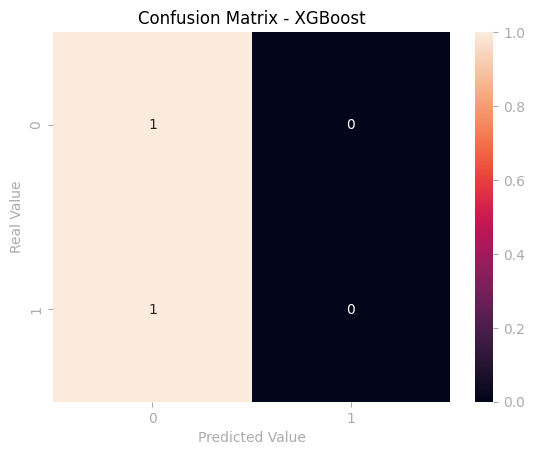

In [127]:
# final XGBoost model
xgb_iso = XGBClassifier(max_depth=1, learning_rate=0.1, n_estimators=800, gamma=5, min_child_weight=1)
xgb_iso.fit(X_iso, y_train_rus)

# prediction
X_test_xgb = scaler2.transform(X_iso_test)
y_pred_xgb = xgb_iso.predict(X_test_xgb)

# classification report
print(classification_report(y_test, y_pred_xgb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_xgb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - XGBoost')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      7524
           1       0.18      0.00      0.01      1476

    accuracy                           0.83      9000
   macro avg       0.51      0.50      0.46      9000
weighted avg       0.73      0.83      0.76      9000



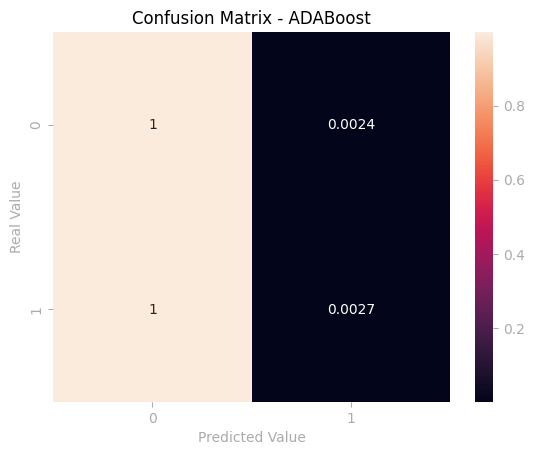

In [128]:
# final ADABOOST model
ada_iso = AdaBoostClassifier(learning_rate=0.1, n_estimators=100)
ada_iso.fit(X_iso, y_train_rus)

# prediction
X_test_ada = scaler2.transform(X_iso_test)
y_pred_ada = ada_iso.predict(X_test_ada)

# classification report
print(classification_report(y_test, y_pred_ada))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_ada, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - ADABoost')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=800
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      7524
           1       0.00      0.00      0.00      1476

    accuracy                           0.84      9000
   macro avg       0.42      0.50      0.46      9000
weighted avg       0.70      0.84      0.76      9000



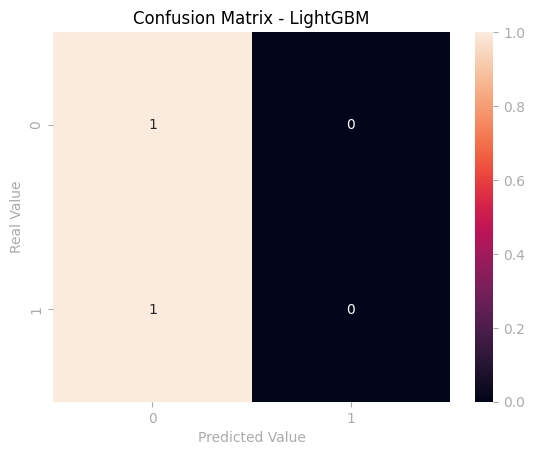

In [129]:
# final LightGBM model
lgb_iso = LGBMClassifier(num_leaves=70, max_depth=15, learning_rate=0.01, min_data_in_leaf=800)
lgb_iso.fit(X_iso, y_train_rus)

# prediction
X_test_lgb = scaler2.transform(X_iso_test)
y_pred_lgb = lgb_iso.predict(X_test_lgb)

# classification report
print(classification_report(y_test, y_pred_lgb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_lgb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - LightGBM')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      7524
           1       0.00      0.00      0.00      1476

    accuracy                           0.84      9000
   macro avg       0.42      0.50      0.46      9000
weighted avg       0.70      0.84      0.76      9000



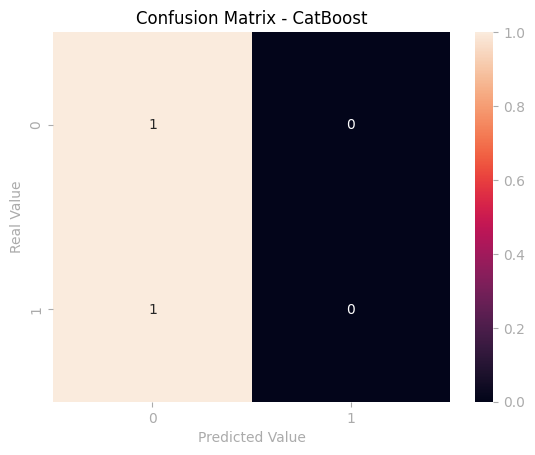

In [130]:
# final CatBoost model
cb_iso = CatBoostClassifier(learning_rate=0.03, depth=8, l2_leaf_reg=5, logging_level='Silent')
cb_iso.fit(X_iso, y_train_rus)

# prediction
X_test_cb = scaler2.transform(X_iso_test)
y_pred_cb = cb_iso.predict(X_test_cb)

# classification report
print(classification_report(y_test, y_pred_cb))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred_cb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix - CatBoost')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')

plt.show()

In [131]:
a = ['XGBOOST WITHOUT ISOMAP(Recall)','ADABOOST WITHOUT ISOMAP(Recall)','LIGHTGBM WITHOUT ISOMAP(Recall)','CATBOOST WITHOUT ISOMAP(Recall)','XGBOOST WITH ISOMAP(Recall)','ADABOOST WITH ISOMAP(Recall)','LIGHTGBM WITH ISOMAP(Recall)','CATBOOST WITH ISOMAP(Recall)', 'XGBOOST WITHOUT ISOMAP(Precision)','ADABOOST WITHOUT ISOMAP(Precision)','LIGHTGBM WITHOUT ISOMAP(Precision)','CATBOOST WITHOUT ISOMAP(Precision)','XGBOOST WITH ISOMAP(Precision)','ADABOOST WITH ISOMAP(Precision)','LIGHTGBM WITH ISOMAP(Precision)','CATBOOST WITH ISOMAP(Precision)', 'XGBOOST WITHOUT ISOMAP(F1)','ADABOOST WITHOUT ISOMAP(F1)','LIGHTGBM WITHOUT ISOMAP(F1)','CATBOOST WITHOUT ISOMAP(F1)','XGBOOST WITH ISOMAP(F1)','ADABOOST WITH ISOMAP(F1)','LIGHTGBM WITH ISOMAP(F1)','CATBOOST WITH ISOMAP(F1)']
b = [49,71,64,65,84,84,84,16,49,71,64,65,84,84,84,84,49,71,64,65,84,84,84,16]

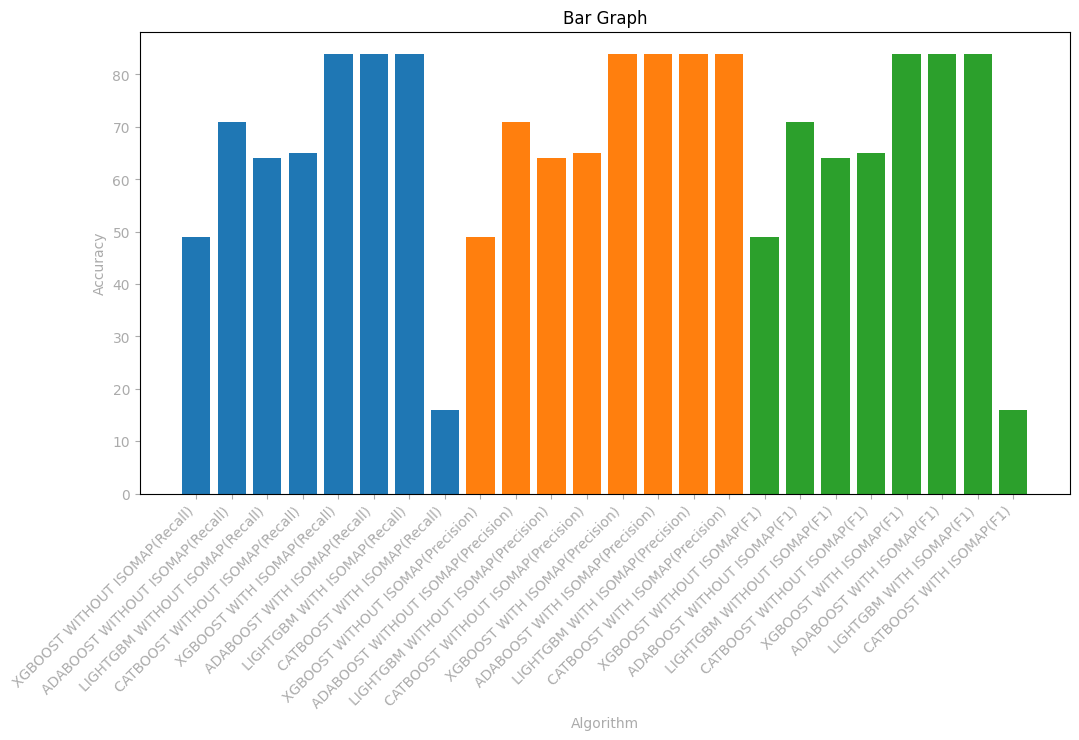

In [132]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust the figure size

plt.bar(a[:8], b[:8]) 
plt.bar(a[8:16], b[8:16])
plt.bar(a[16:], b[16:]) 

plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Bar Graph')

  # Set custom tick positions and labels
plt.xticks(rotation=45, ha='right')
plt.show()